In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Use Seaborn's context settings to make fonts larger.
import seaborn as sns
sns.set_context('talk')

generte csv for static sweep simulations
since the jobs no. are dynamic, changes to the header column are done separately

In [8]:
raw_log_path = "/home/piyush/rp/work/logs/comparison/themis_modified/static/raw_logs/"
cluster_specs = os.listdir(raw_log_path)
output_file = "static_comparison.csv"
append_to_file = False

if os.path.exists(output_file):
    append_to_file = True

with open(output_file, 'a') as output_file:
    #workaround, since can't store all simulation logs at the same time due to space issues
    if append_to_file:
        output_file.seek(0,2)
    else:
        output_file.write("cluster_spec,#v100,#p100,#k80,policy,seed,total_jobs,utilization,average_completion_time,total_completion_time\n")

    for cluster_spec in cluster_specs:
        worker_type = [worker.split("=")[0] for worker in cluster_spec.split(".")]
        worker_count = [worker.split("=")[1] for worker in cluster_spec.split(".")]
        print(worker_type)
        print(worker_count)
        

        policies = os.listdir(raw_log_path + cluster_spec + "/")
        for policy in policies:
            print(policy)
            

            seeds = os.listdir(raw_log_path + cluster_spec + "/" + policy)
            for seed in seeds:
                print(seed)
                
                for file in os.listdir(raw_log_path + cluster_spec + "/" + policy + "/" + seed):
                    num_jobs = file.split(".")[0].split("=")[1].rstrip()

                    output_file.write(cluster_spec)
                    output_file.write(",")
                    output_file.write(worker_count[0])
                    output_file.write(",")
                    output_file.write(worker_count[1])
                    output_file.write(",")
                    output_file.write(worker_count[2])
                    output_file.write(",")
                    output_file.write(policy)
                    output_file.write(",")
                    output_file.write(seed.split("=")[1])
                    output_file.write(",")
                    output_file.write(num_jobs)
                    output_file.write(",")
                    
                    with open(raw_log_path + cluster_spec + "/" + policy + "/" + seed + "/" + file, 'r') as log_file:
                        lines = log_file.readlines()
                        index = len(lines)

                        #cluster utilization
                        index = index - 2
                        cluster_utilization = lines[index].rstrip()
                        print(cluster_utilization)
                        output_file.write(cluster_utilization.split(":")[1])
                        output_file.write(",")

                        #Average job completion time
                        index = index - 2
                        avg_job_completion_time = lines[index].rstrip()
                        print(avg_job_completion_time)
                        output_file.write(avg_job_completion_time.split(":")[1])
                        output_file.write(",")

                        #total duration for all jobs
                        index -= int(num_jobs)
                        total_job_completion_time = lines[index - 2].rstrip()
                        print(total_job_completion_time)
                        output_file.write(total_job_completion_time.split(":")[1])
                        output_file.write(",")

                        index = index - 1

                        #job completion times
                        for i in range(int(num_jobs)):
                            index += 1
                            individual_job_completion_time = lines[index].rstrip()                            
                            output_file.write(individual_job_completion_time.split(":")[1])
                            if i != (int(num_jobs) - 1):
                                output_file.write(",")
                            print(individual_job_completion_time)
                        
                        output_file.write("\n")

['v100', 'p100', 'k80']
['10', '5', '5']
finish_time_fairness
seed=5
Cluster utilization: 0.933
Average job completion time: 816519.358 seconds (226.81 hours)
Total duration: 3186076.351 seconds (885.02 hours)
Job 0: 626720.984
Job 1: 508664.153
Job 2: 383515.045
Job 3: 998857.509
Job 4: 479870.244
Job 5: 1146707.685
Job 6: 357981.923
Job 7: 963462.010
Job 8: 201624.724
Job 9: 128326.721
Job 10: 880982.175
Job 11: 279657.455
Job 12: 123890.620
Job 13: 2884836.351
Job 14: 458590.766
Job 15: 381537.125
Job 16: 553032.046
Job 17: 458374.474
Job 18: 123914.976
Job 19: 593152.145
Job 20: 331465.706
Job 21: 191980.467
Job 22: 1361546.582
Job 23: 881211.770
Job 24: 1130186.145
Job 25: 525646.368
Job 26: 1716575.005
Job 27: 342212.829
Job 28: 219141.733
Job 29: 1763550.512
Job 30: 309905.356
Job 31: 670568.968
Job 32: 370876.807
Job 33: 546606.884
Job 34: 550931.850
Job 35: 2145464.635
Job 36: 103055.174
Job 37: 2562843.198
Job 38: 127367.475
Job 39: 447509.346
Job 40: 2203969.755
Job 41: 5442

create a pandas data frame for static trace data

In [9]:
csv_path = '/home/piyush/rp/work/analysis/static_comparison_updated.csv'
df_static = pd.read_csv(csv_path)
df_static

cluster_spec  #v100  #p100  #k80                policy  seed  \
0   v100=10.p100=5.k80=5     10      5     5  shared_cost_fairness     5   
1   v100=10.p100=5.k80=5     10      5     5  shared_cost_fairness     5   
2   v100=10.p100=5.k80=5     10      5     5  shared_cost_fairness     5   
3   v100=10.p100=5.k80=5     10      5     5  shared_cost_fairness     5   
4   v100=10.p100=5.k80=5     10      5     5  shared_cost_fairness     5   
..                   ...    ...    ...   ...                   ...   ...   
85  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
86  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
87  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
88  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   
89  v100=5.p100=10.k80=5      5     10     5  finish_time_fairness     8   

    total_jobs  utilization             average_completion_time  \
0         1000        0.936   936852.671 seconds (260.24 hours)   
1          500        0.846   445104.144 seconds (123.64 hours)   
2          875        0.925   812010.169 seconds (225.56 hours)   
3          750        0.921   705575.809 seconds (195.99 hours)   
4          625        0.911   602322.910 seconds (167.31 hours)   
..         ...          ...                                 ...   
85        1000        0.960   934588.709 seconds (259.61 hours)   
86         500        0.834   453887.727 seconds (126.08 hours)   
87         875        0.951   795840.252 seconds (221.07 hours)   
88         750        0.937   687398.291 seconds (190.94 hours)   
89         625        0.894   565884.822 seconds (157.19 hours)   

                   total_completion_time  ...       Job990      Job991  \
0     3229269.481 seconds (897.02 hours)  ...  2933263.919  333443.517   
1     1644304.555 seconds (456.75 hours)  ...          NaN         NaN   
2     2814559.768 seconds (781.82 hours)  ...          NaN         NaN   
3     2481028.010 seconds (689.17 hours)  ...          NaN         NaN   
4     2129839.623 seconds (591.62 hours)  ...          NaN         NaN   
..                                   ...  ...          ...         ...   
85   3738522.181 seconds (1038.48 hours)  ...   117922.432  968548.983   
86    2011505.495 seconds (558.75 hours)  ...          NaN         NaN   
87    3271575.179 seconds (908.77 hours)  ...          NaN         NaN   
88    2843793.163 seconds (789.94 hours)  ...          NaN         NaN   
89    2395219.104 seconds (665.34 hours)  ...          NaN         NaN   

        Job992       Job993       Job994      Job995      Job996      Job997  \
0   539251.282   399555.285   129798.467  2309232.35  314204.190  810191.921   
1          NaN          NaN          NaN         NaN         NaN         NaN   
2          NaN          NaN          NaN         NaN         NaN         NaN   
3          NaN          NaN          NaN         NaN         NaN         NaN   
4          NaN          NaN          NaN         NaN         NaN         NaN   
..         ...          ...          ...         ...         ...         ...   
85  256950.996  2500927.427  1289579.623  1149836.17  382429.625  469267.646   
86         NaN          NaN          NaN         NaN         NaN         NaN   
87         NaN          NaN          NaN         NaN         NaN         NaN   
88         NaN          NaN          NaN         NaN         NaN         NaN   
89         NaN          NaN          NaN         NaN         NaN         NaN   

         Job998      Job999  
0   1014030.257  851568.869  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
..          ...         ...  
85   208440.581  332641.505  
86          NaN         NaN  
87          NaN         NaN  
88          NaN         NaN  
89          NaN         NaN  

[90 rows x 1010 columns]

how does cluster utilization vary with number of jobs for different seeds

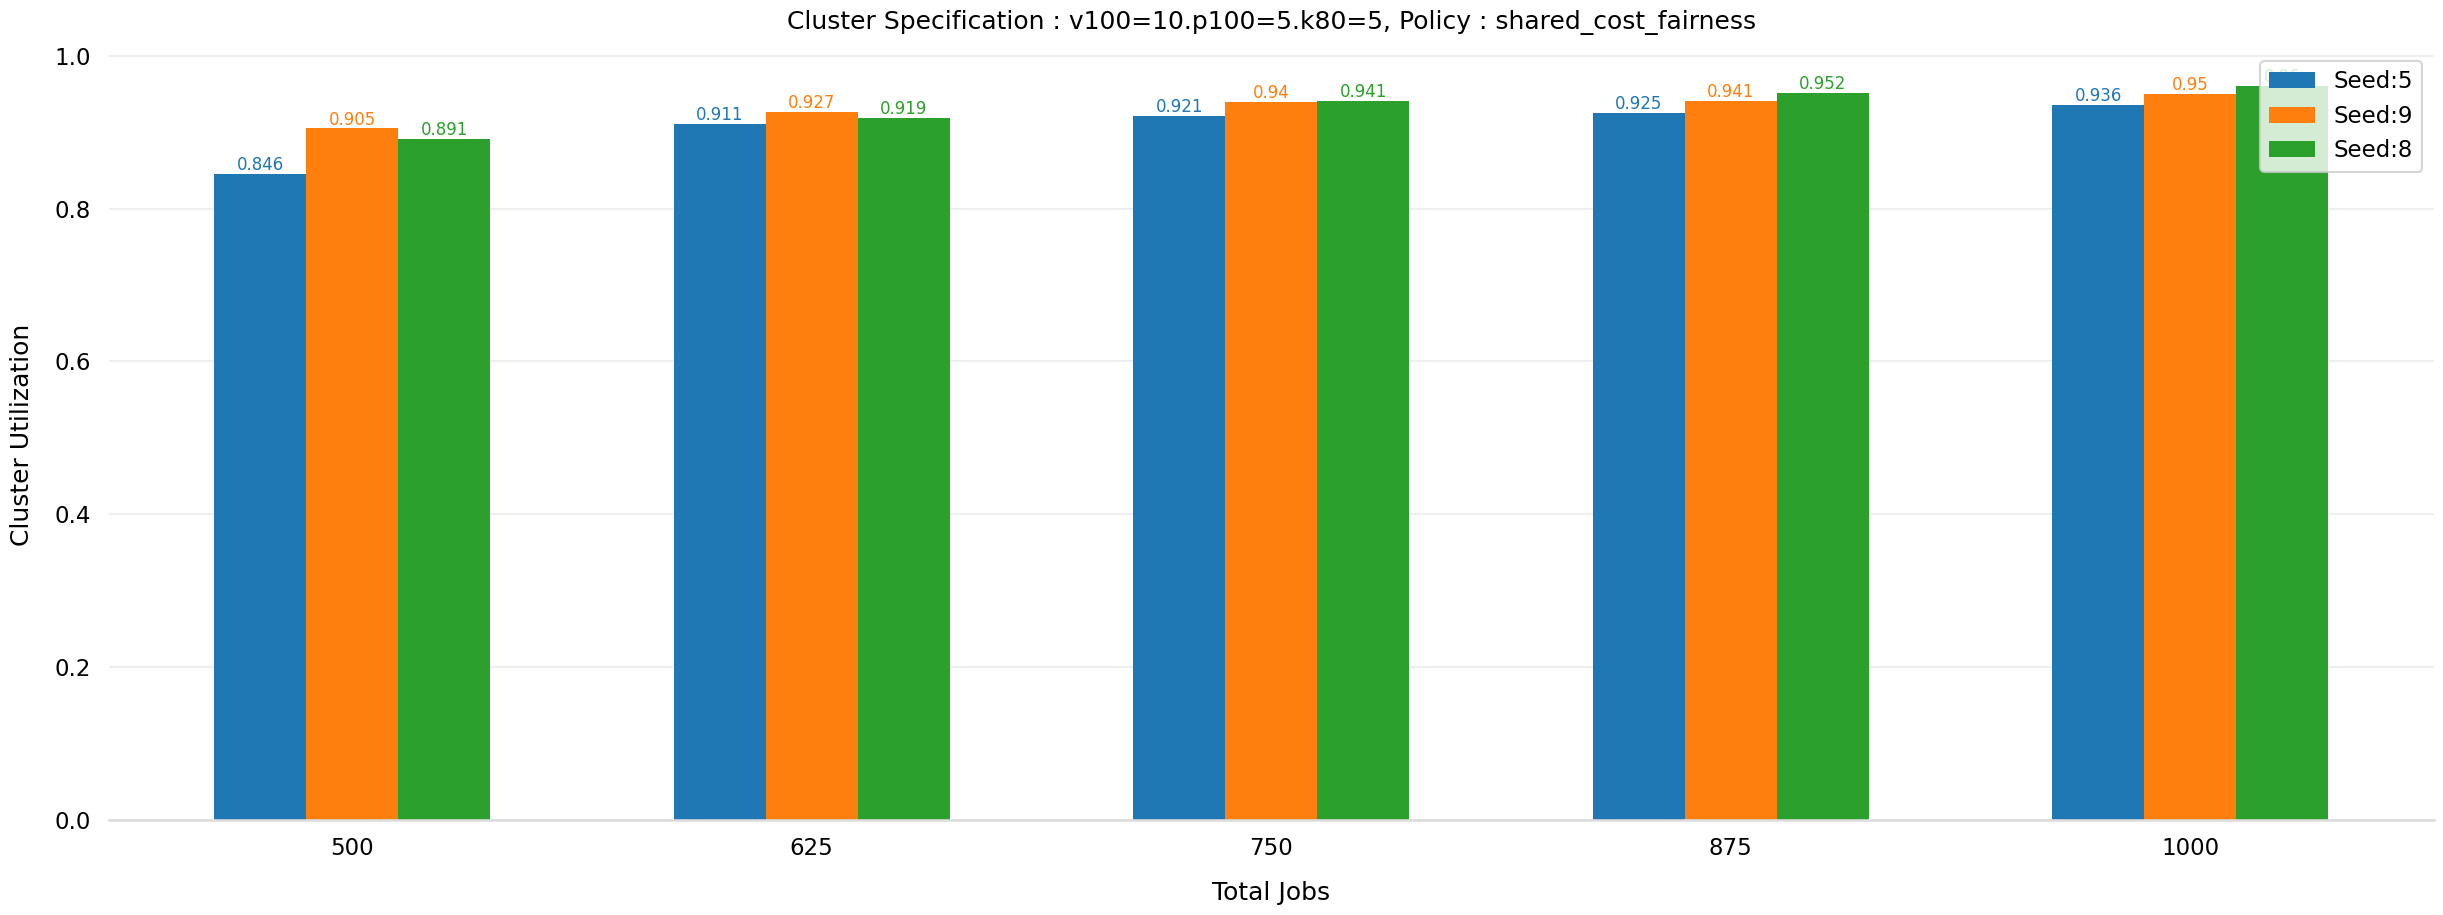

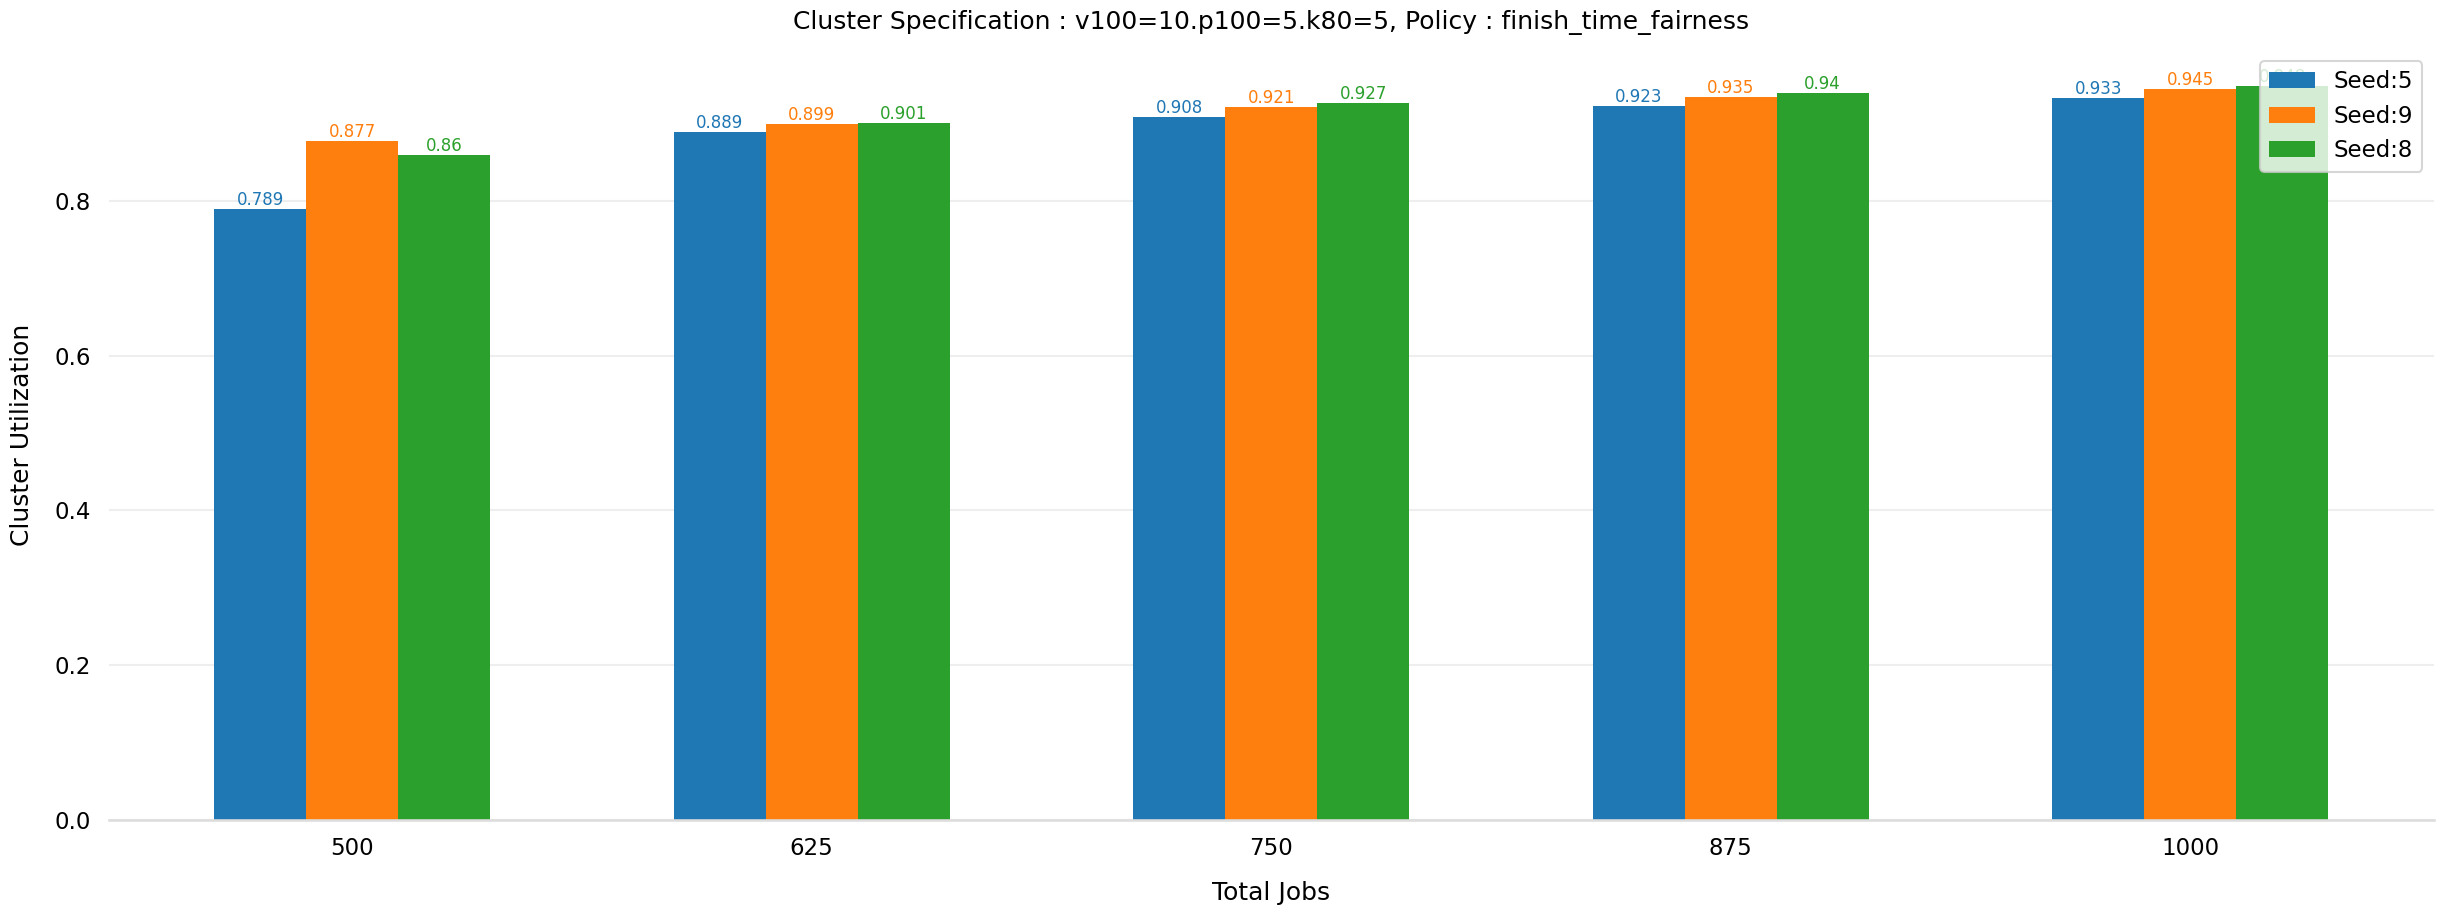

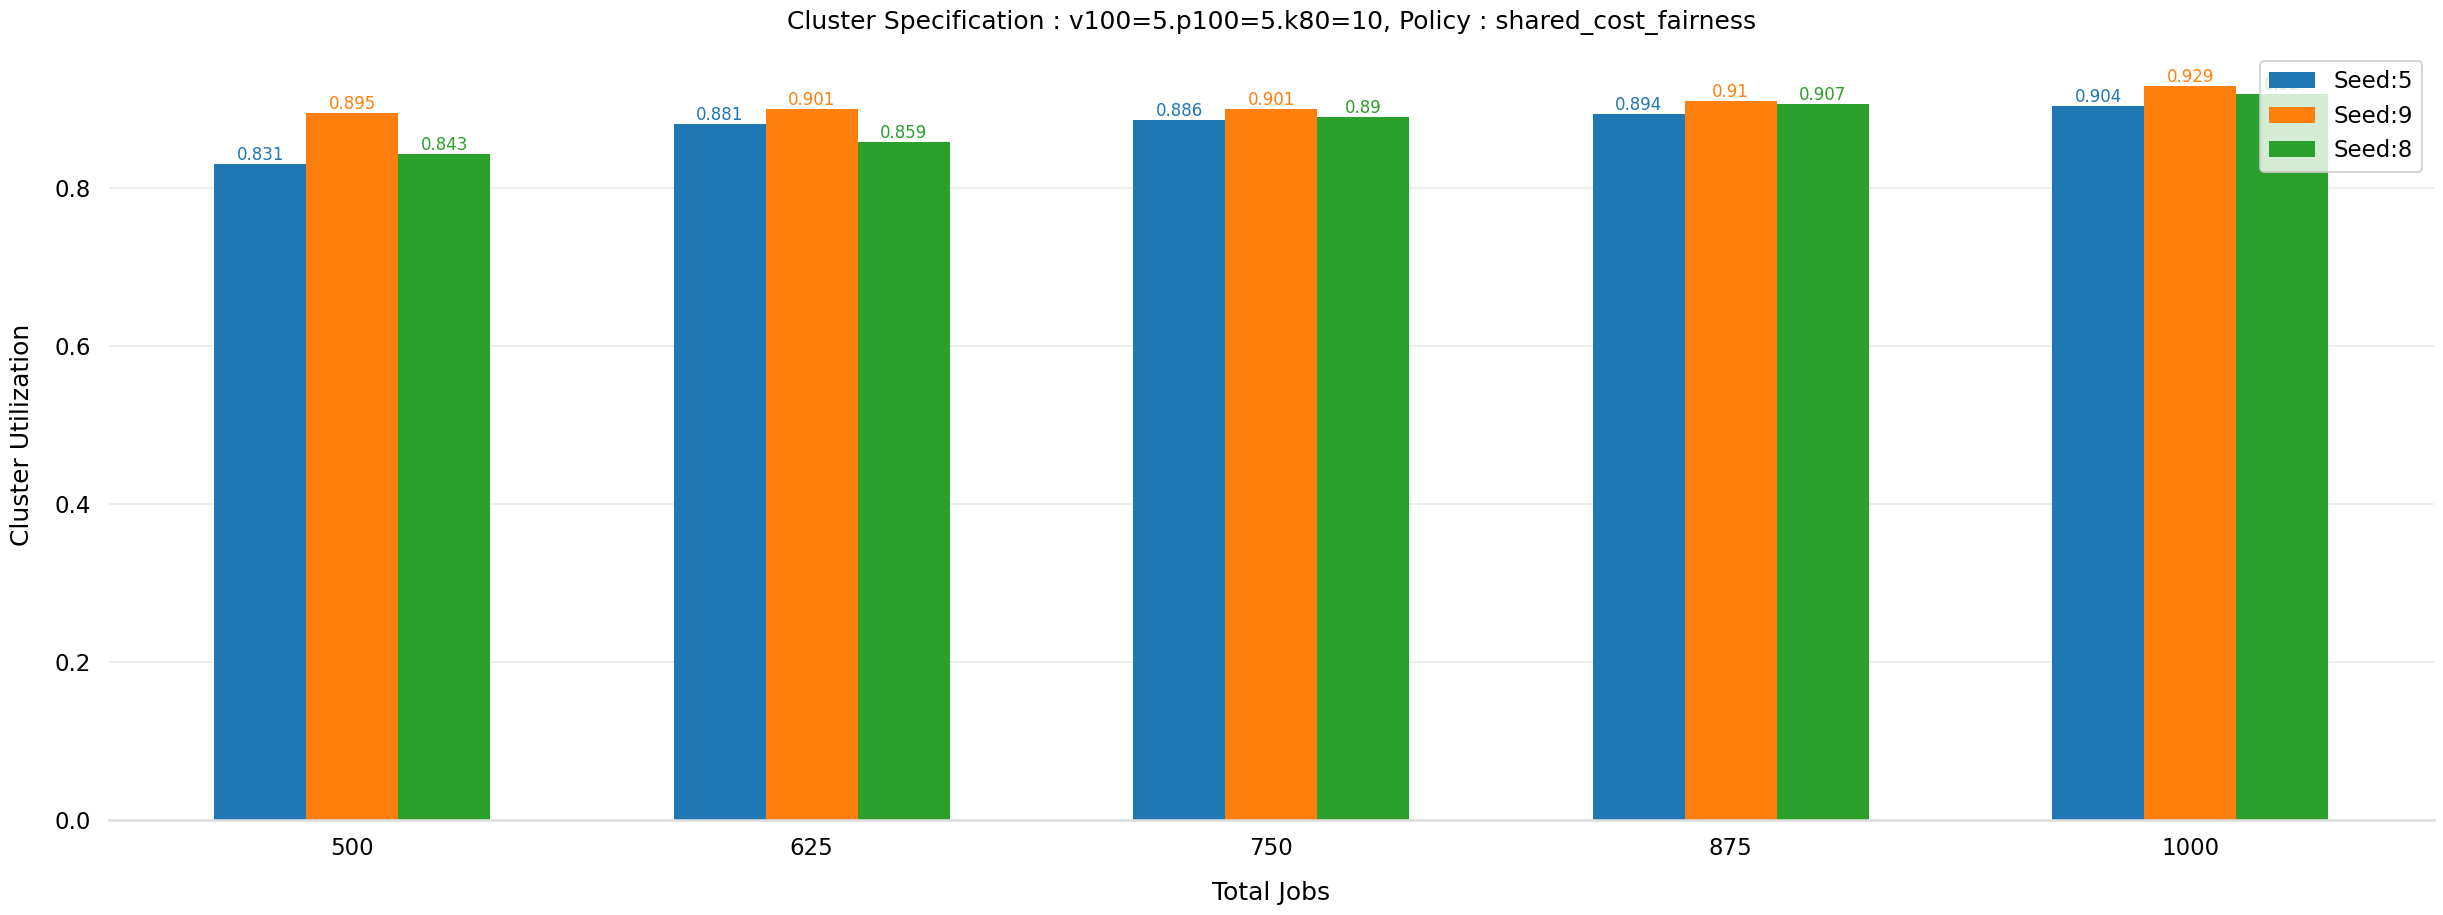

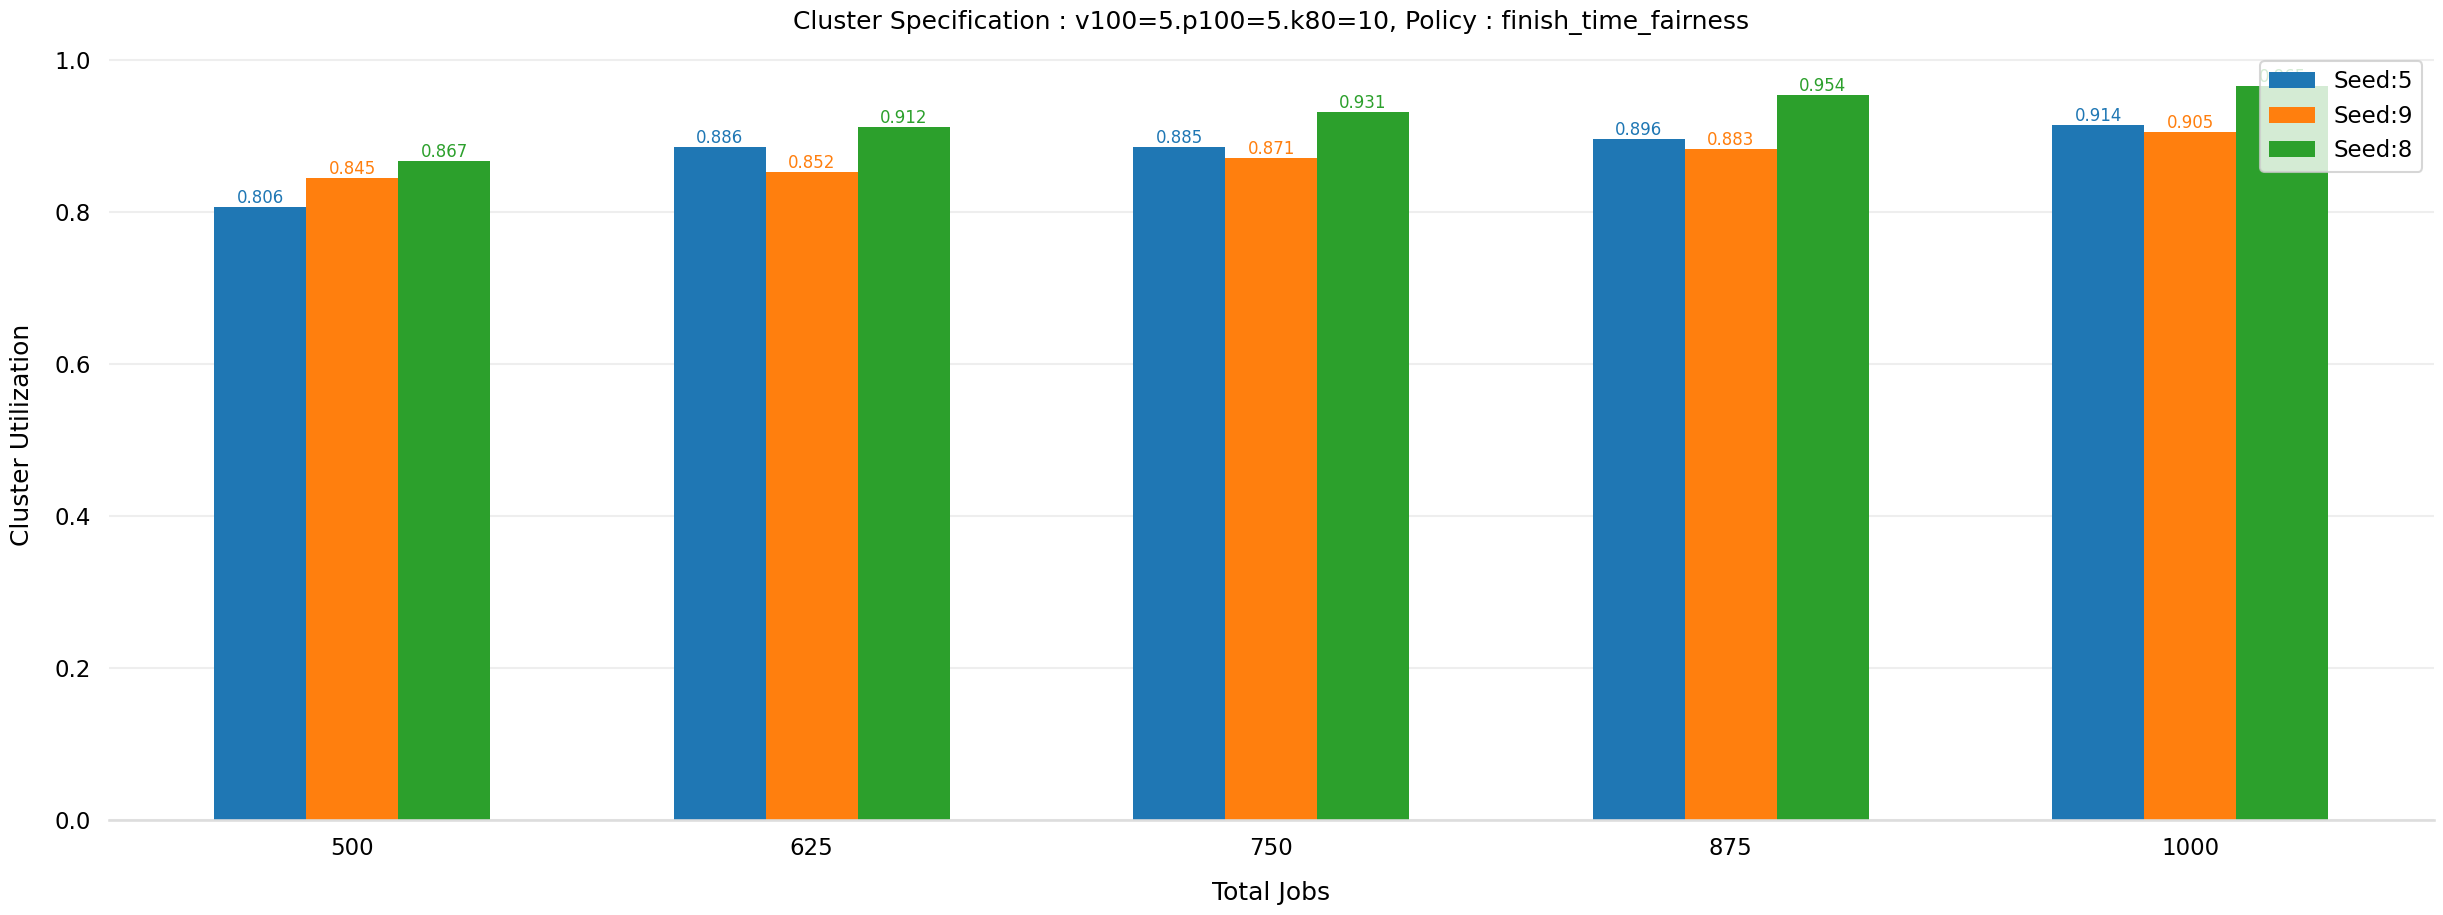

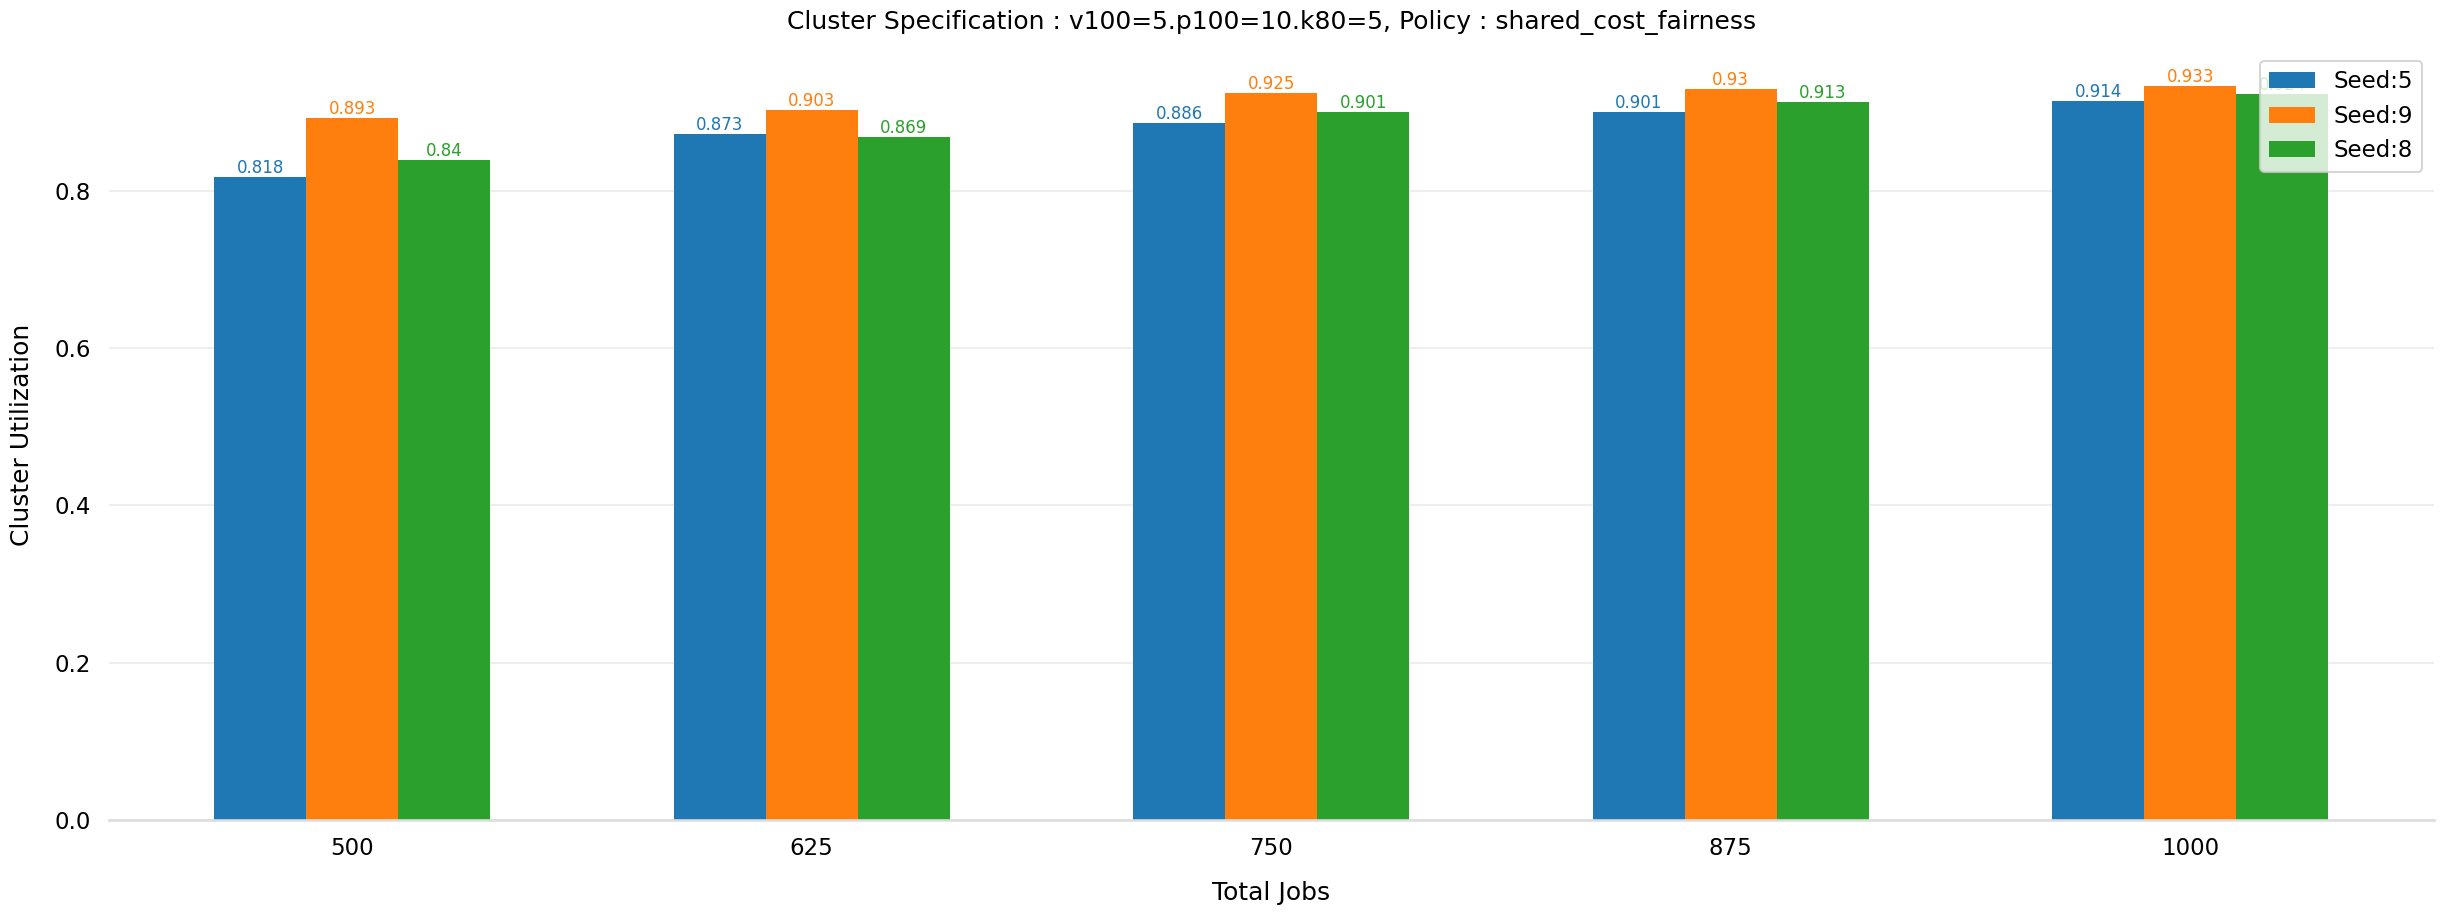

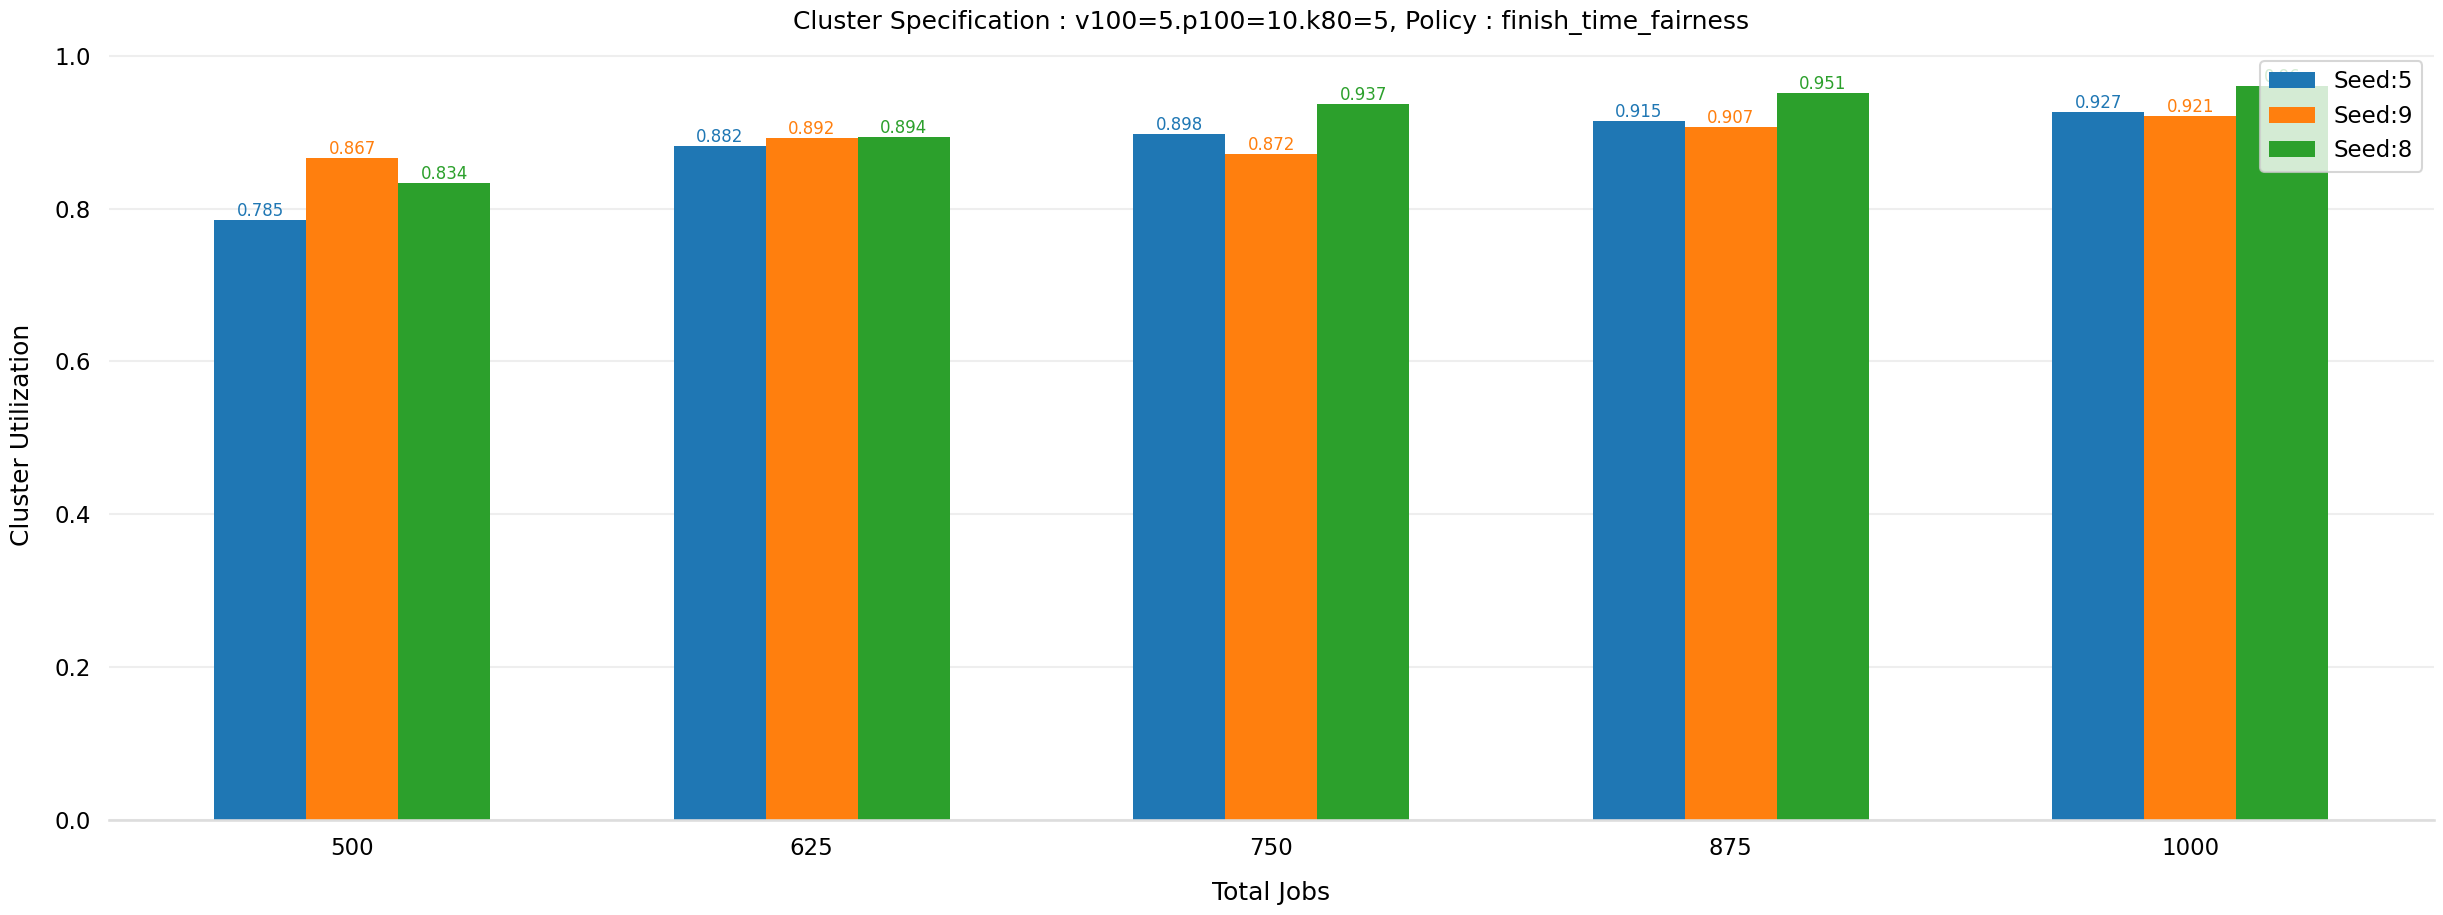

In [10]:
for cluster_spec in df_static["cluster_spec"].unique():
    for policy in df_static["policy"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("total_jobs")            

            x = np.arange(len(result["total_jobs"].unique()))
            y = [(float(r)) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

how does average completion time vary with total jobs for each seed for each policy

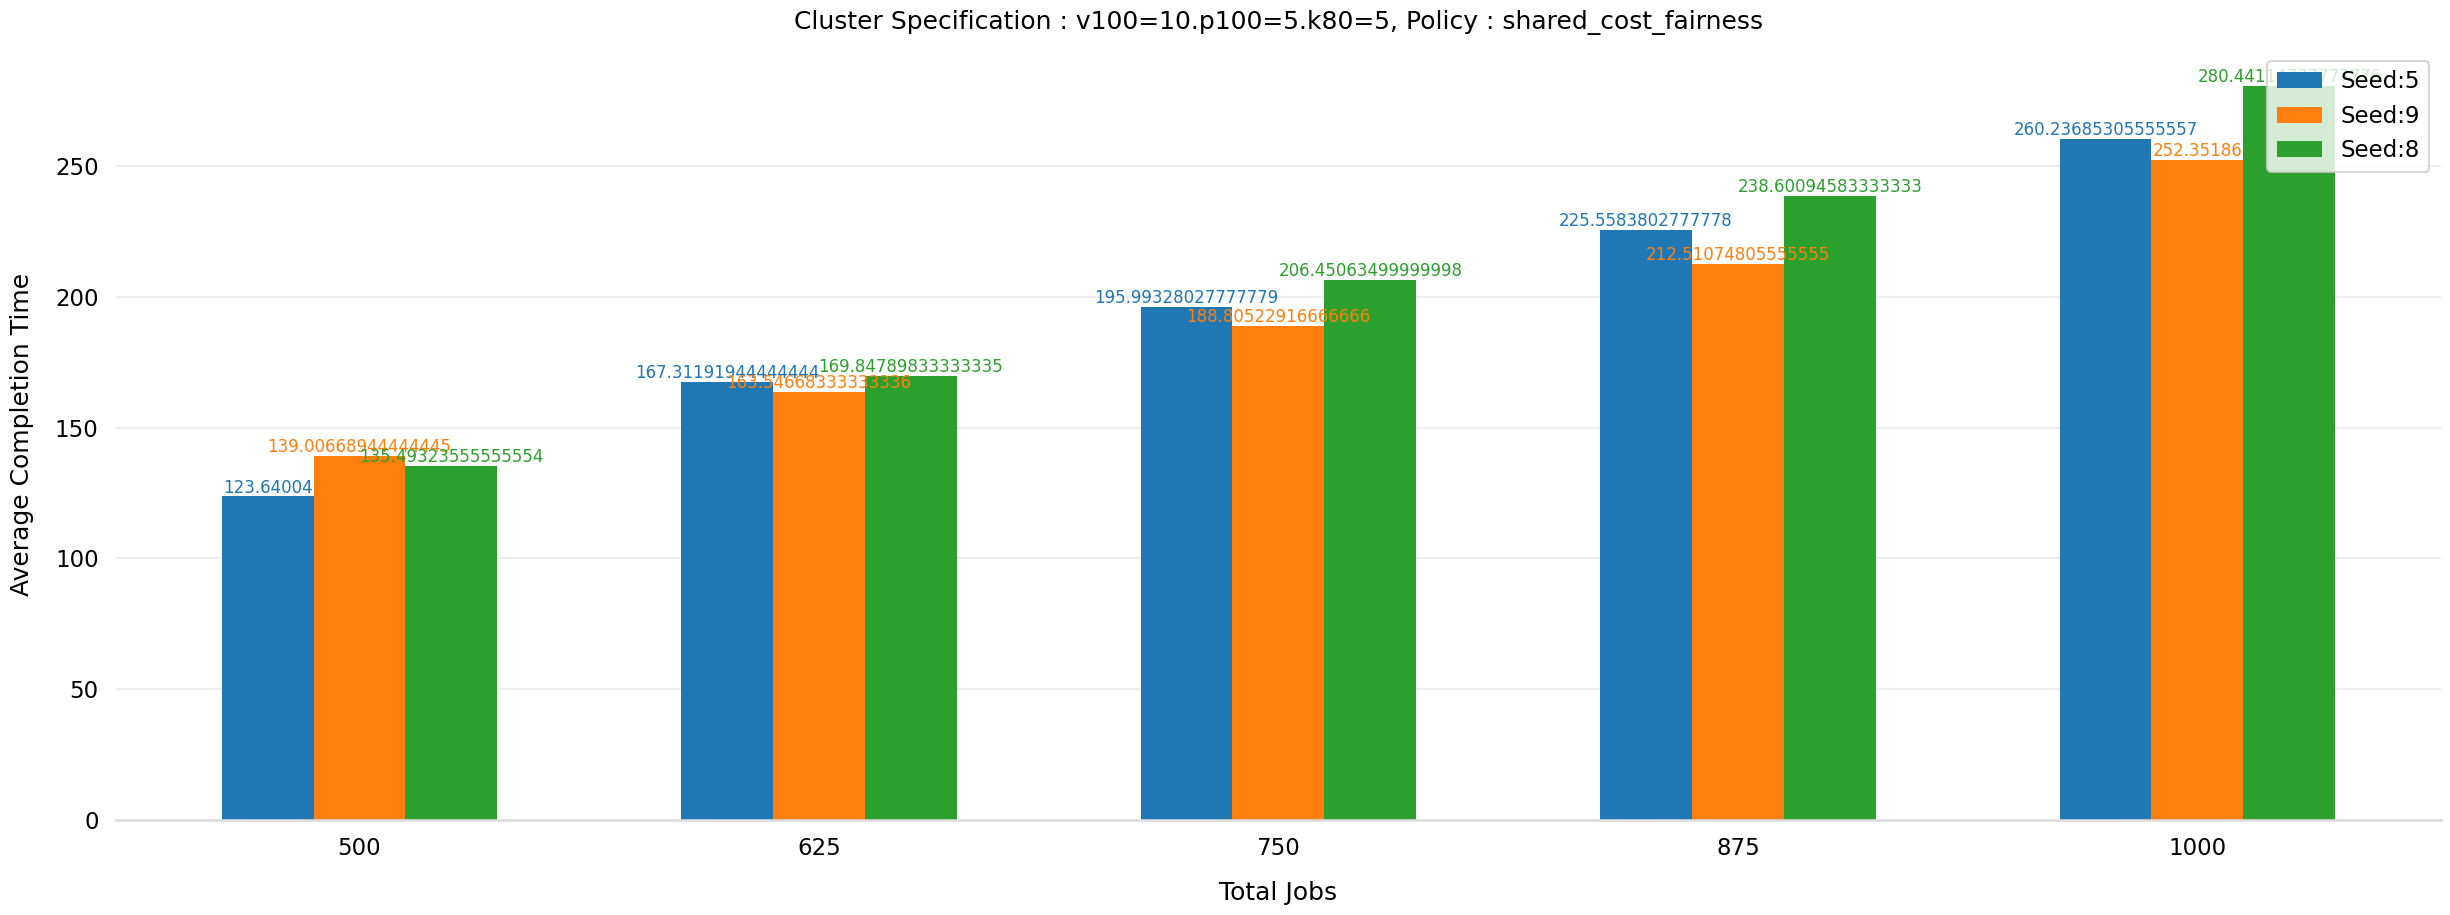

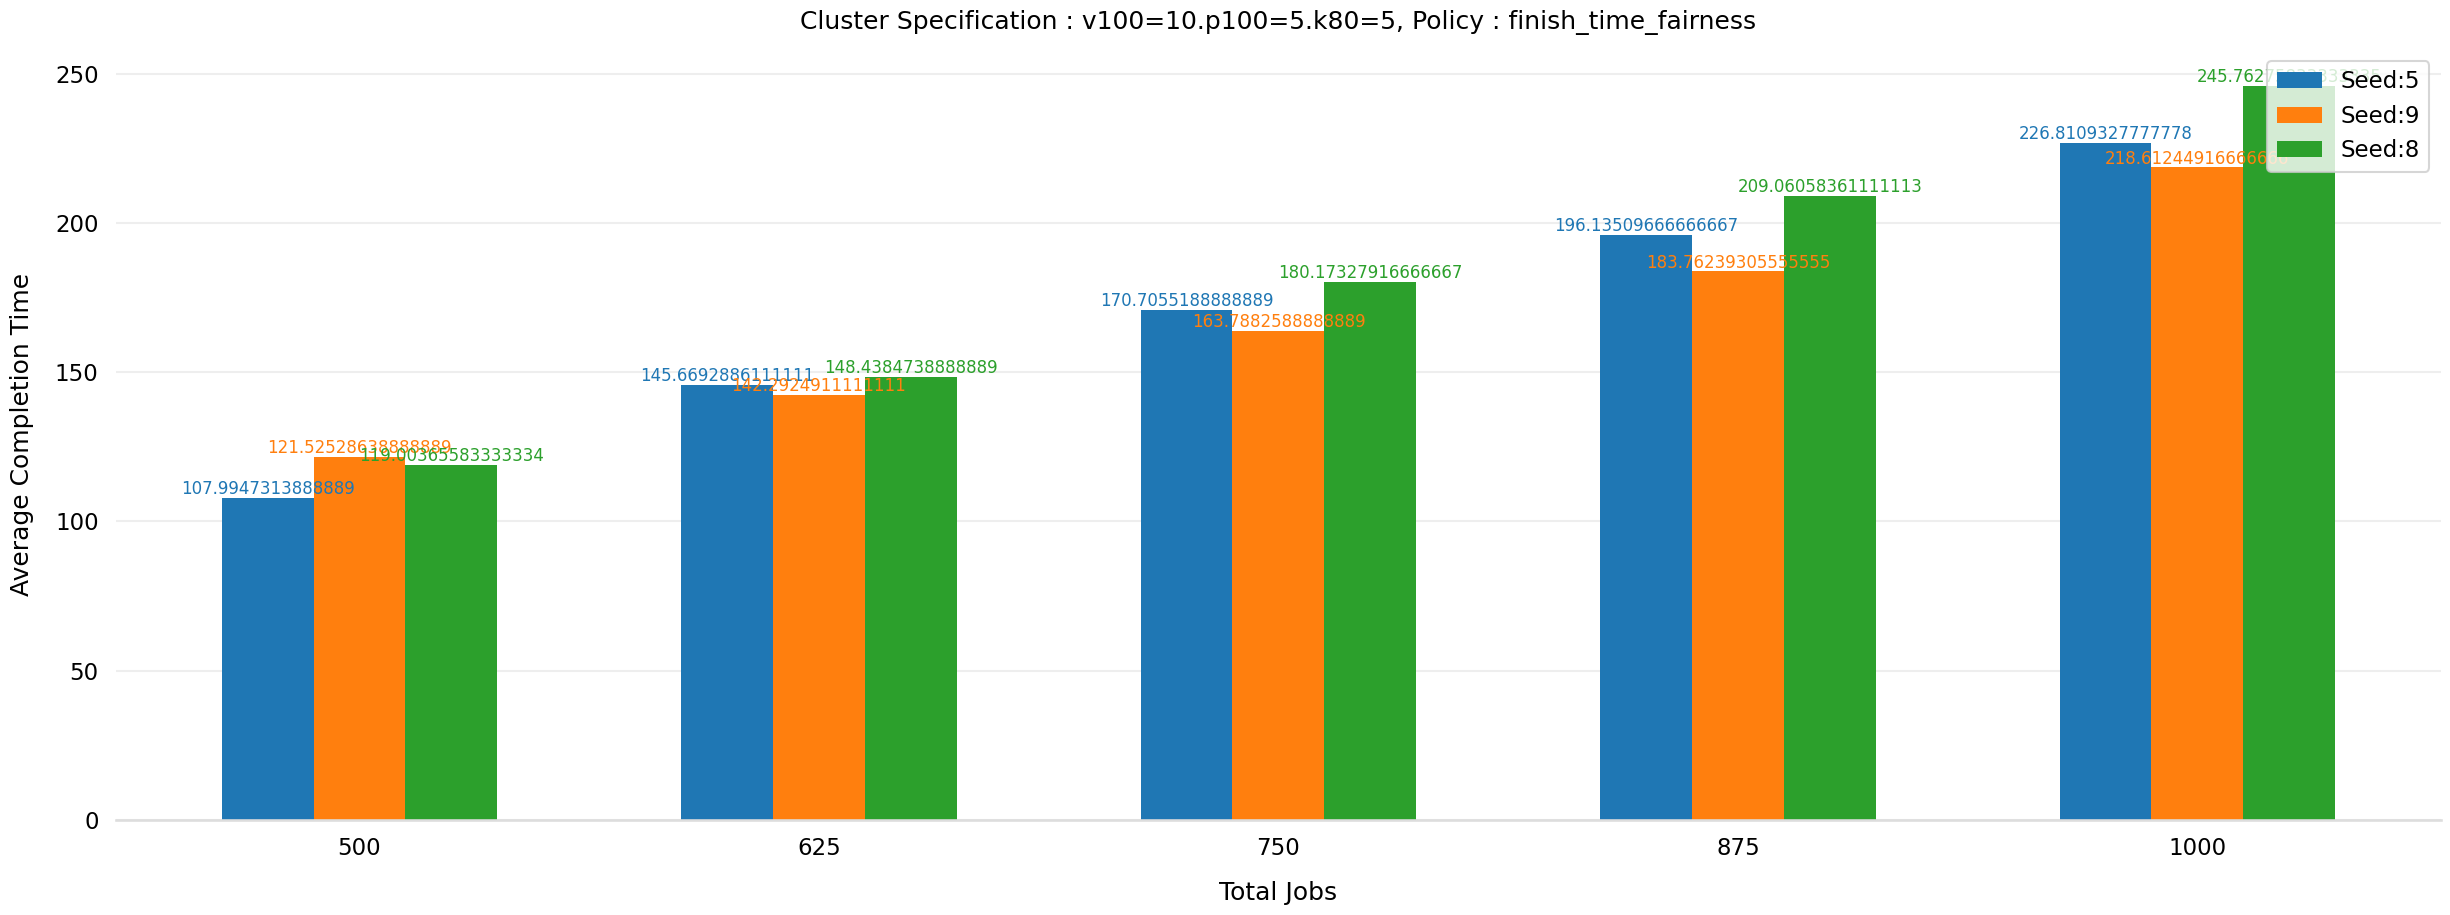

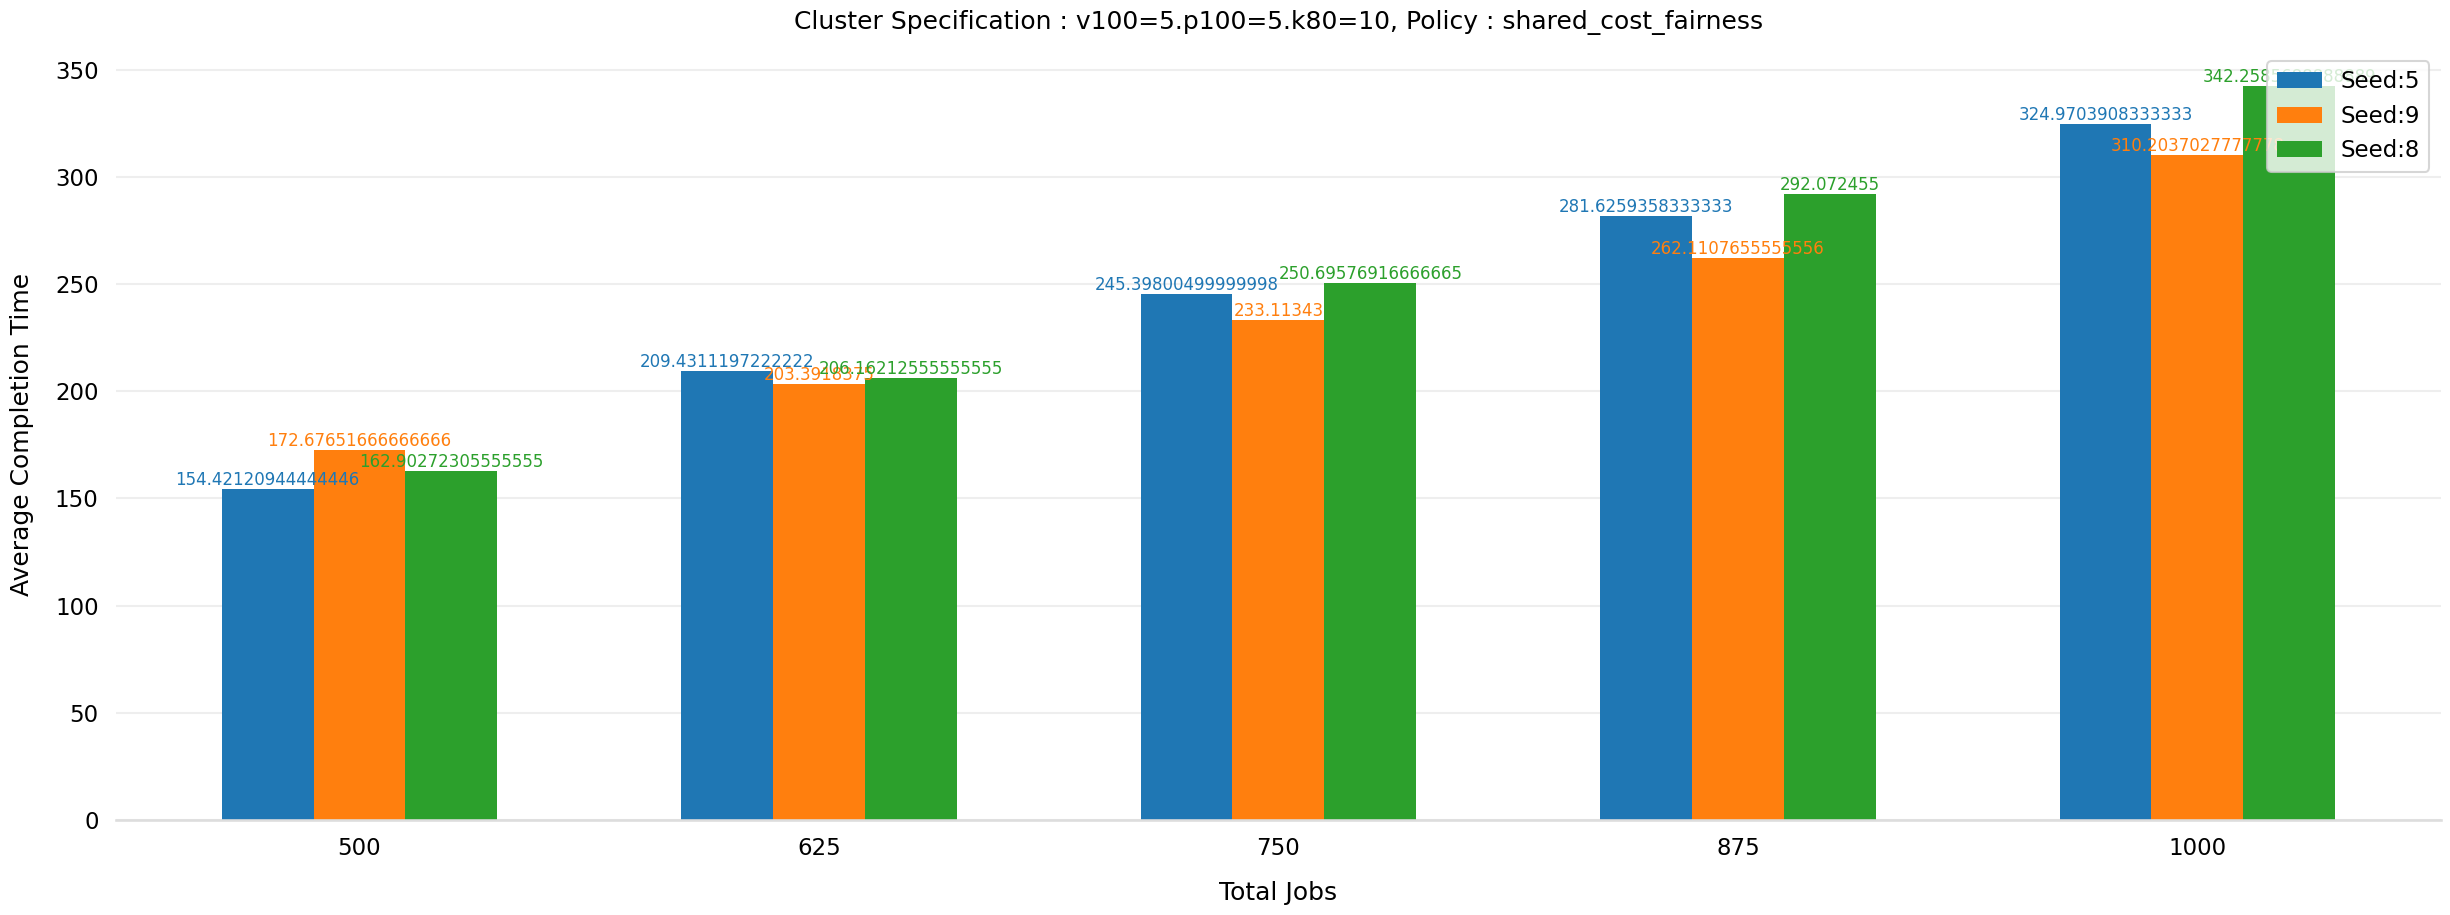

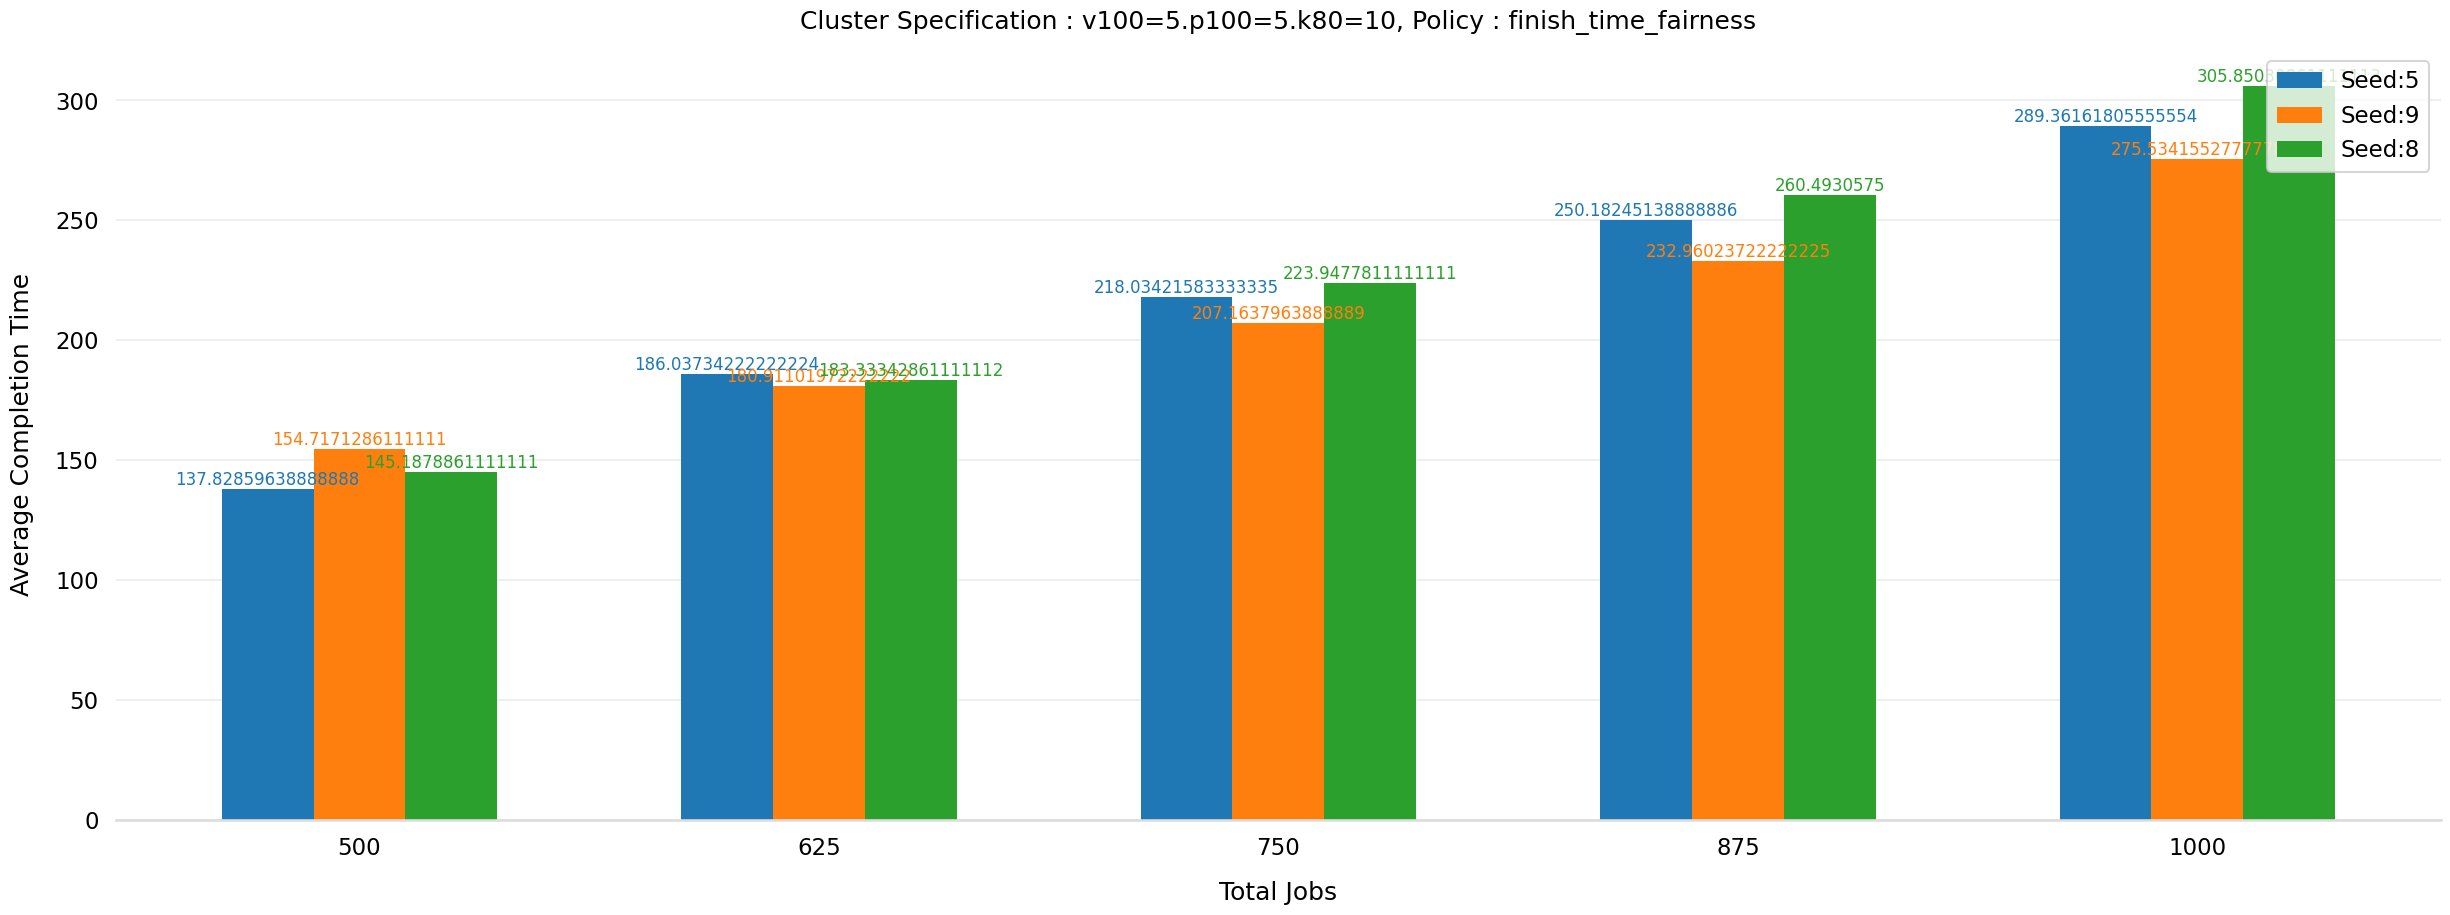

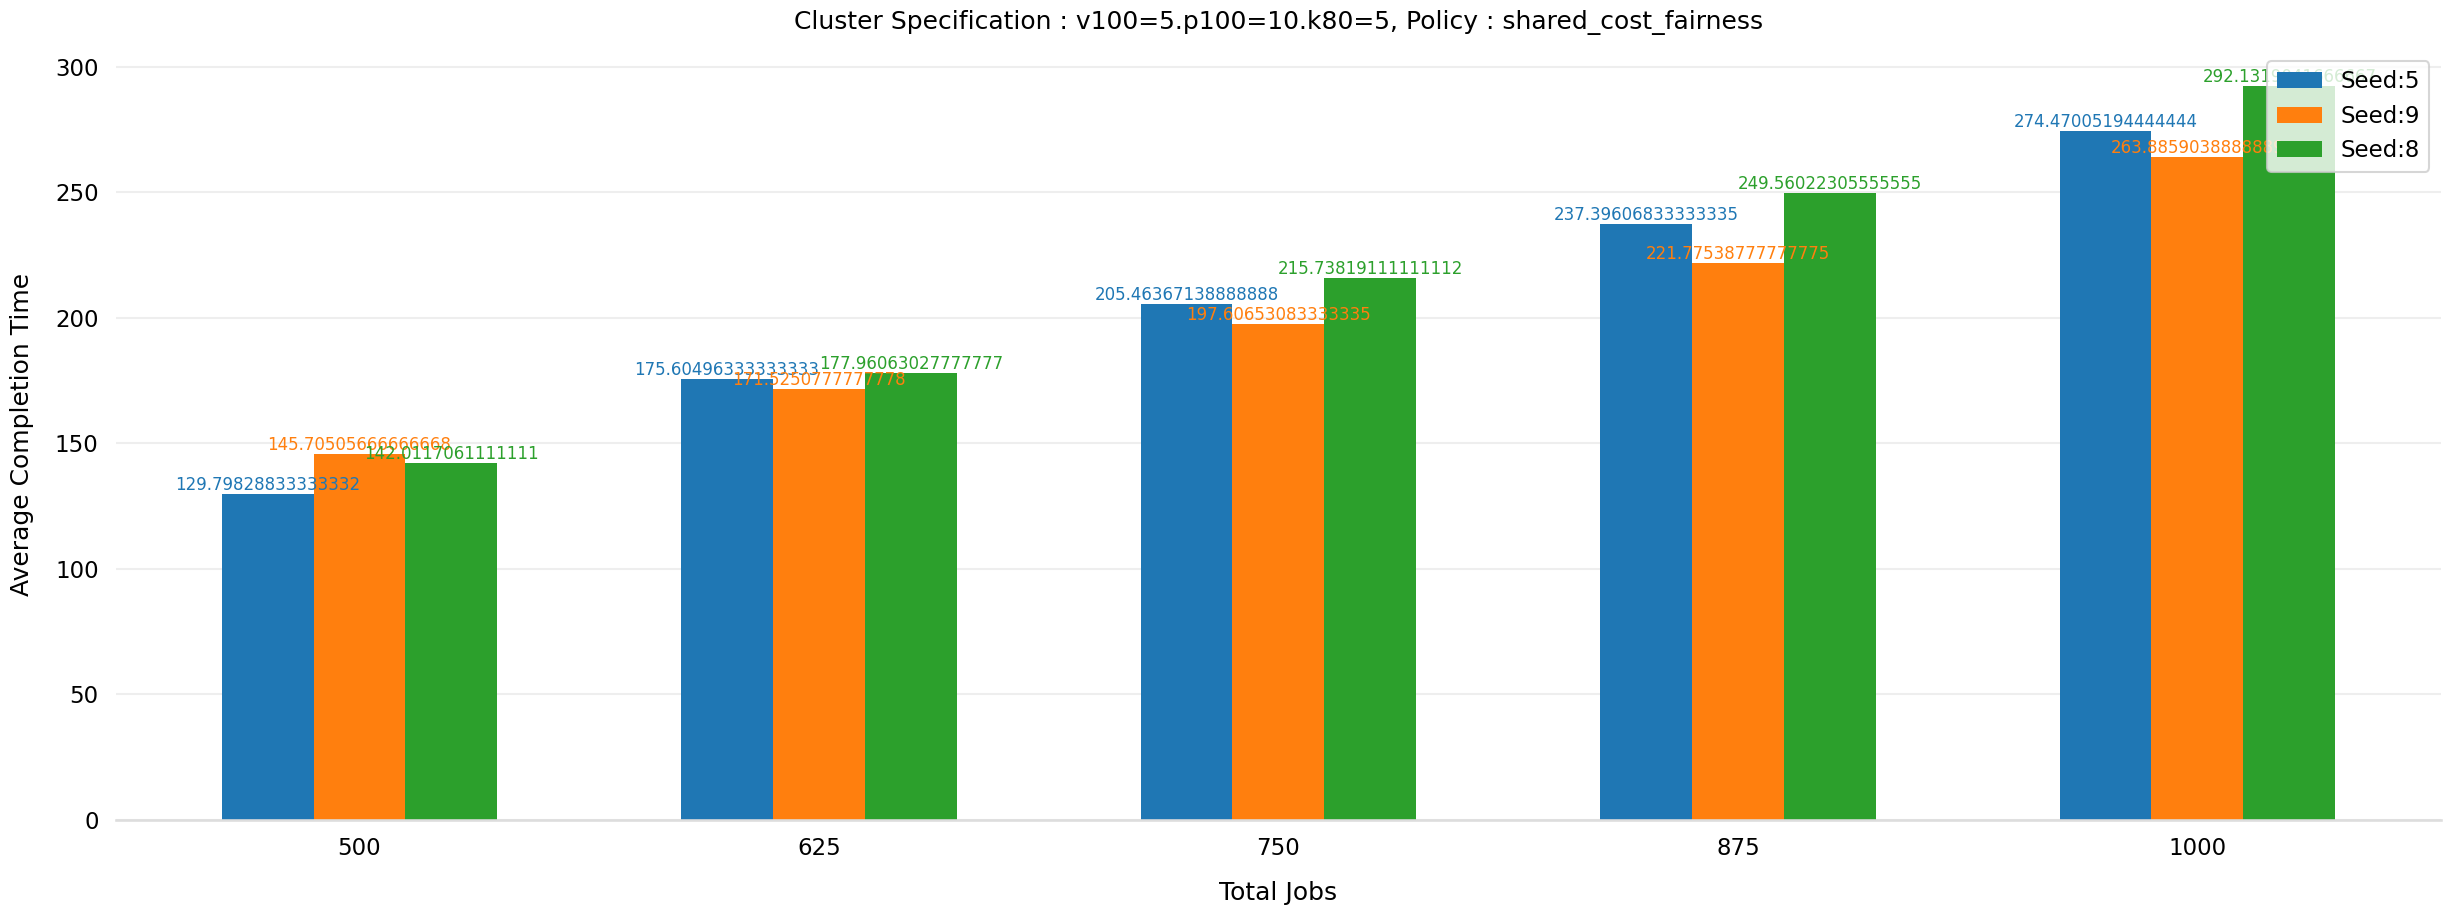

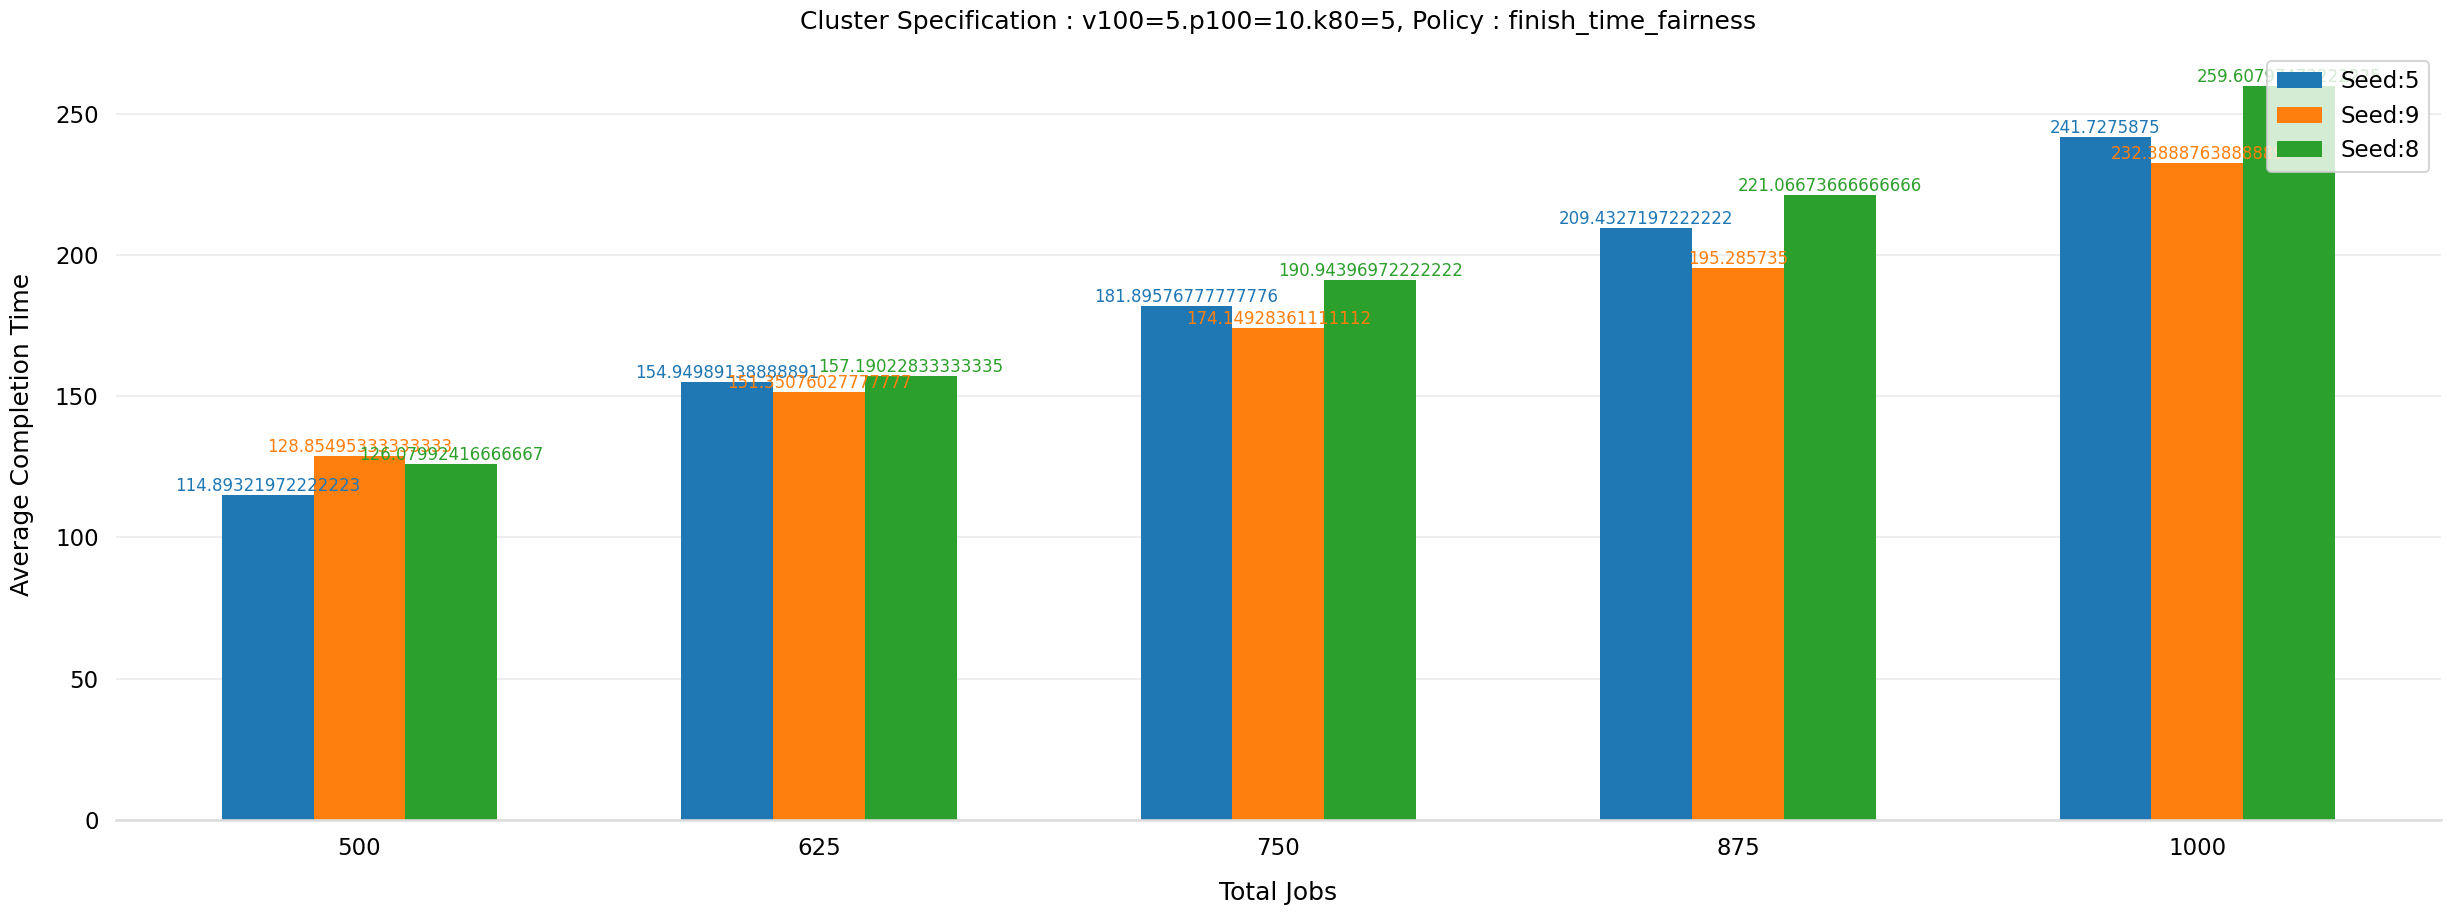

In [11]:
for cluster_spec in df_static["cluster_spec"].unique():
    for policy in df_static["policy"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("total_jobs")            

            x = np.arange(len(result["total_jobs"].unique()))
            y = [(float(r.strip().split(" ")[0])/3600.0) for r in result["average_completion_time"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Average Completion Time', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

how does utilization vary with total jobs for different policies for each seed

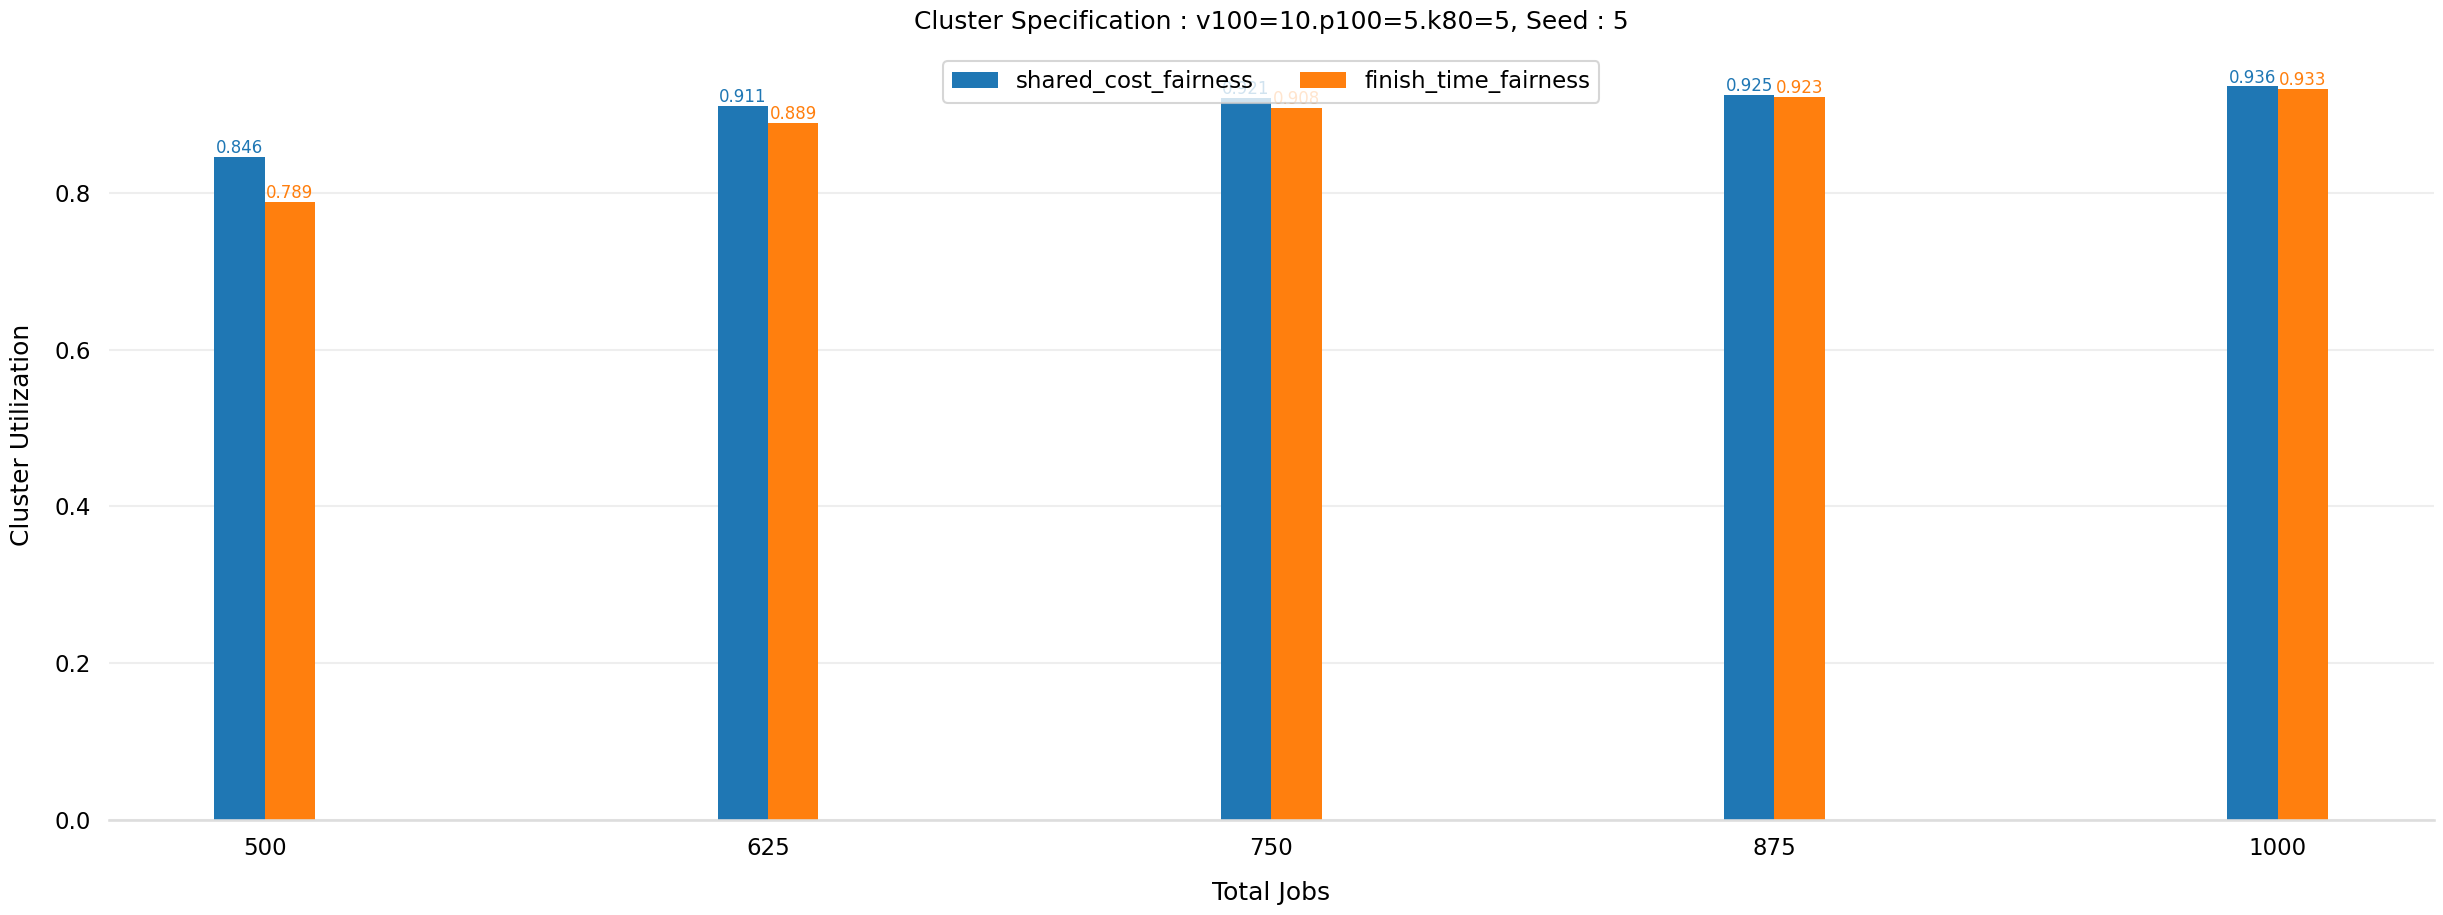

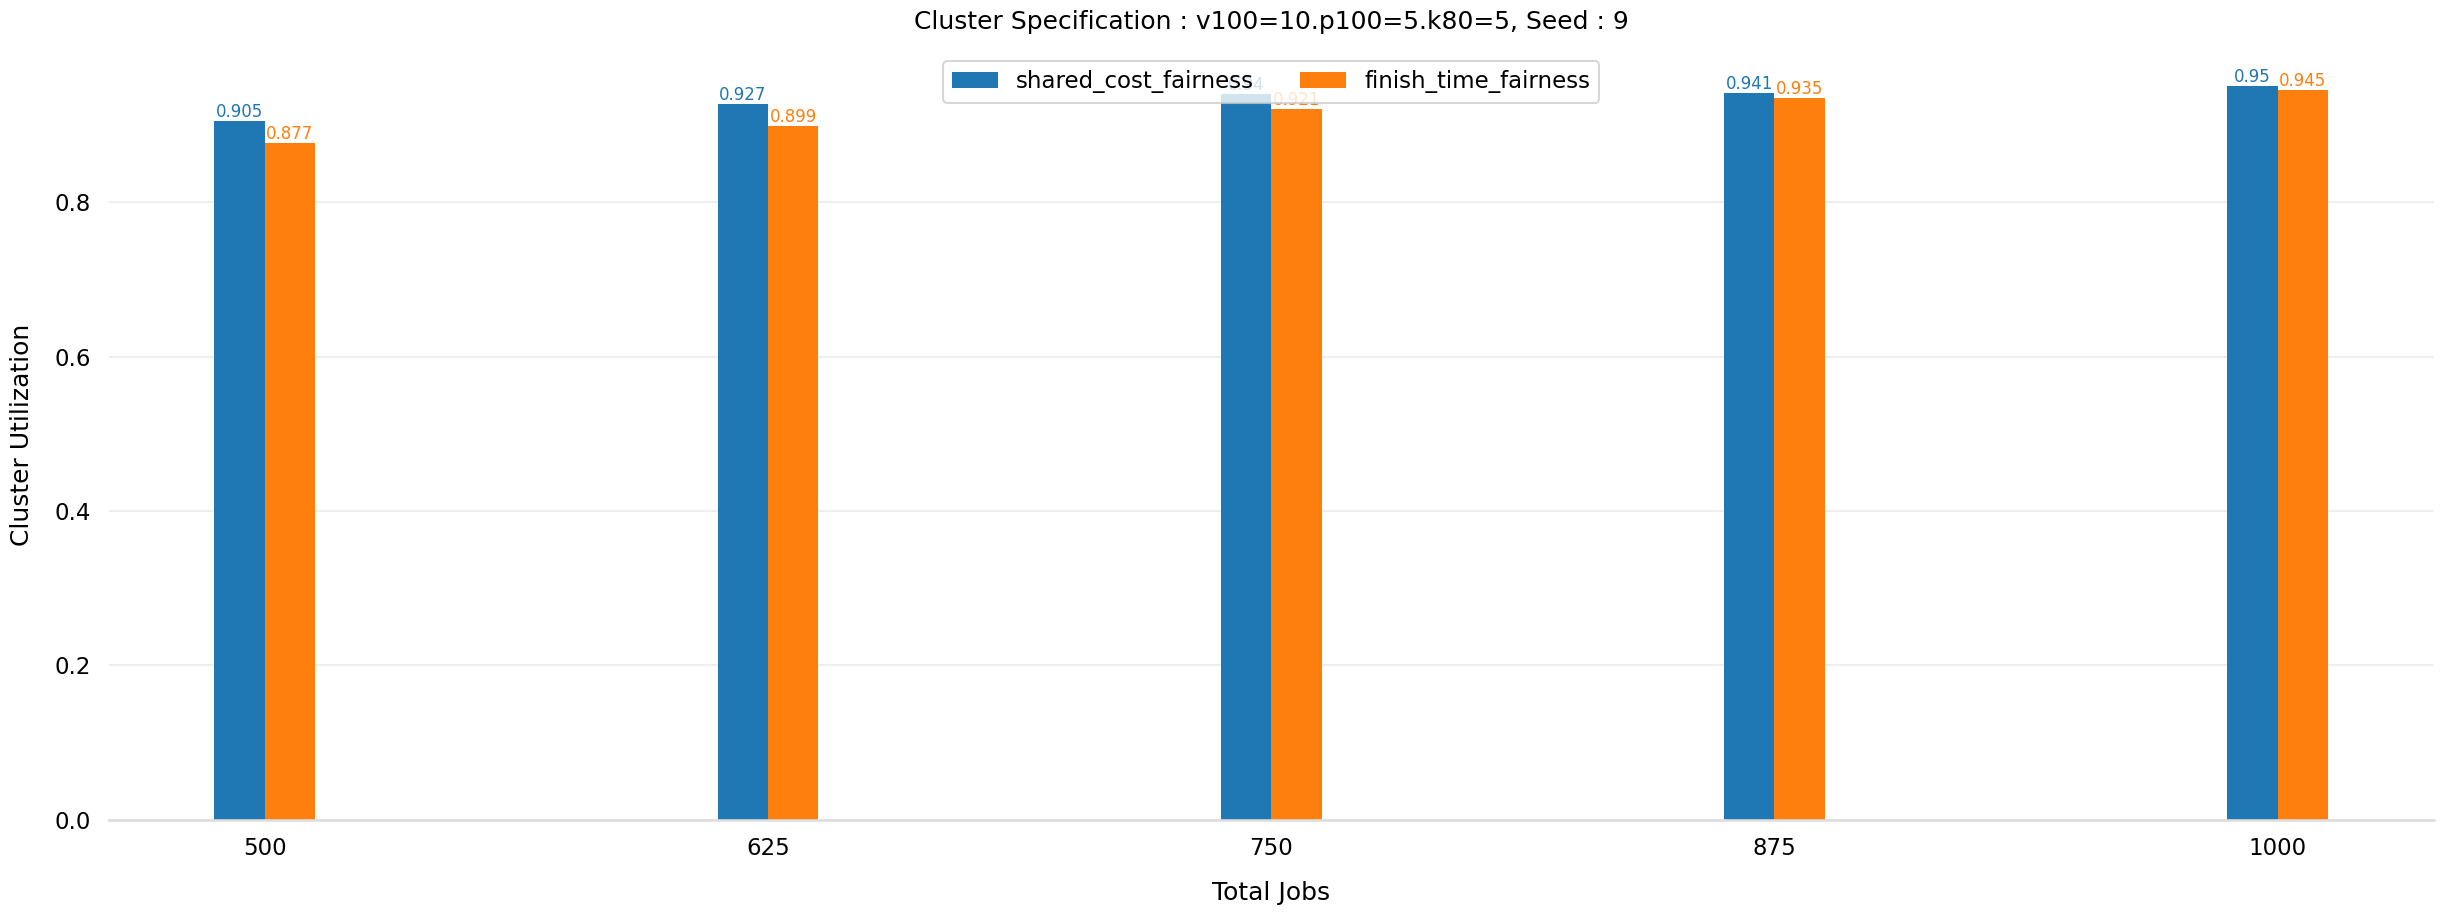

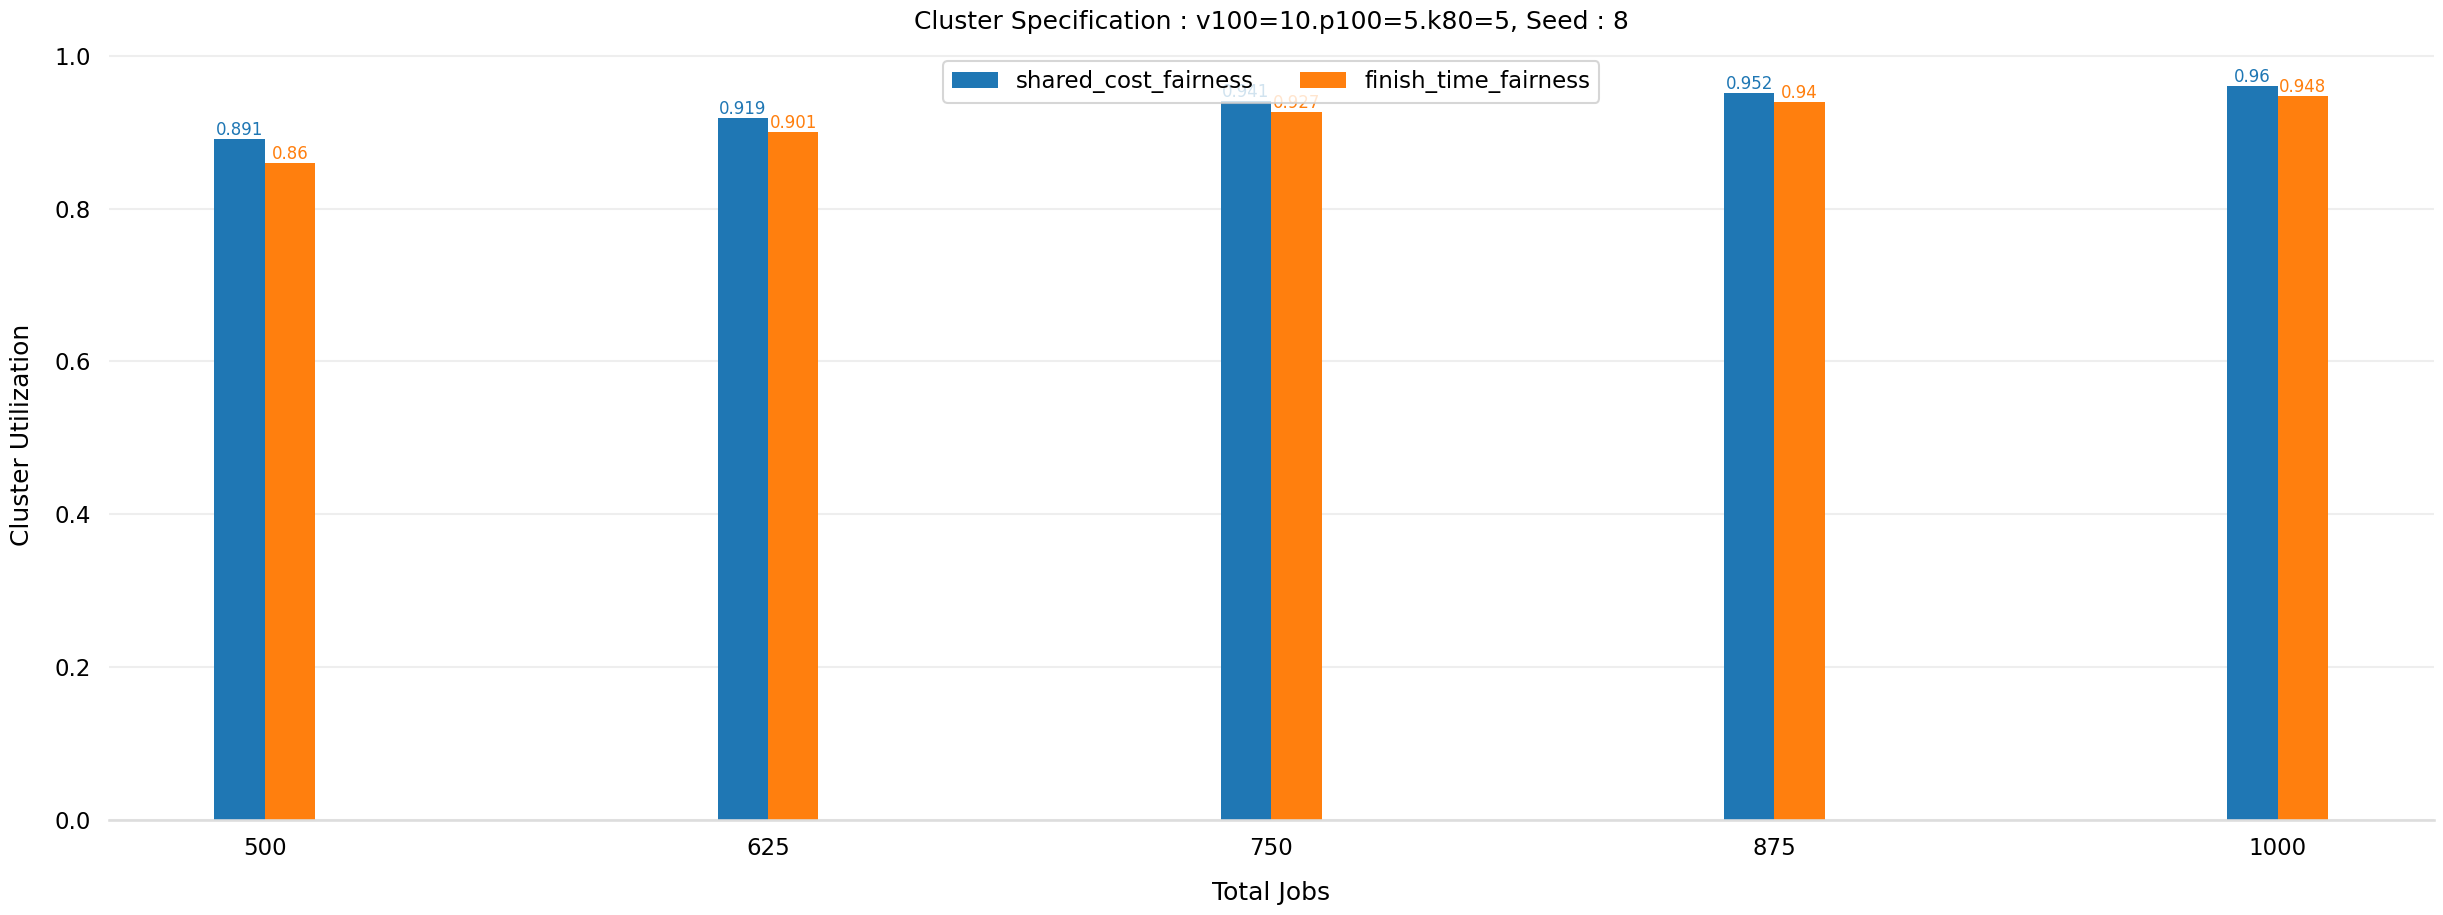

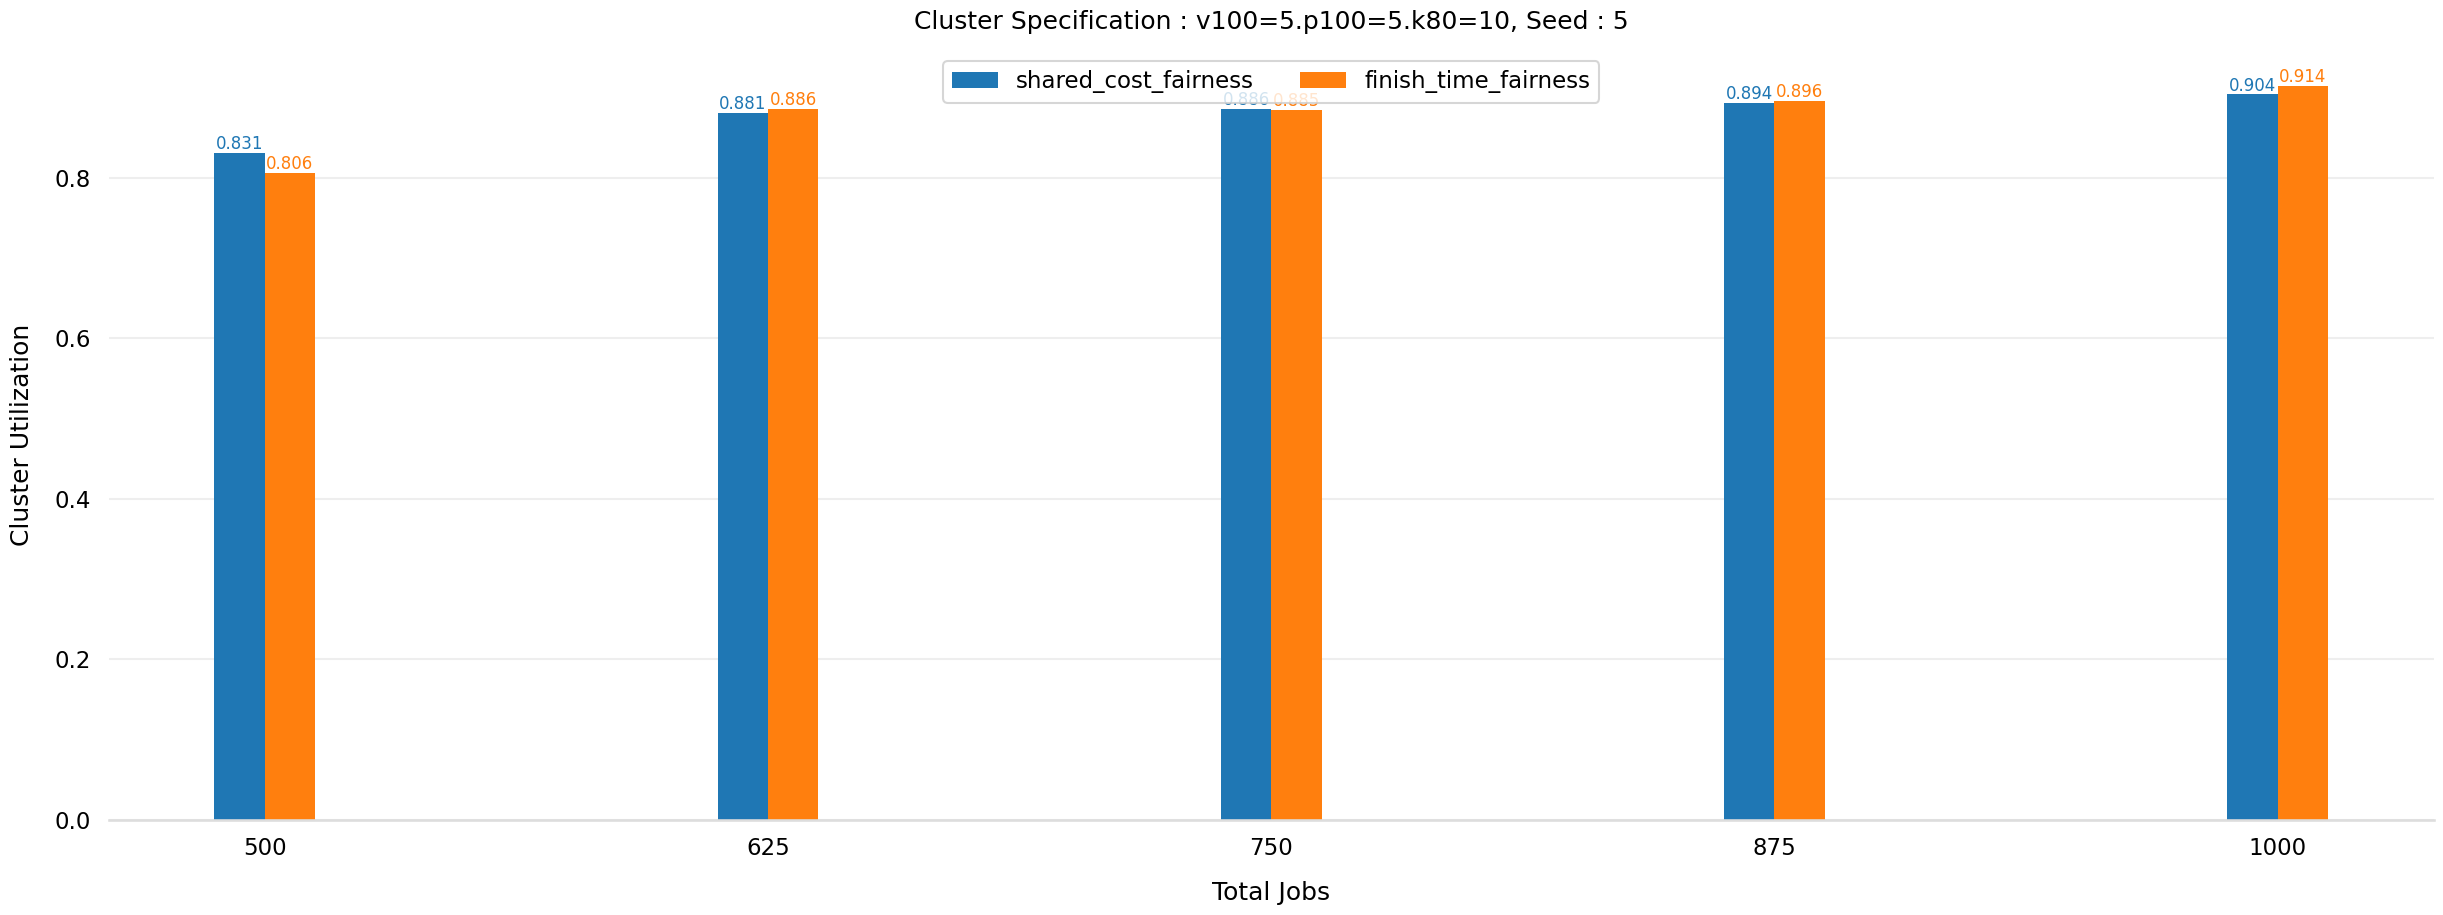

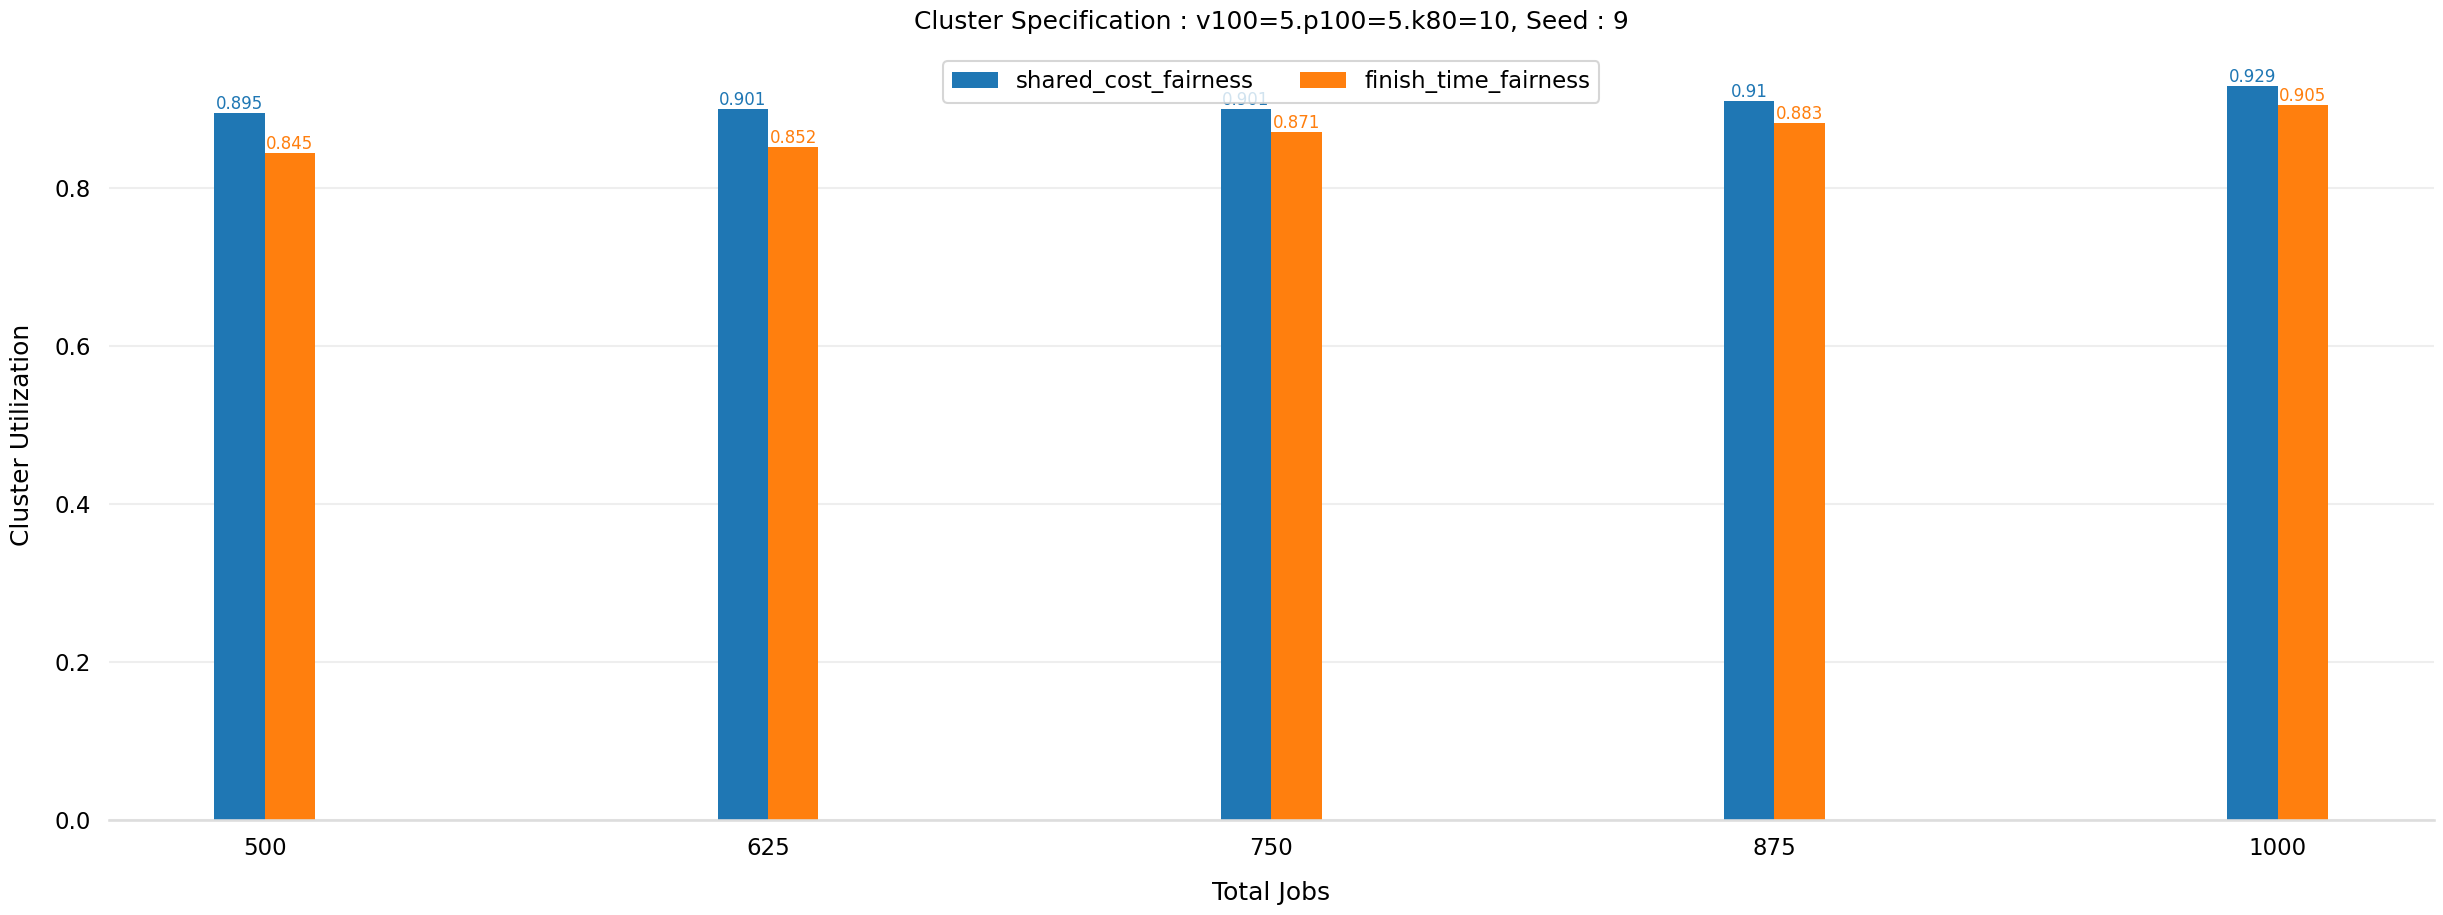

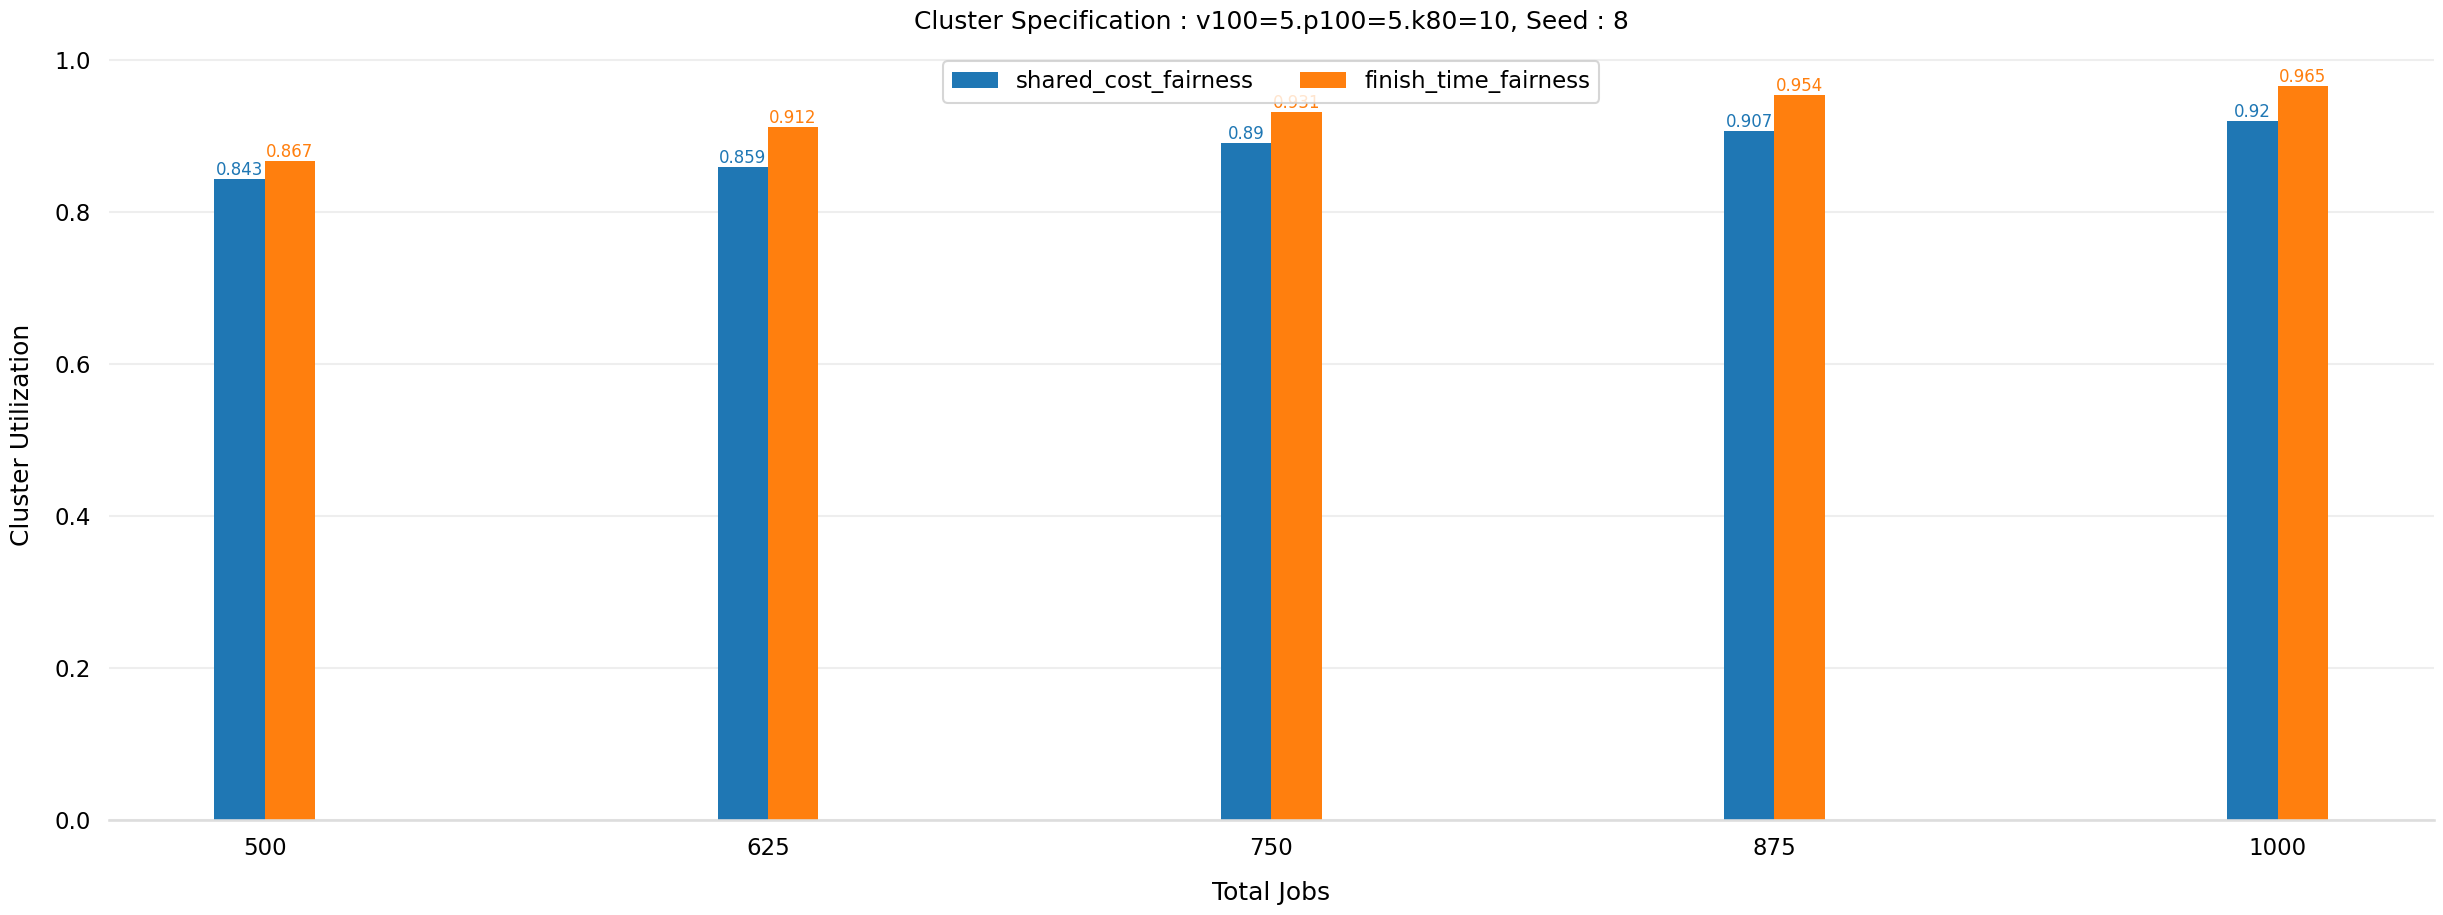

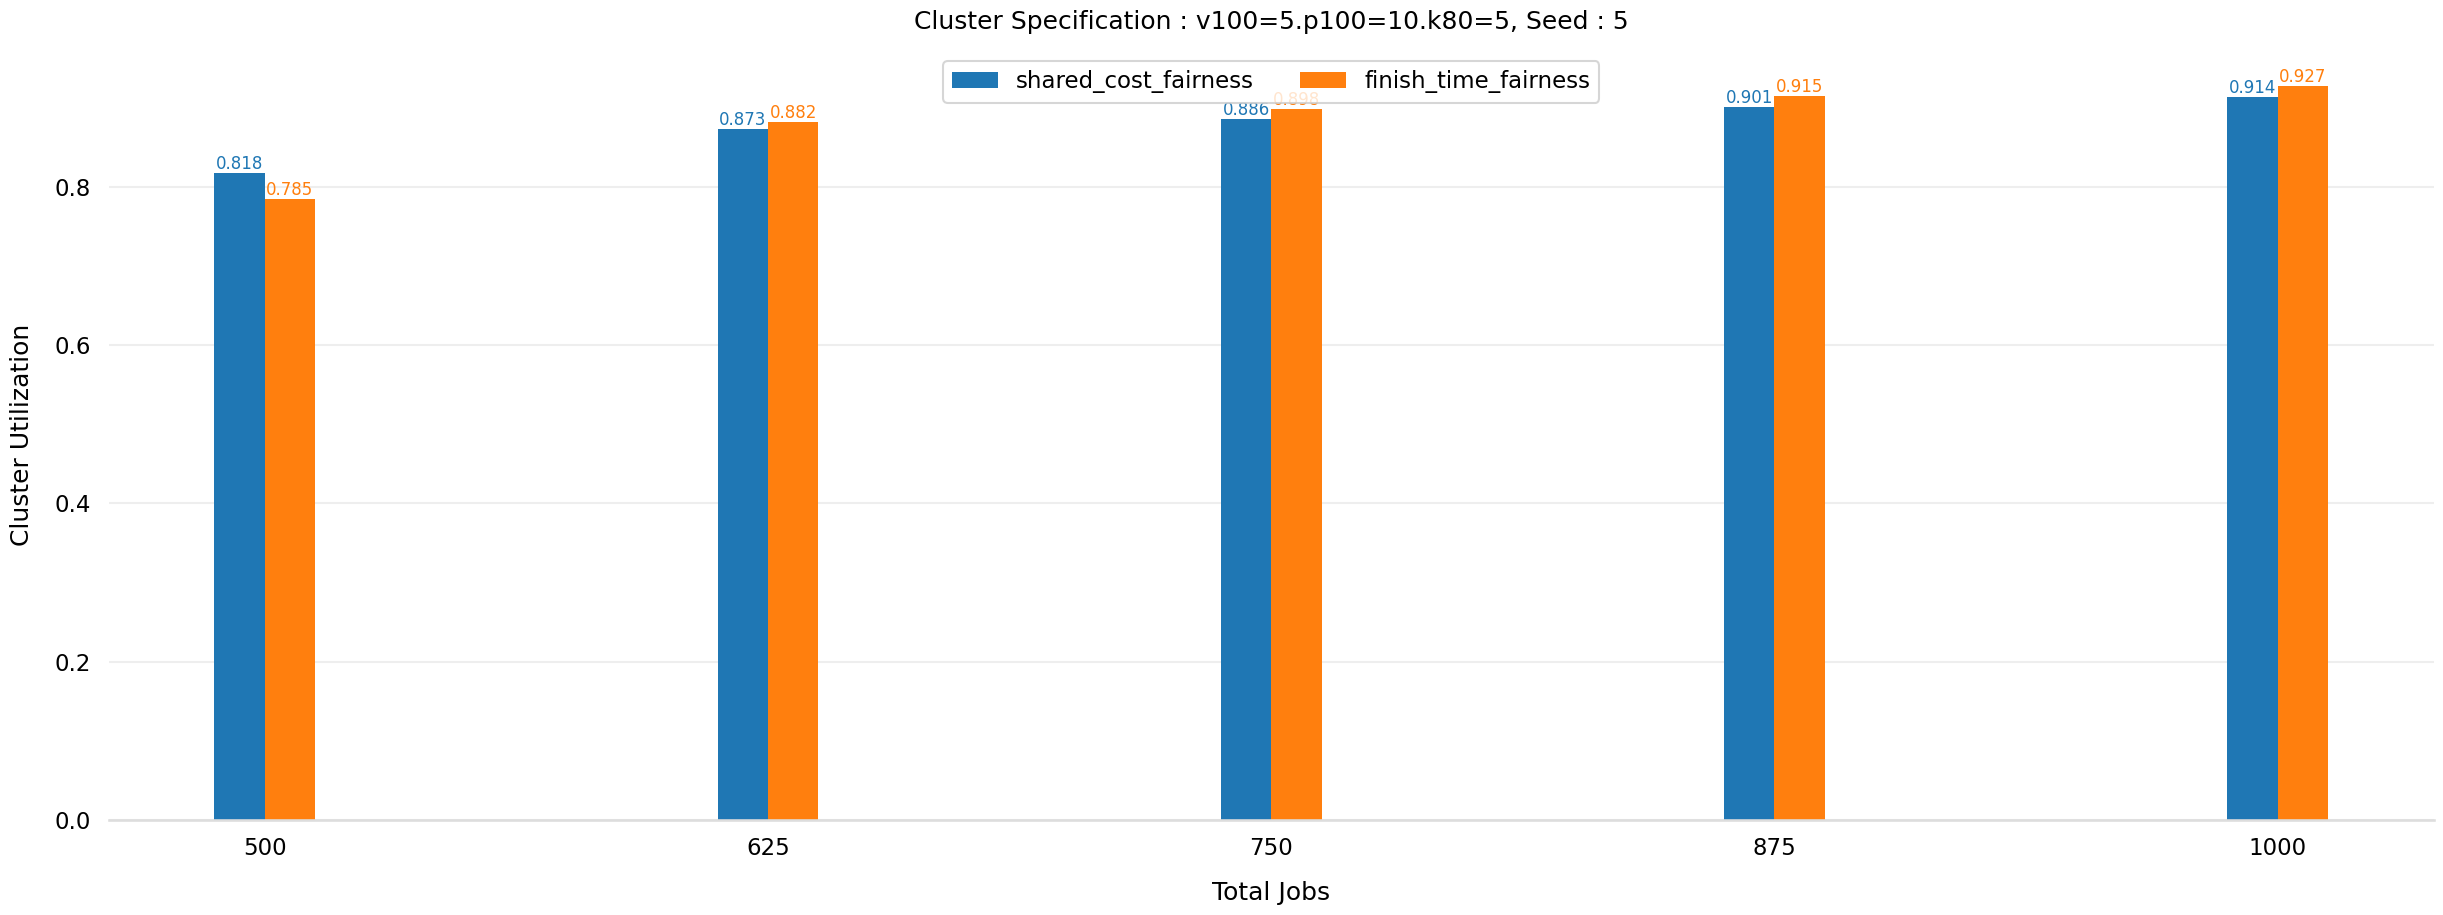

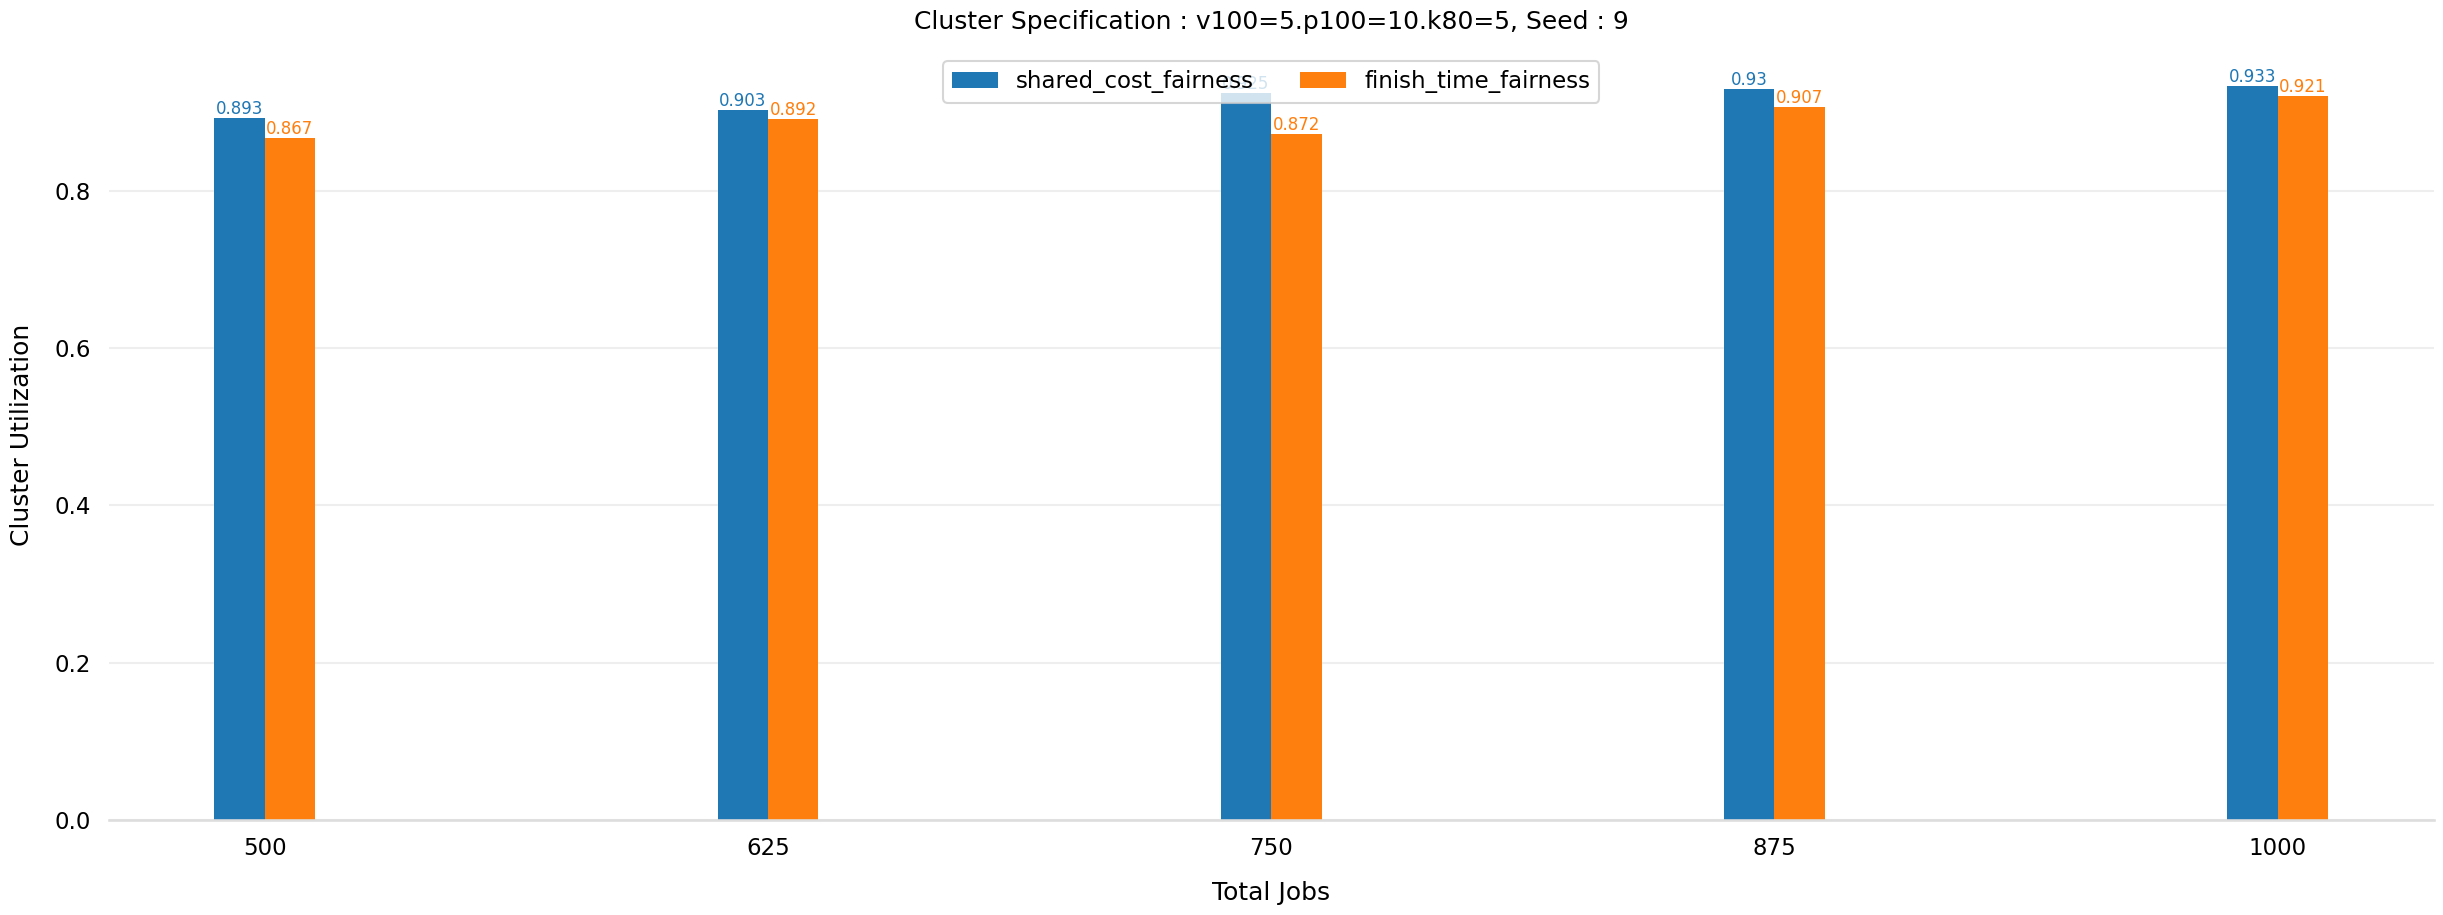

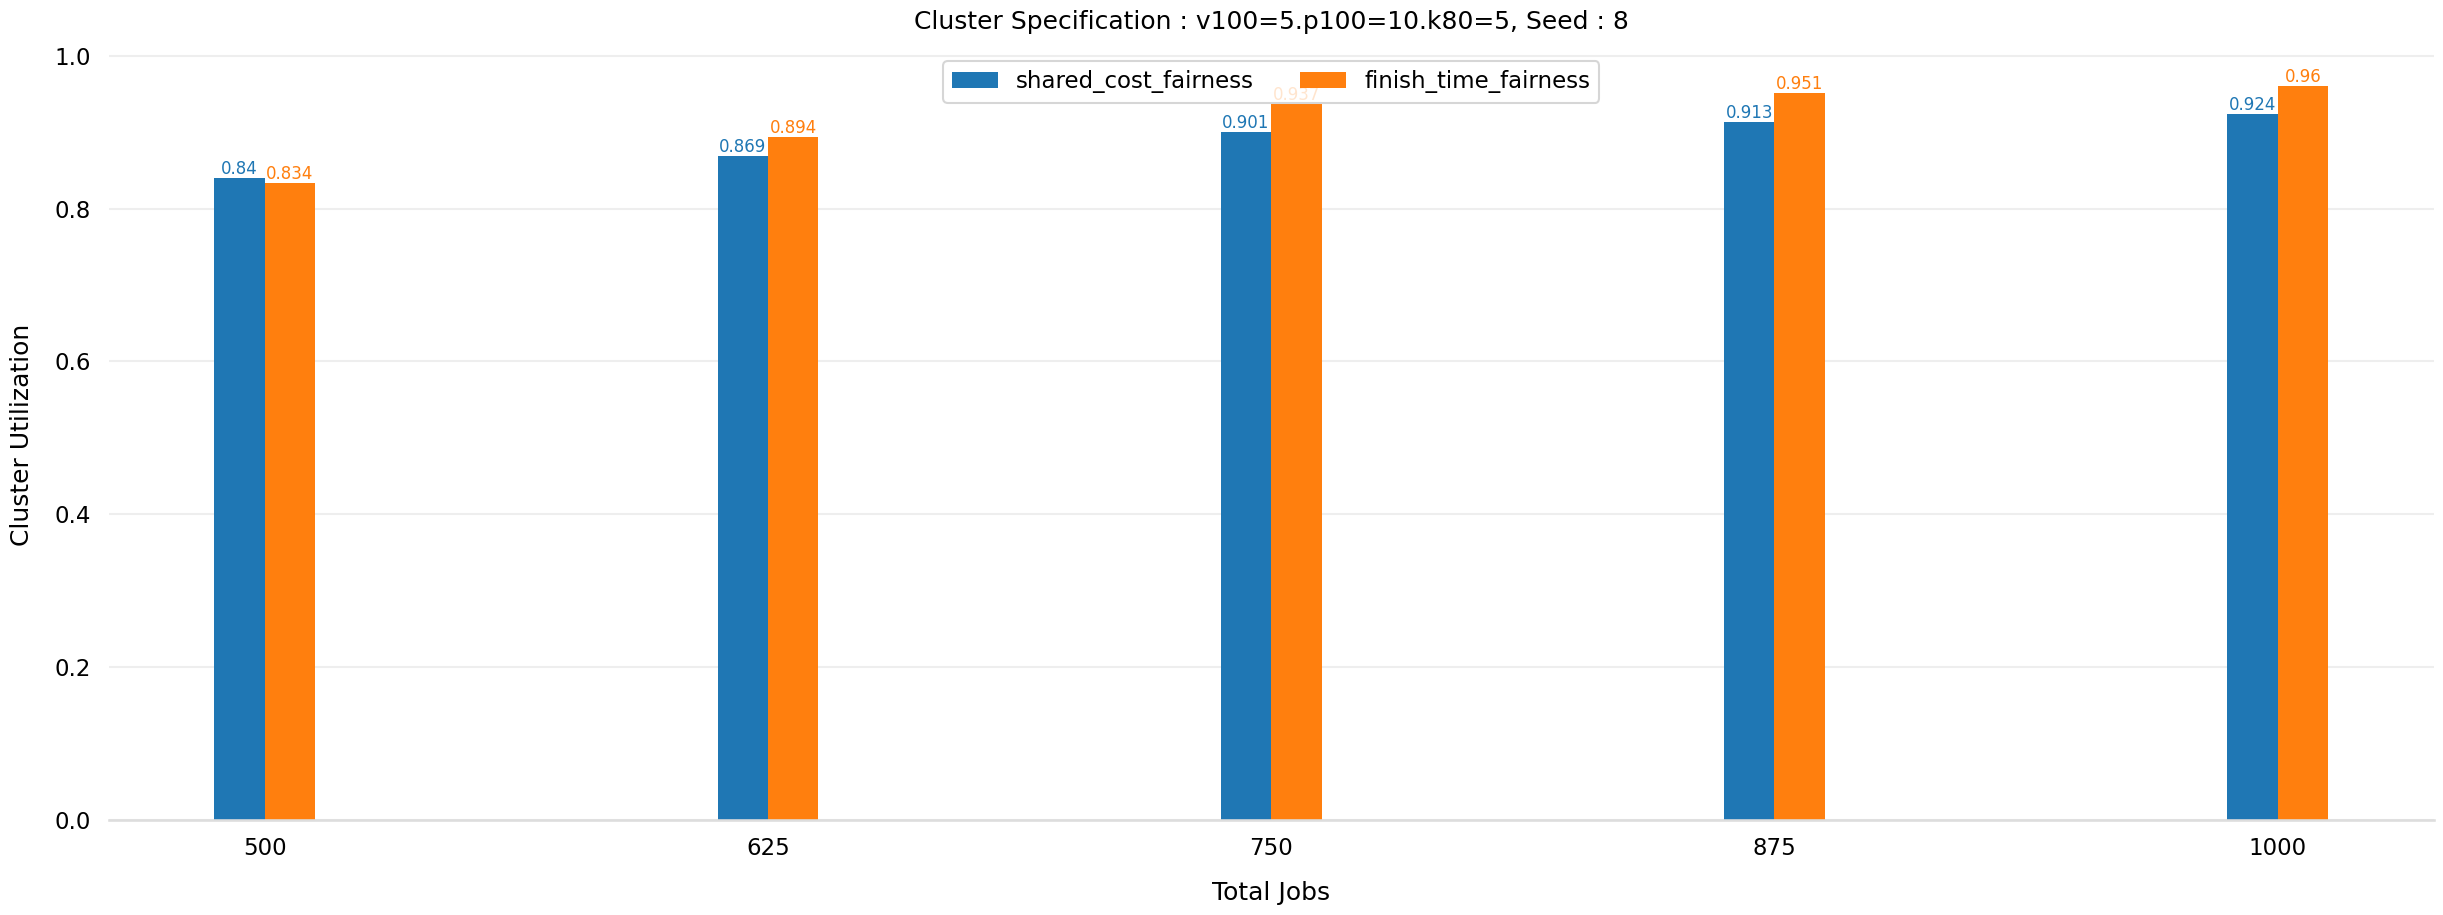

In [12]:
for cluster_spec in df_static["cluster_spec"].unique():
    for seed in df_static["seed"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & seed == {seed}')
        
        no_graphs = len(result_int["policy"].unique())

        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.1
        
        for idx, policy in enumerate(result_int["policy"].unique()):
            result = result_int.query(f'policy == "{policy}"')
            result = result.sort_values("total_jobs")

            x = np.arange(len(result["total_jobs"].unique()))
            y = [float(r) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'{policy}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper center", ncols=5)

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Seed : {seed}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)
            

Generate csv for continuous sweep simulations
since the jobs no. are dynamic, changes to the header column are done separately

In [14]:
raw_log_path = "/home/piyush/rp/work/logs/comparison/themis_modified/continuous/raw_logs/"
cluster_specs = os.listdir(raw_log_path)
output_file = "continuous_comparison.csv"
append_to_file = False

if os.path.exists(output_file):
    append_to_file = True

with open(output_file, 'a') as output_file:
    # workaround, since can't store all simulation logs at the same time due to space issues
    if append_to_file:
        output_file.seek(0,2)
    else:
        output_file.write("cluster_spec,#v100,#p100,#k80,policy,seed,lambda,utilization,average_completion_time,total_completion_time,window_duration\n")

    for cluster_spec in cluster_specs:
        worker_type = [worker.split("=")[0] for worker in cluster_spec.split(".")]
        worker_count = [worker.split("=")[1] for worker in cluster_spec.split(".")]
        print(worker_type)
        print(worker_count)
        

        policies = os.listdir(raw_log_path + cluster_spec + "/")
        for policy in policies:
            print(policy)
            

            seeds = os.listdir(raw_log_path + cluster_spec + "/" + policy)
            for seed in seeds:
                print(seed)
                
                for file in os.listdir(raw_log_path + cluster_spec + "/" + policy + "/" + seed):
                    lam = file.split(".")[0].split("=")[1].rstrip()

                    output_file.write(cluster_spec)
                    output_file.write(",")
                    output_file.write(worker_count[0])
                    output_file.write(",")
                    output_file.write(worker_count[1])
                    output_file.write(",")
                    output_file.write(worker_count[2])
                    output_file.write(",")
                    output_file.write(policy)
                    output_file.write(",")
                    output_file.write(seed.split("=")[1])
                    output_file.write(",")
                    output_file.write(lam)
                    output_file.write(",")
                    
                    with open(raw_log_path + cluster_spec + "/" + policy + "/" + seed + "/" + file, 'r') as log_file:
                        lines = log_file.readlines()
                        index = len(lines)

                        #cluster utilization
                        index = index - 1
                        cluster_utilization = lines[index].rstrip()
                        print(cluster_utilization)
                        output_file.write(cluster_utilization.split(":")[1])
                        output_file.write(",")

                        #Average job completion time
                        index = index - 2
                        avg_job_completion_time = lines[index].rstrip()
                        print(avg_job_completion_time)
                        output_file.write(avg_job_completion_time.split(":")[1])
                        output_file.write(",")

                        #total duration for all jobs
                        index -= 501
                        total_job_completion_time = lines[index - 2].rstrip()
                        print(total_job_completion_time)
                        output_file.write(total_job_completion_time.split(":")[1])
                        output_file.write(",")

                        window_duration = lines[index - 3].rstrip()
                        output_file.write(window_duration.split(":")[1])
                        output_file.write(",")
                        print(window_duration)

                        #job completion times
                        for i in range(int(500)):
                            index += 1
                            individual_job_completion_time = lines[index].rstrip()                            
                            output_file.write(individual_job_completion_time.split(":")[1])
                            output_file.write(",")
                            print(individual_job_completion_time)
                        
                        output_file.write("\n")

['v100', 'p100', 'k80']
['10', '5', '5']
finish_time_fairness
seed=5
Cluster utilization: 0.840
Average job completion time: 82230.280 seconds (22.84 hours)
Window duration: 2352619.122 seconds (653.51 hours)
Window start time: 1912602.417248
Job 500: 3663.022
Job 501: 10920.717
Job 502: 4201.528
Job 503: 1342.455
Job 504: 215302.021
Job 505: 4471.023
Job 506: 40929.060
Job 507: 57448.166
Job 508: 23367.628
Job 509: 10808.946
Job 510: 61527.083
Job 511: 779851.045
Job 512: 3048.321
Job 513: 19845.303
Job 514: 4687.646
Job 515: 155387.786
Job 516: 123760.431
Job 517: 296528.412
Job 518: 2932.384
Job 519: 33060.613
Job 520: 30892.981
Job 521: 2830.646
Job 522: 24843.789
Job 523: 2648.126
Job 524: 2404.667
Job 525: 137560.949
Job 526: 45526.711
Job 527: 2217.958
Job 528: 95294.512
Job 529: 637035.391
Job 530: 272709.460
Job 531: 29327.761
Job 532: 14731.701
Job 533: 22398.937
Job 534: 38457.888
Job 535: 537861.564
Job 536: 18023.161
Job 537: 10166.583
Job 538: 2994.106
Job 539: 3678.693
J

create a pandas data frame for continuous trace data

In [15]:
csv_path = '/home/piyush/rp/work/analysis/continuous_comparison_updated.csv'
df_continuous = pd.read_csv(csv_path)

how does the cluster utilization vary with lambda 

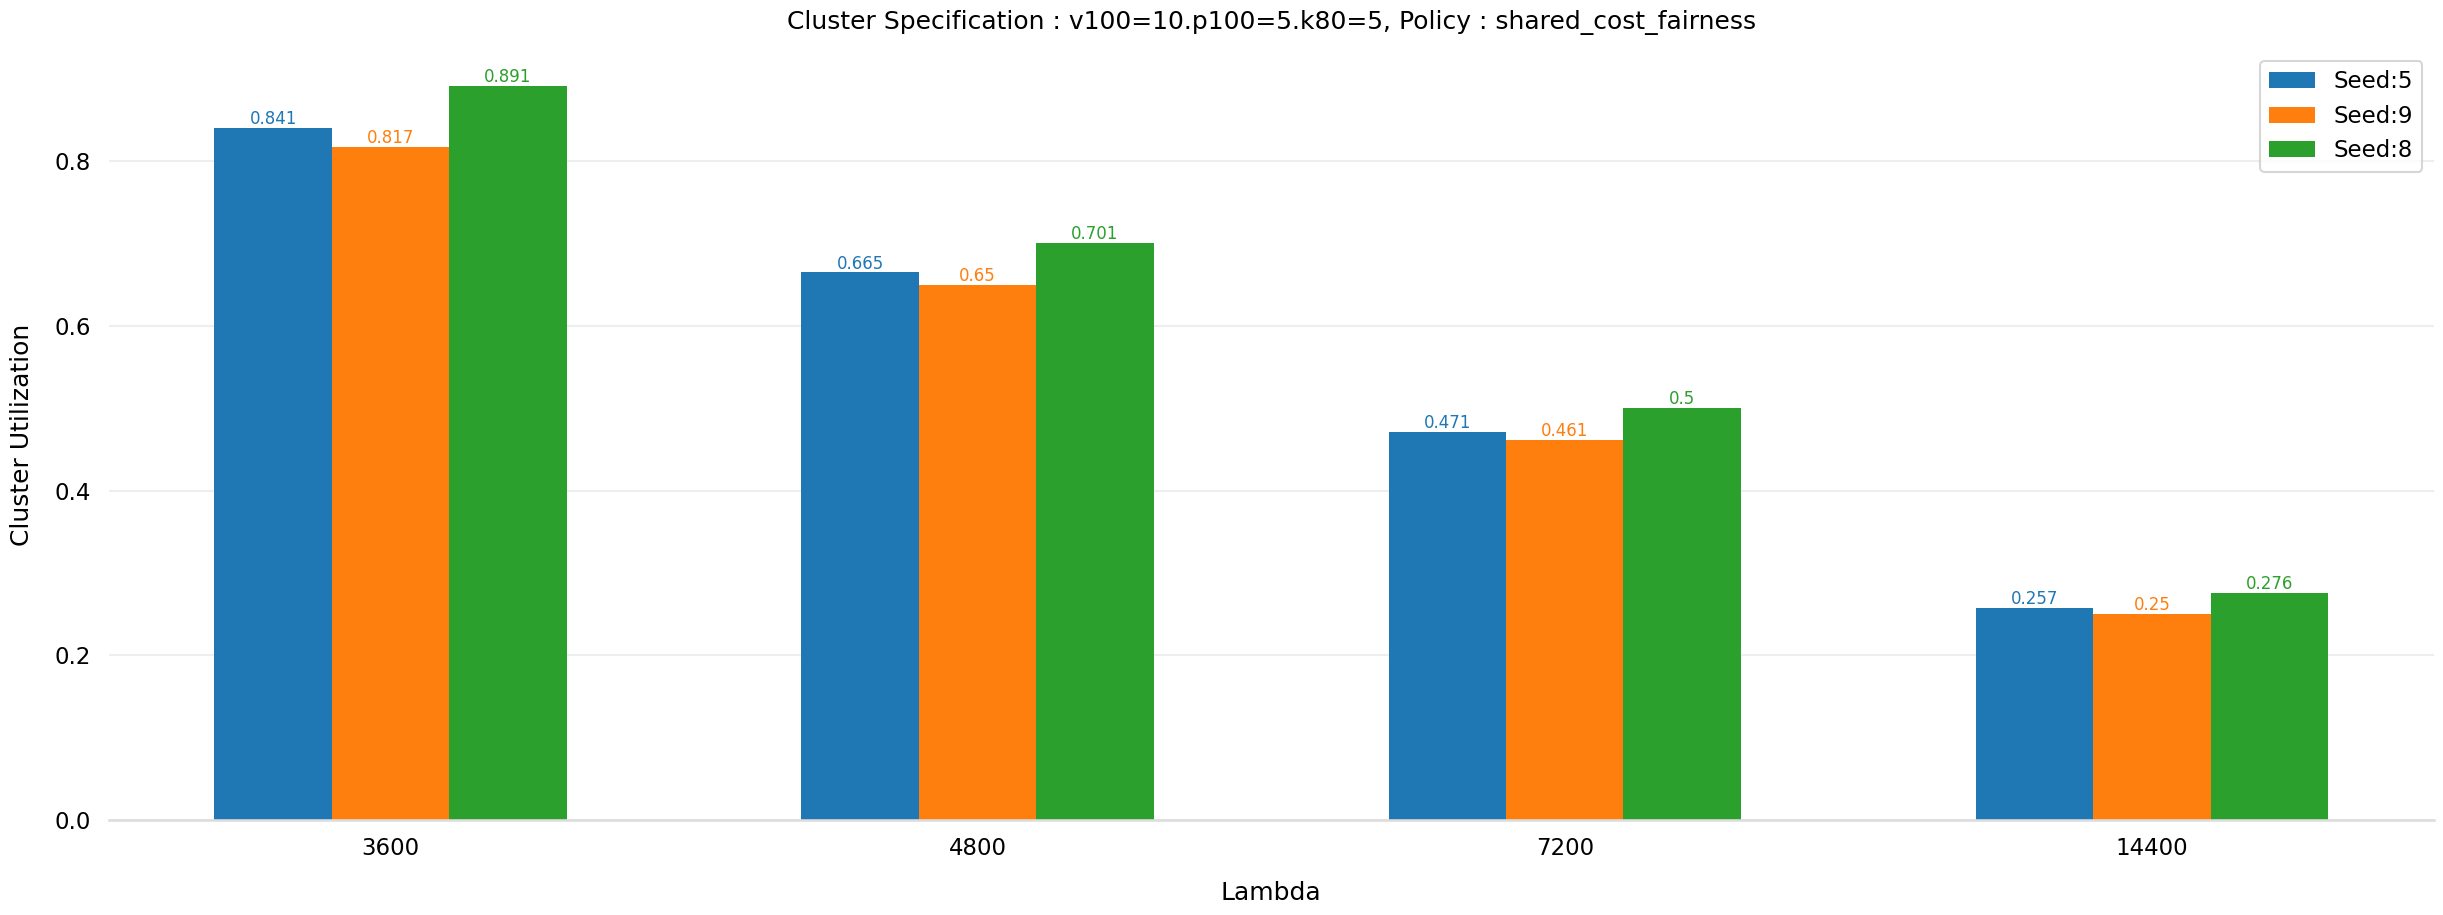

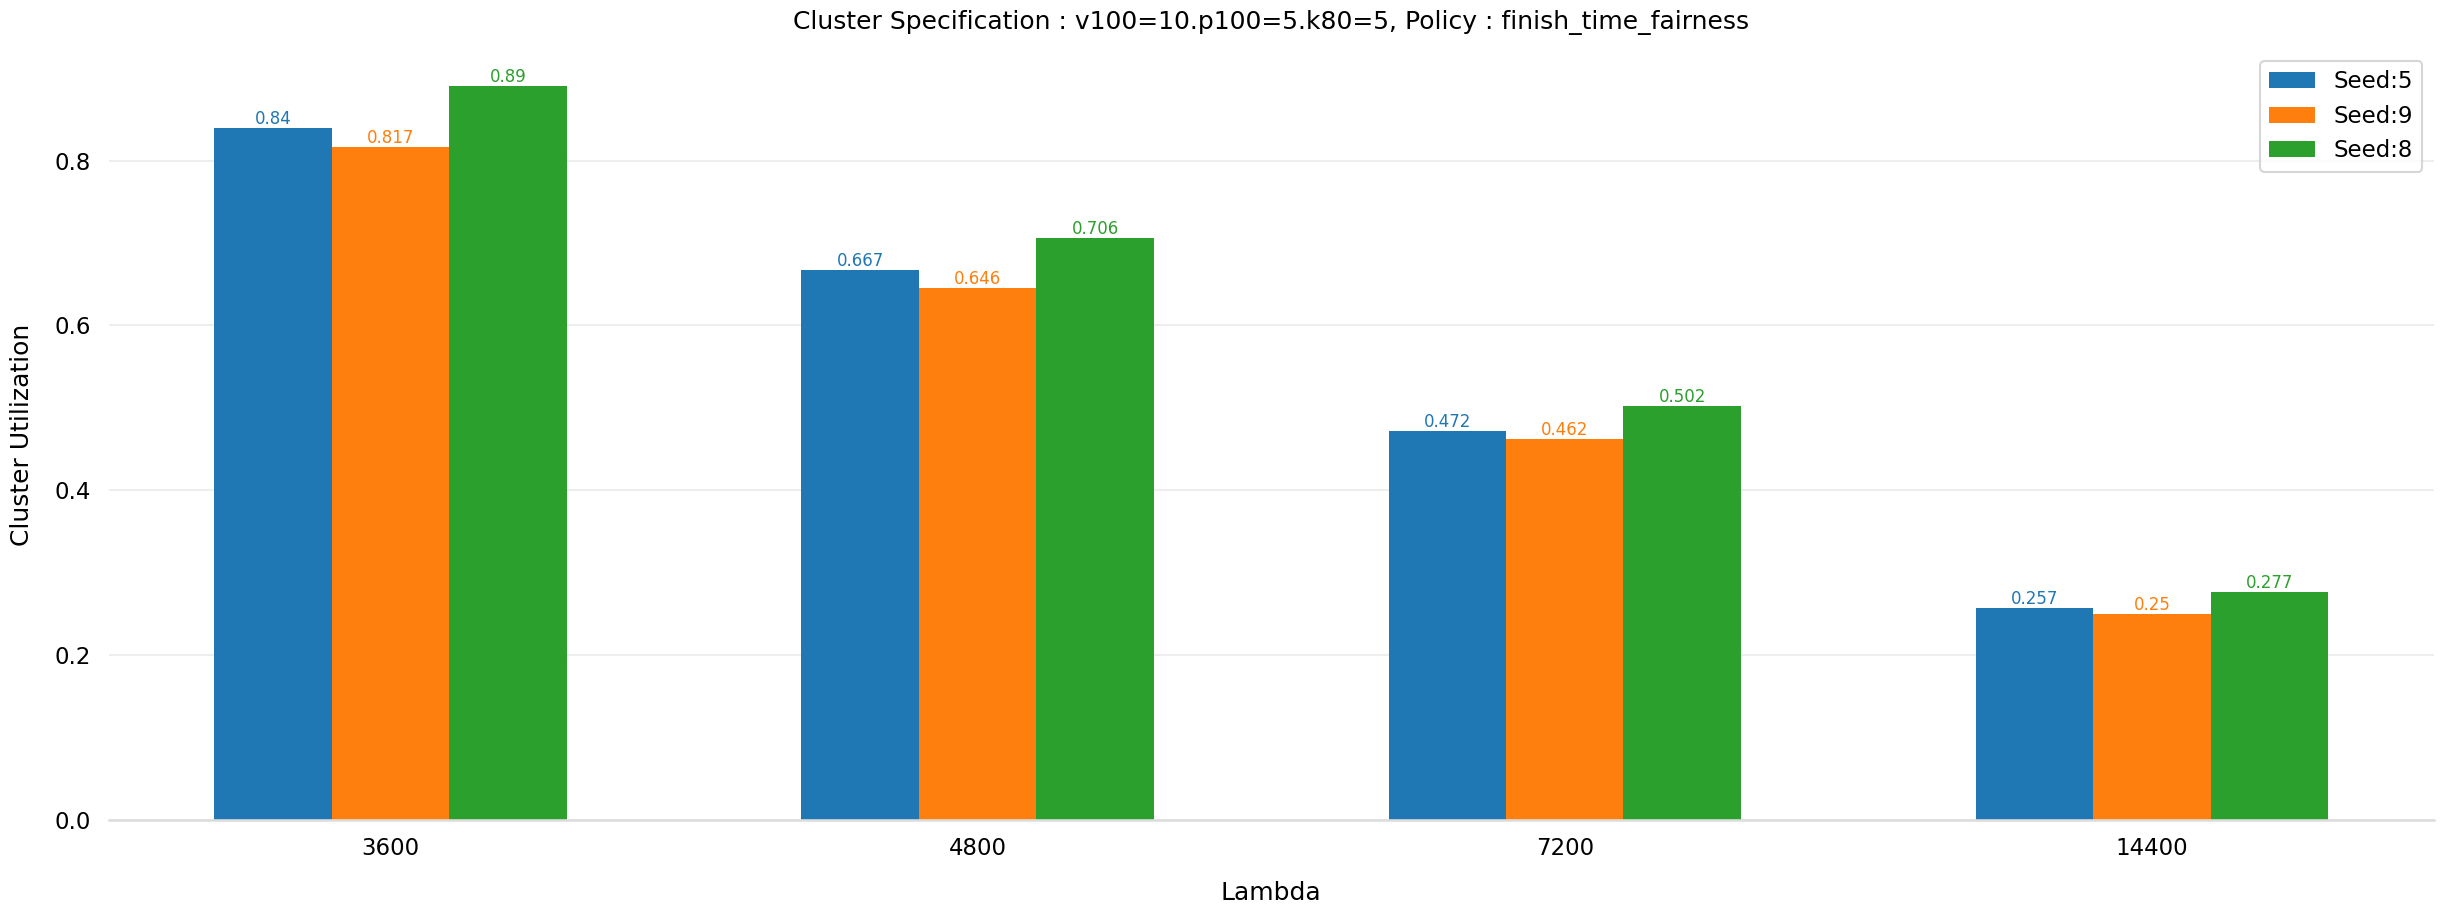

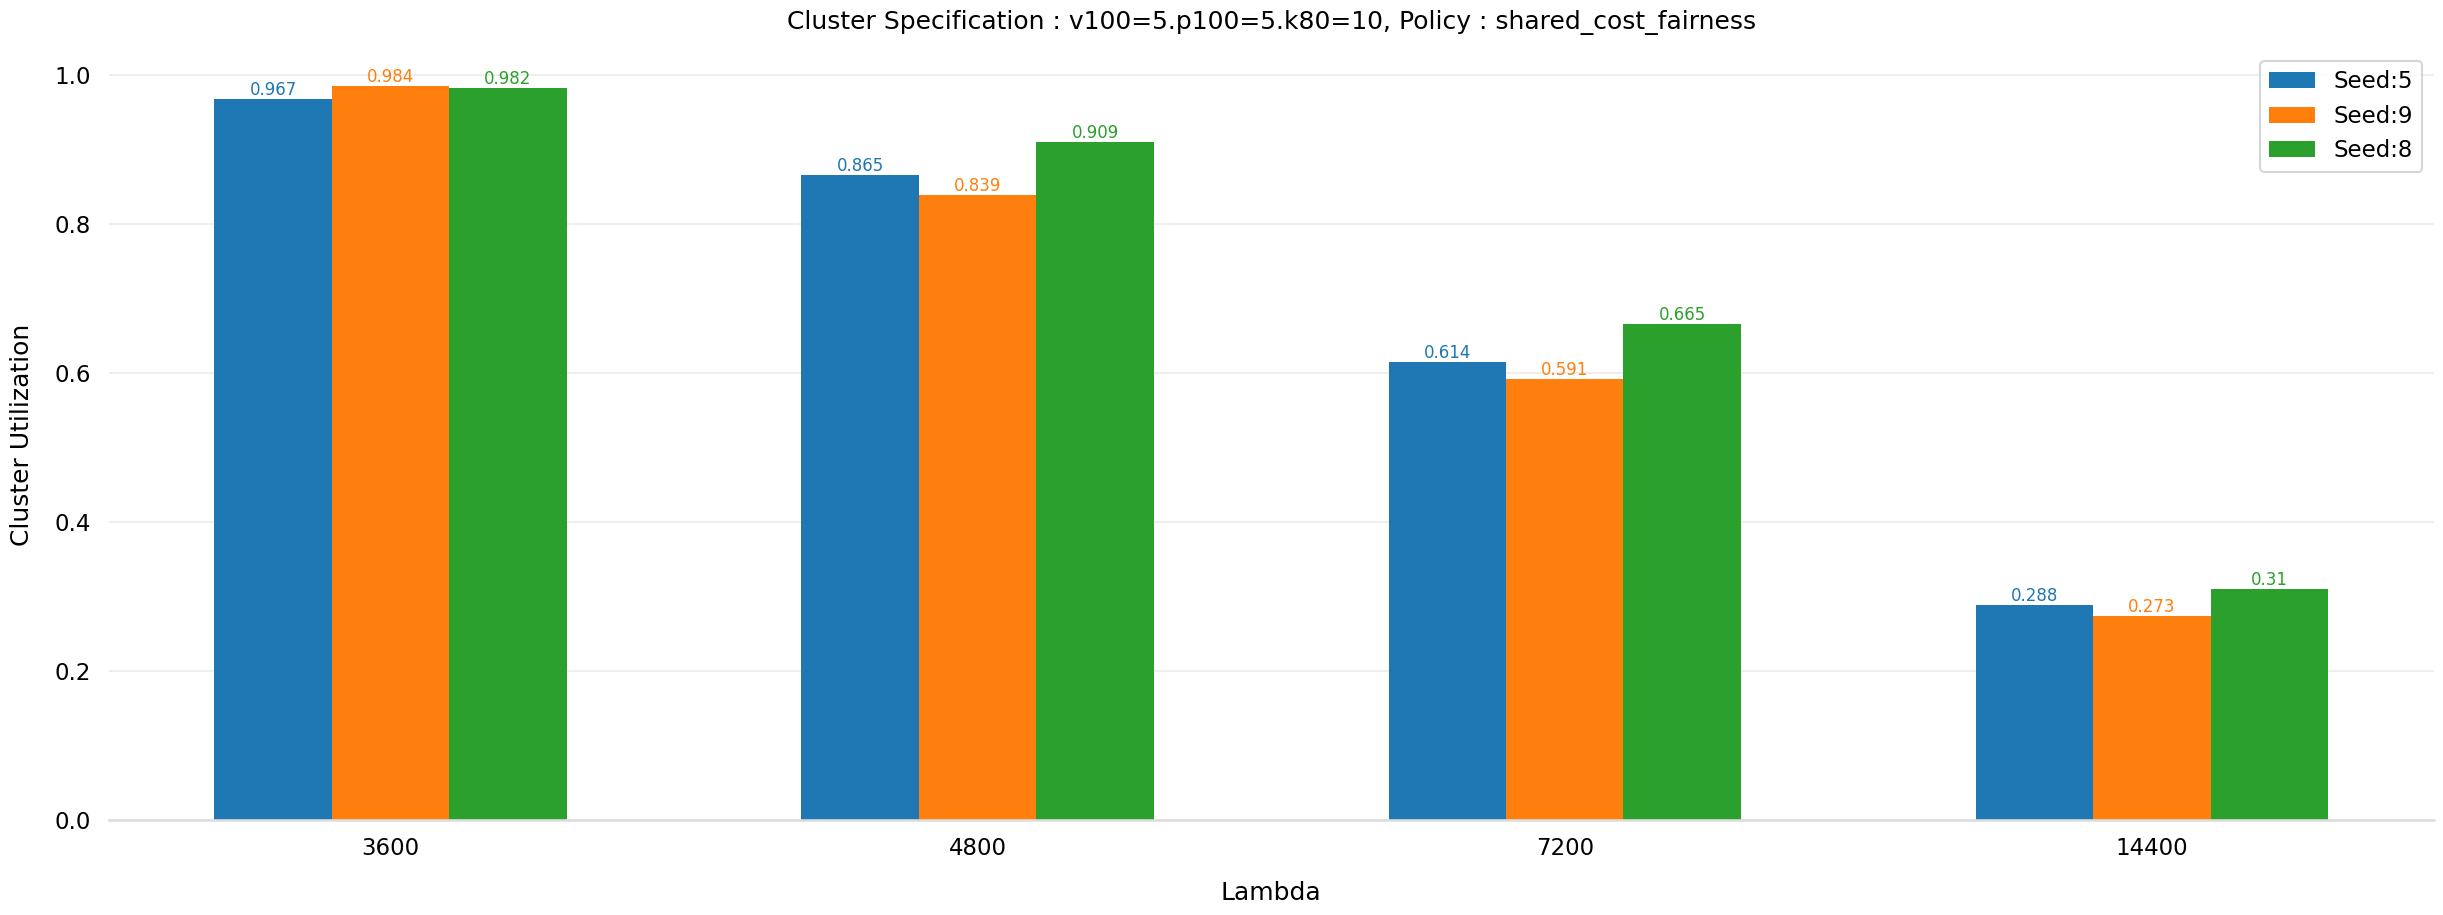

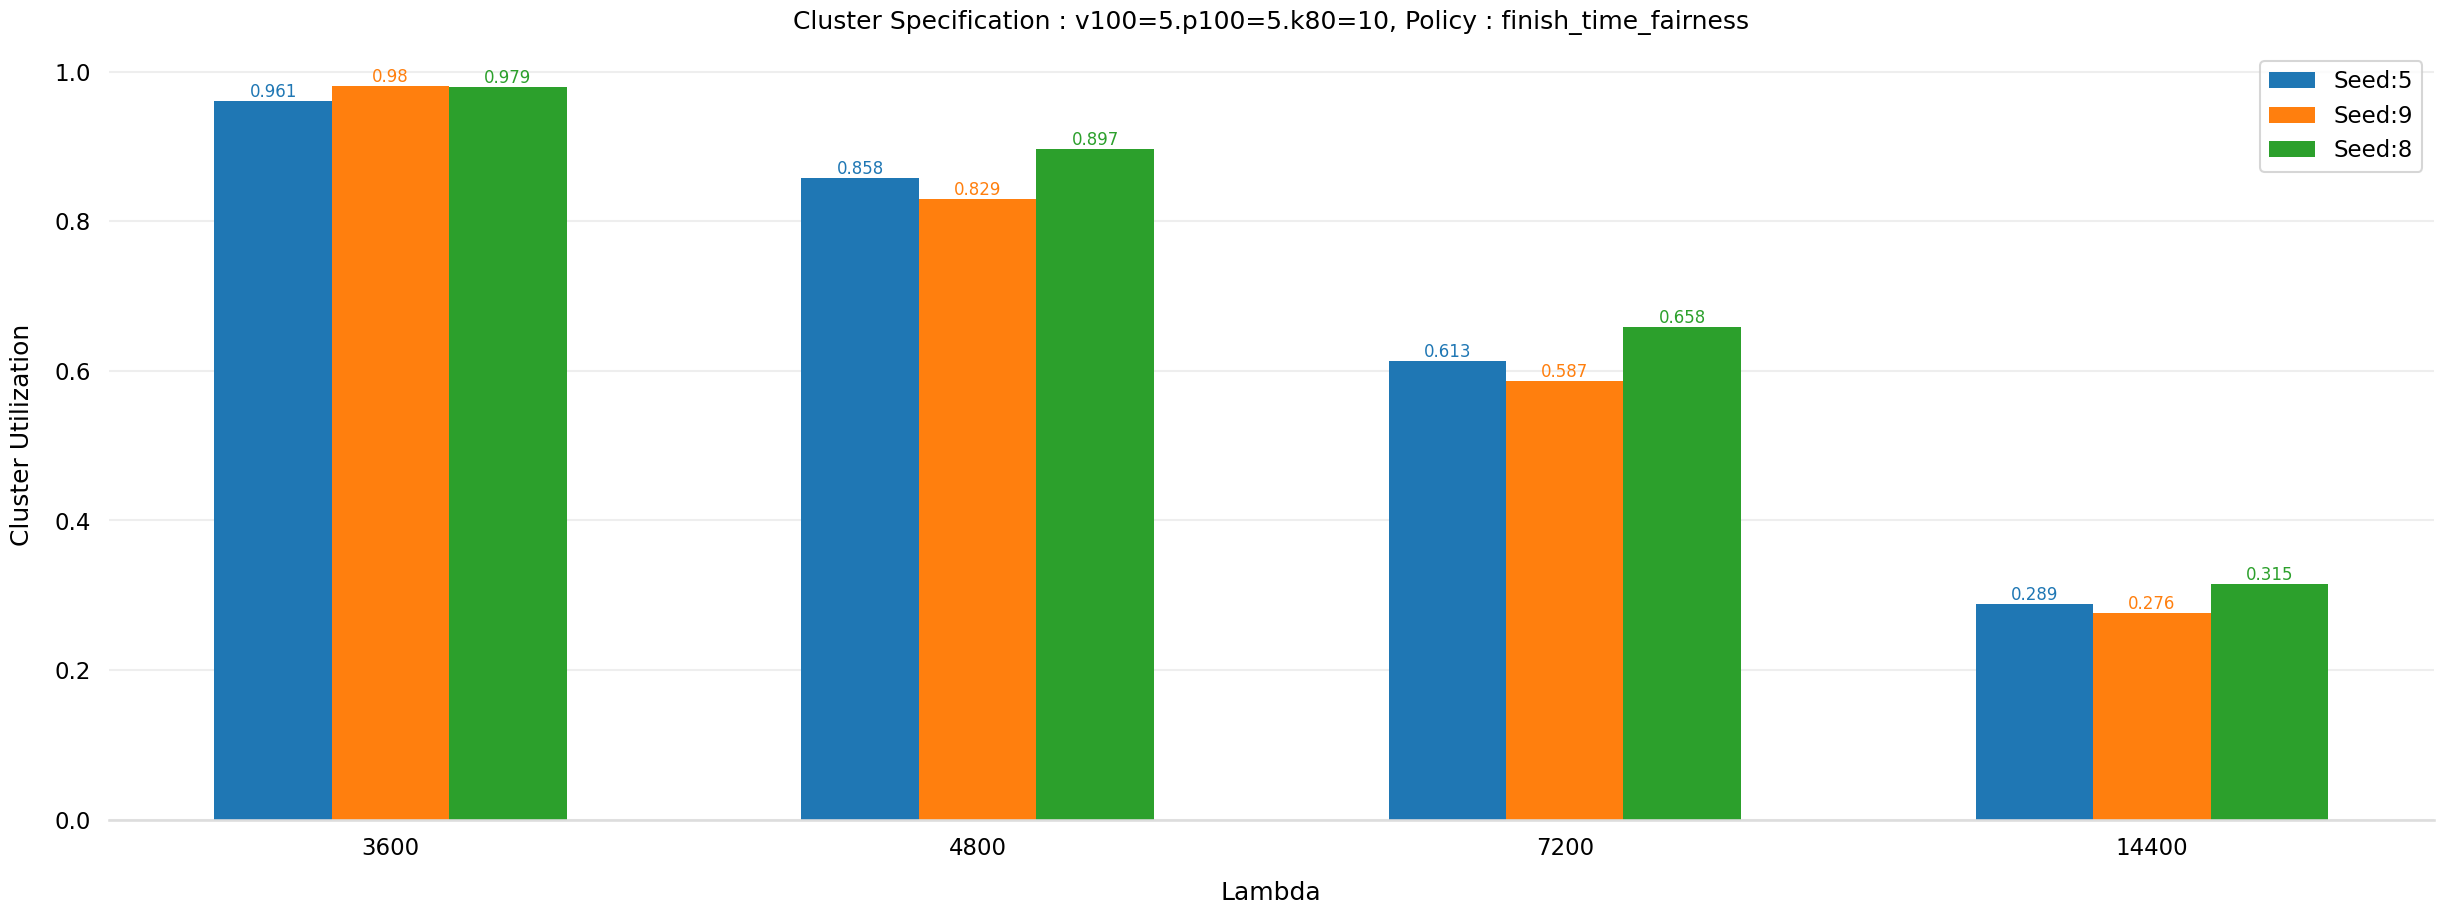

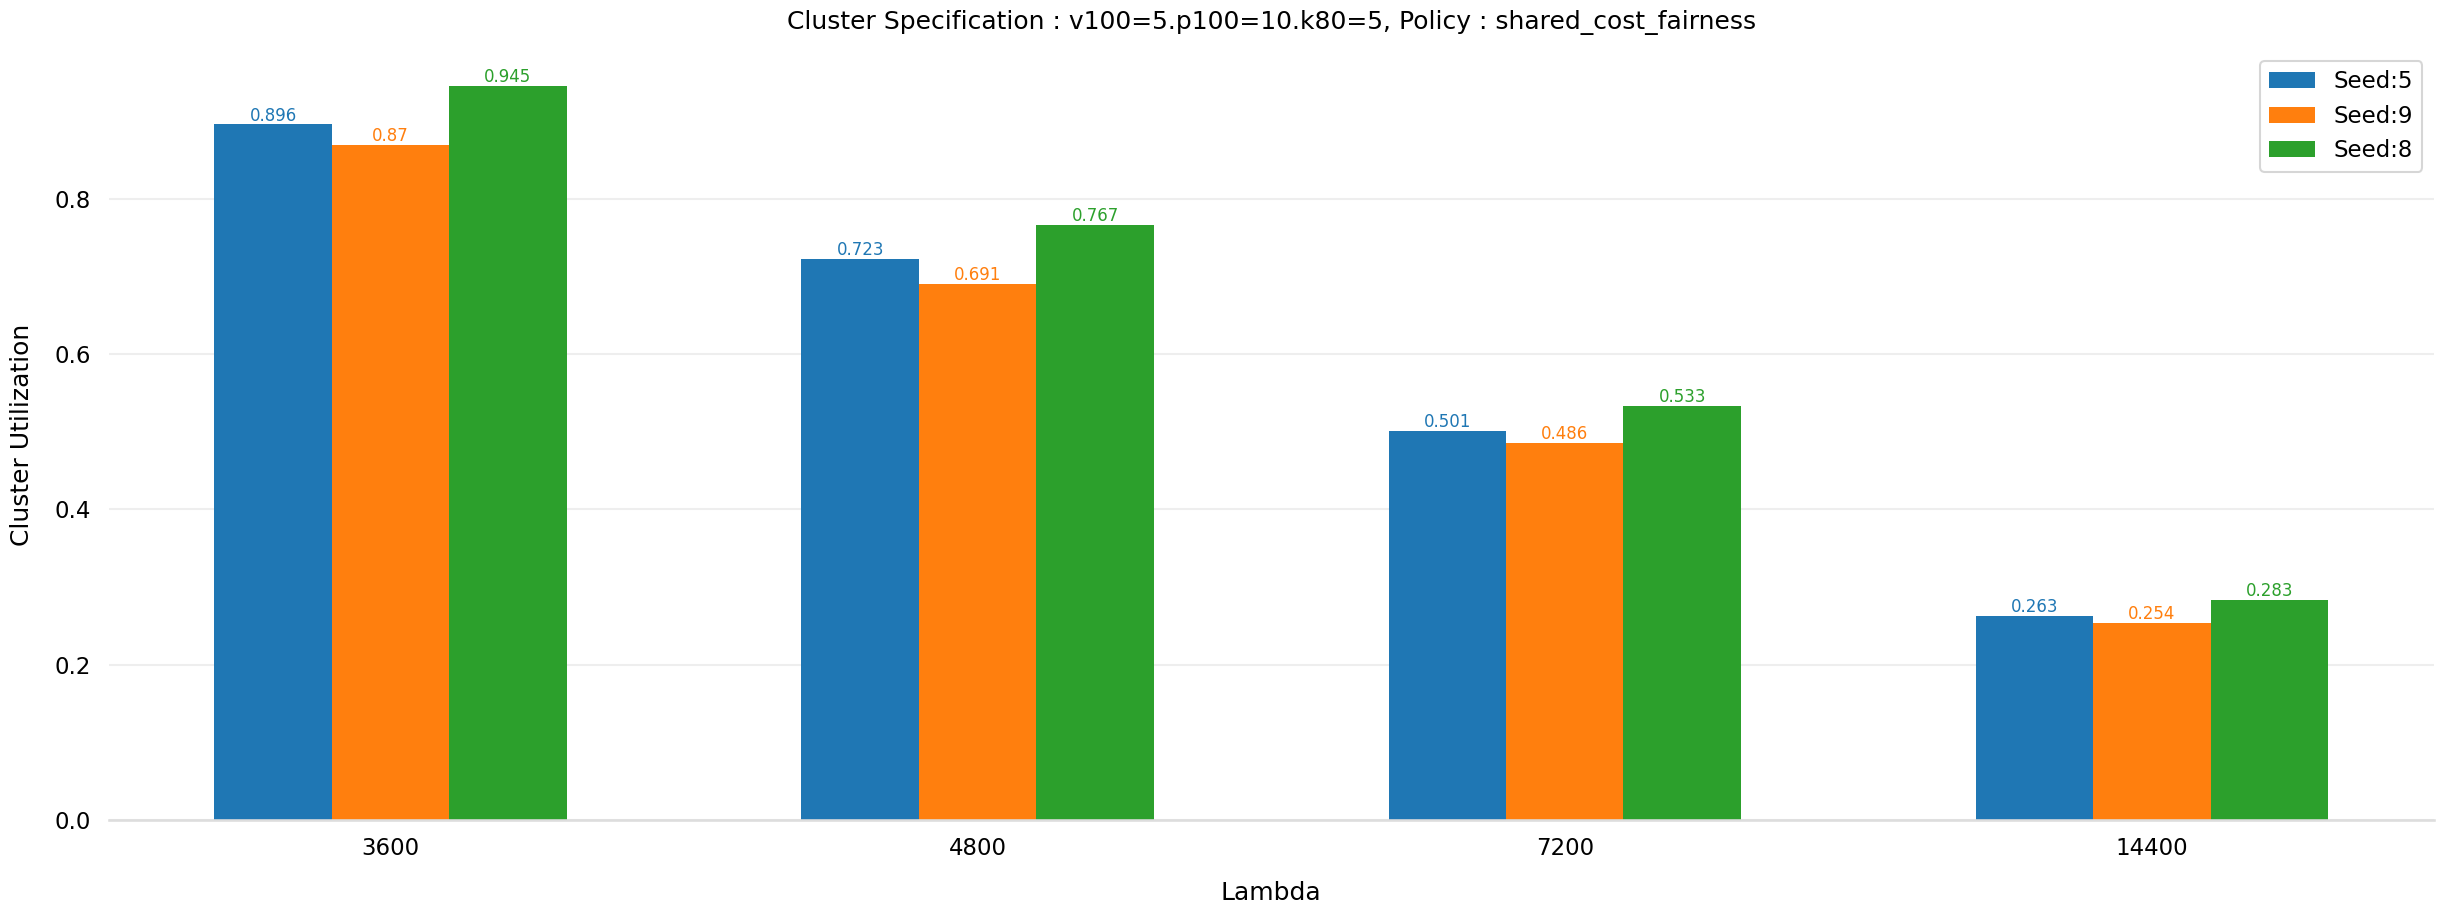

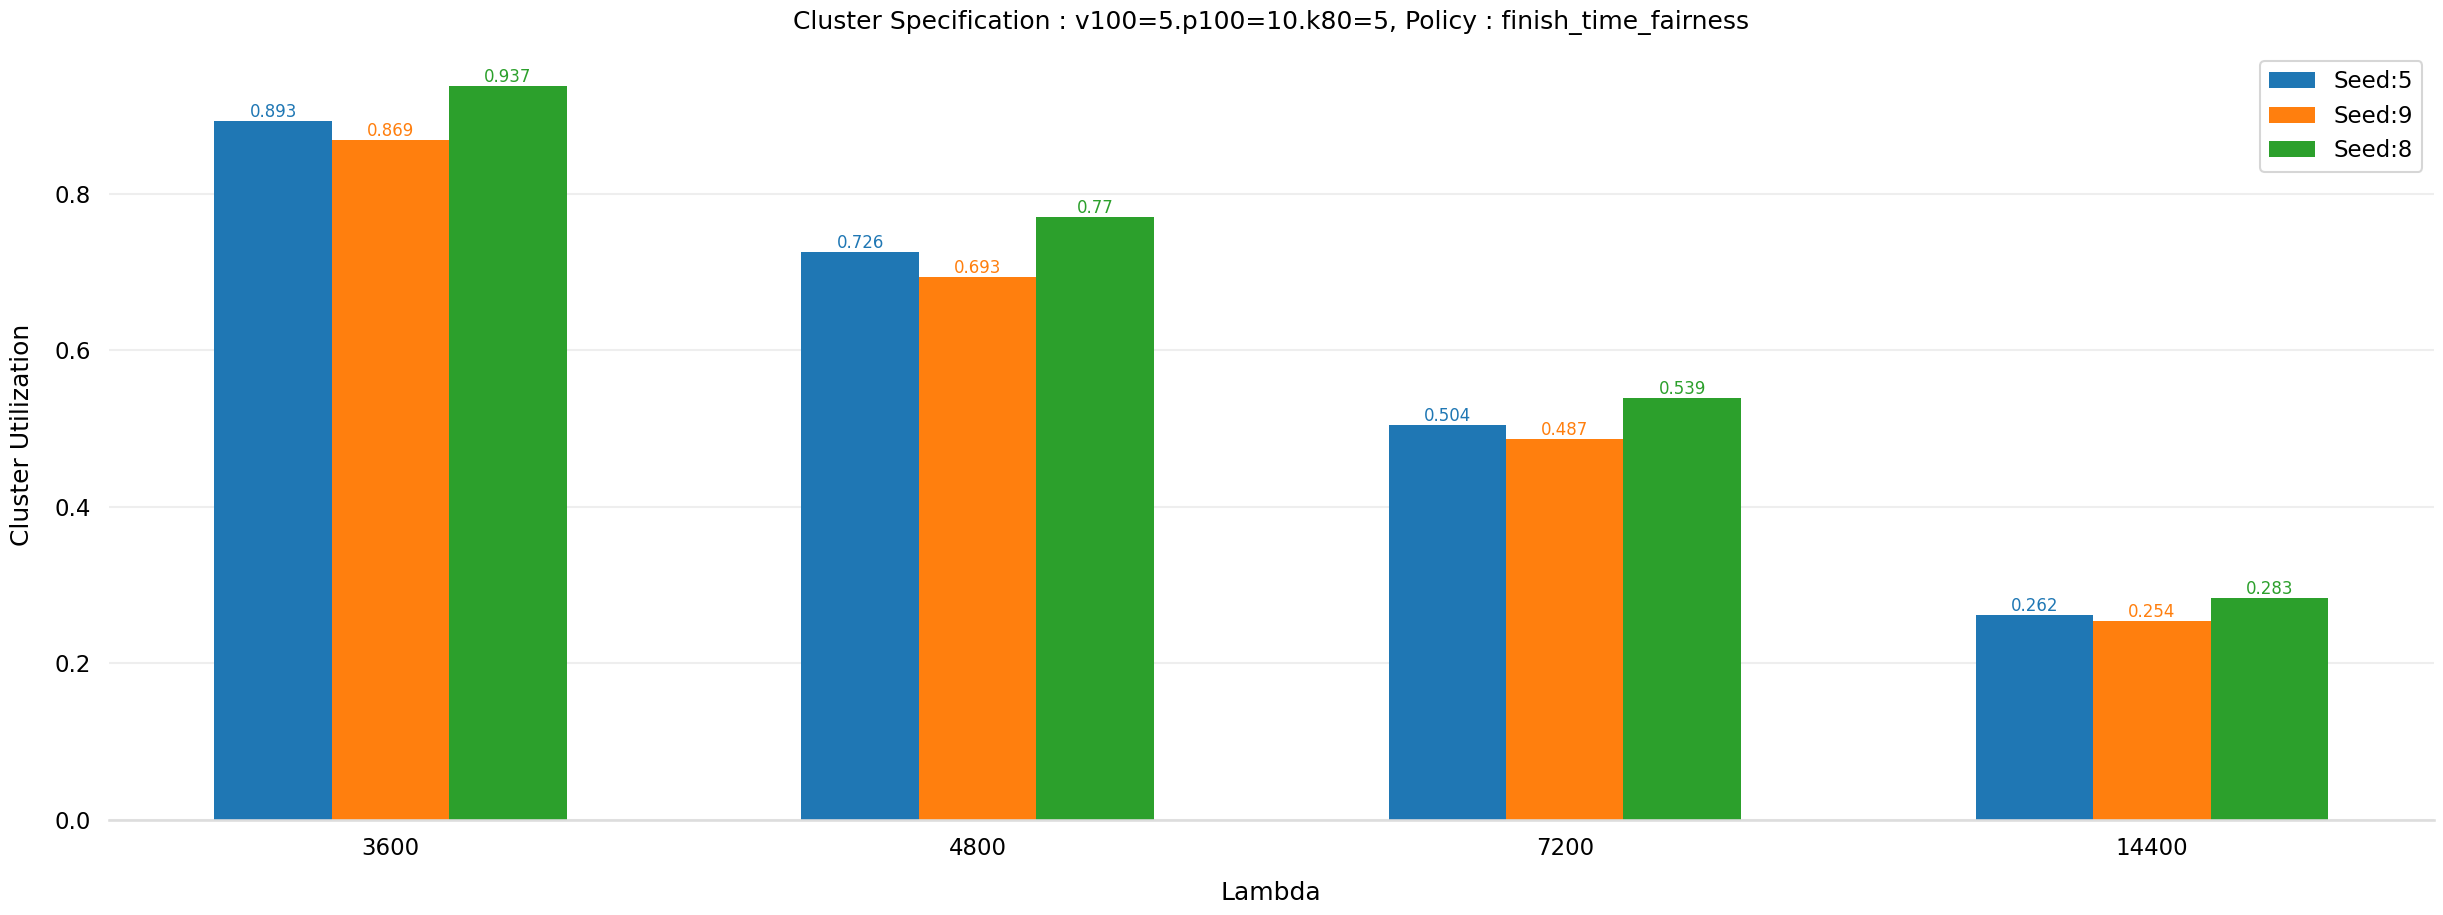

In [16]:
for cluster_spec in df_continuous["cluster_spec"].unique():
    for policy in df_continuous["policy"].unique():
        result_int = df_continuous.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("lambda")            

            x = np.arange(len(result["lambda"].unique()))
            y = [float(r) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["lambda"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Lambda', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

how does average completition time vary with lambda

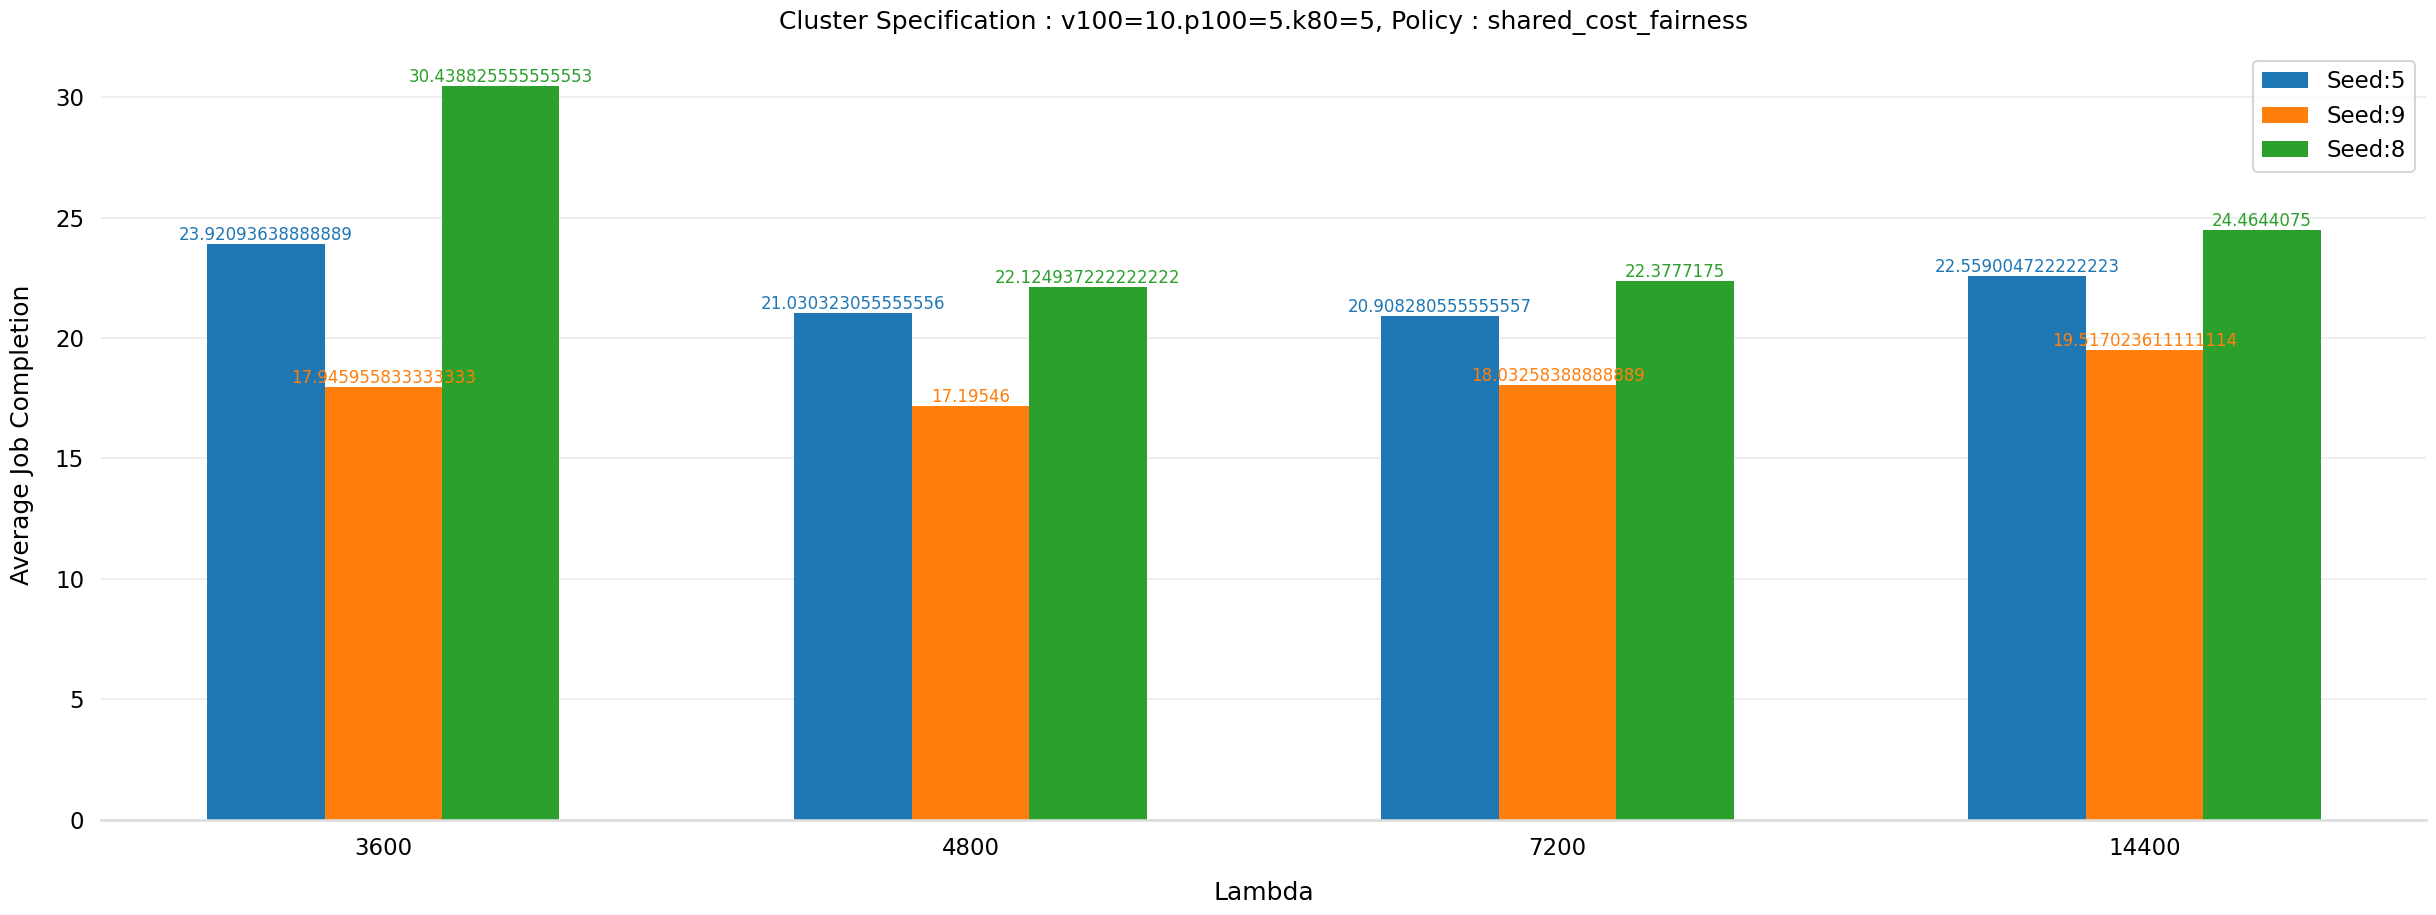

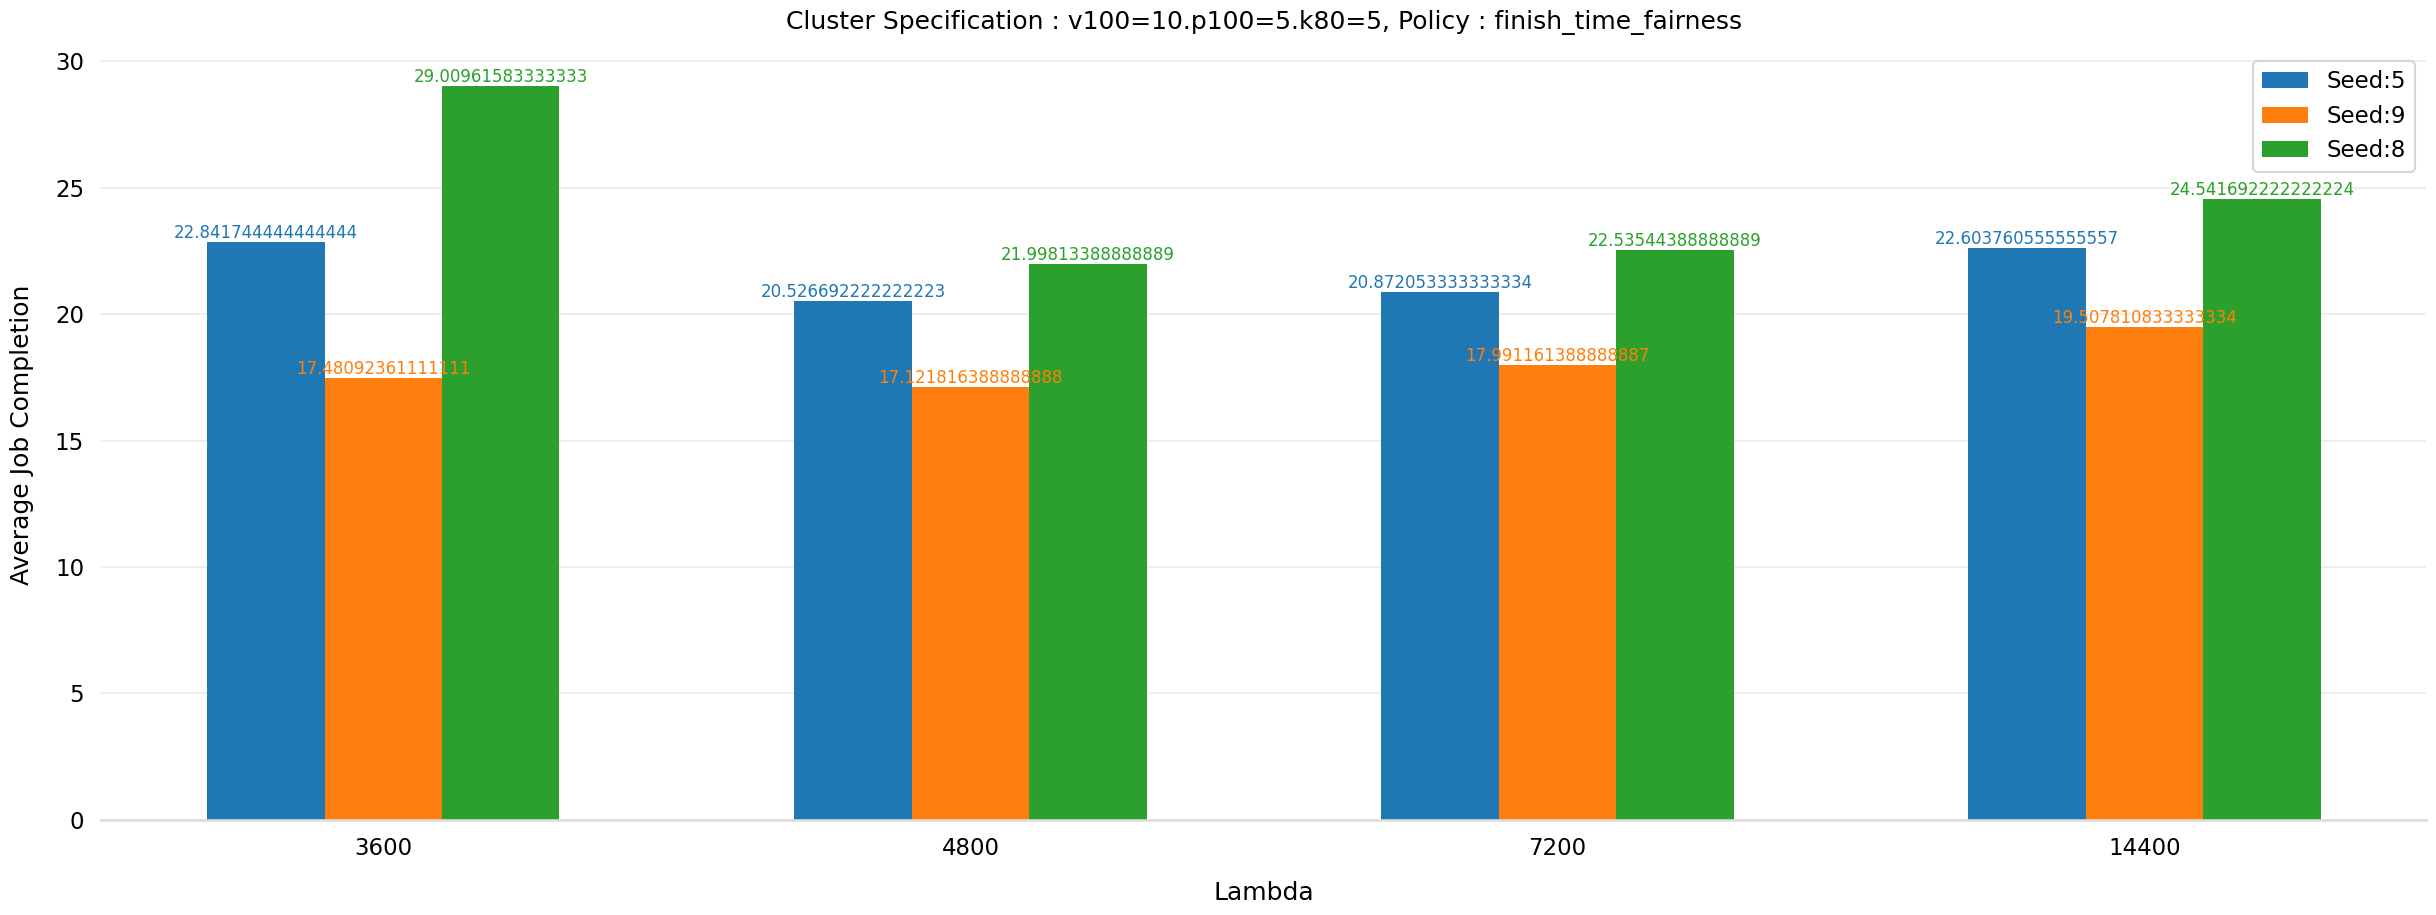

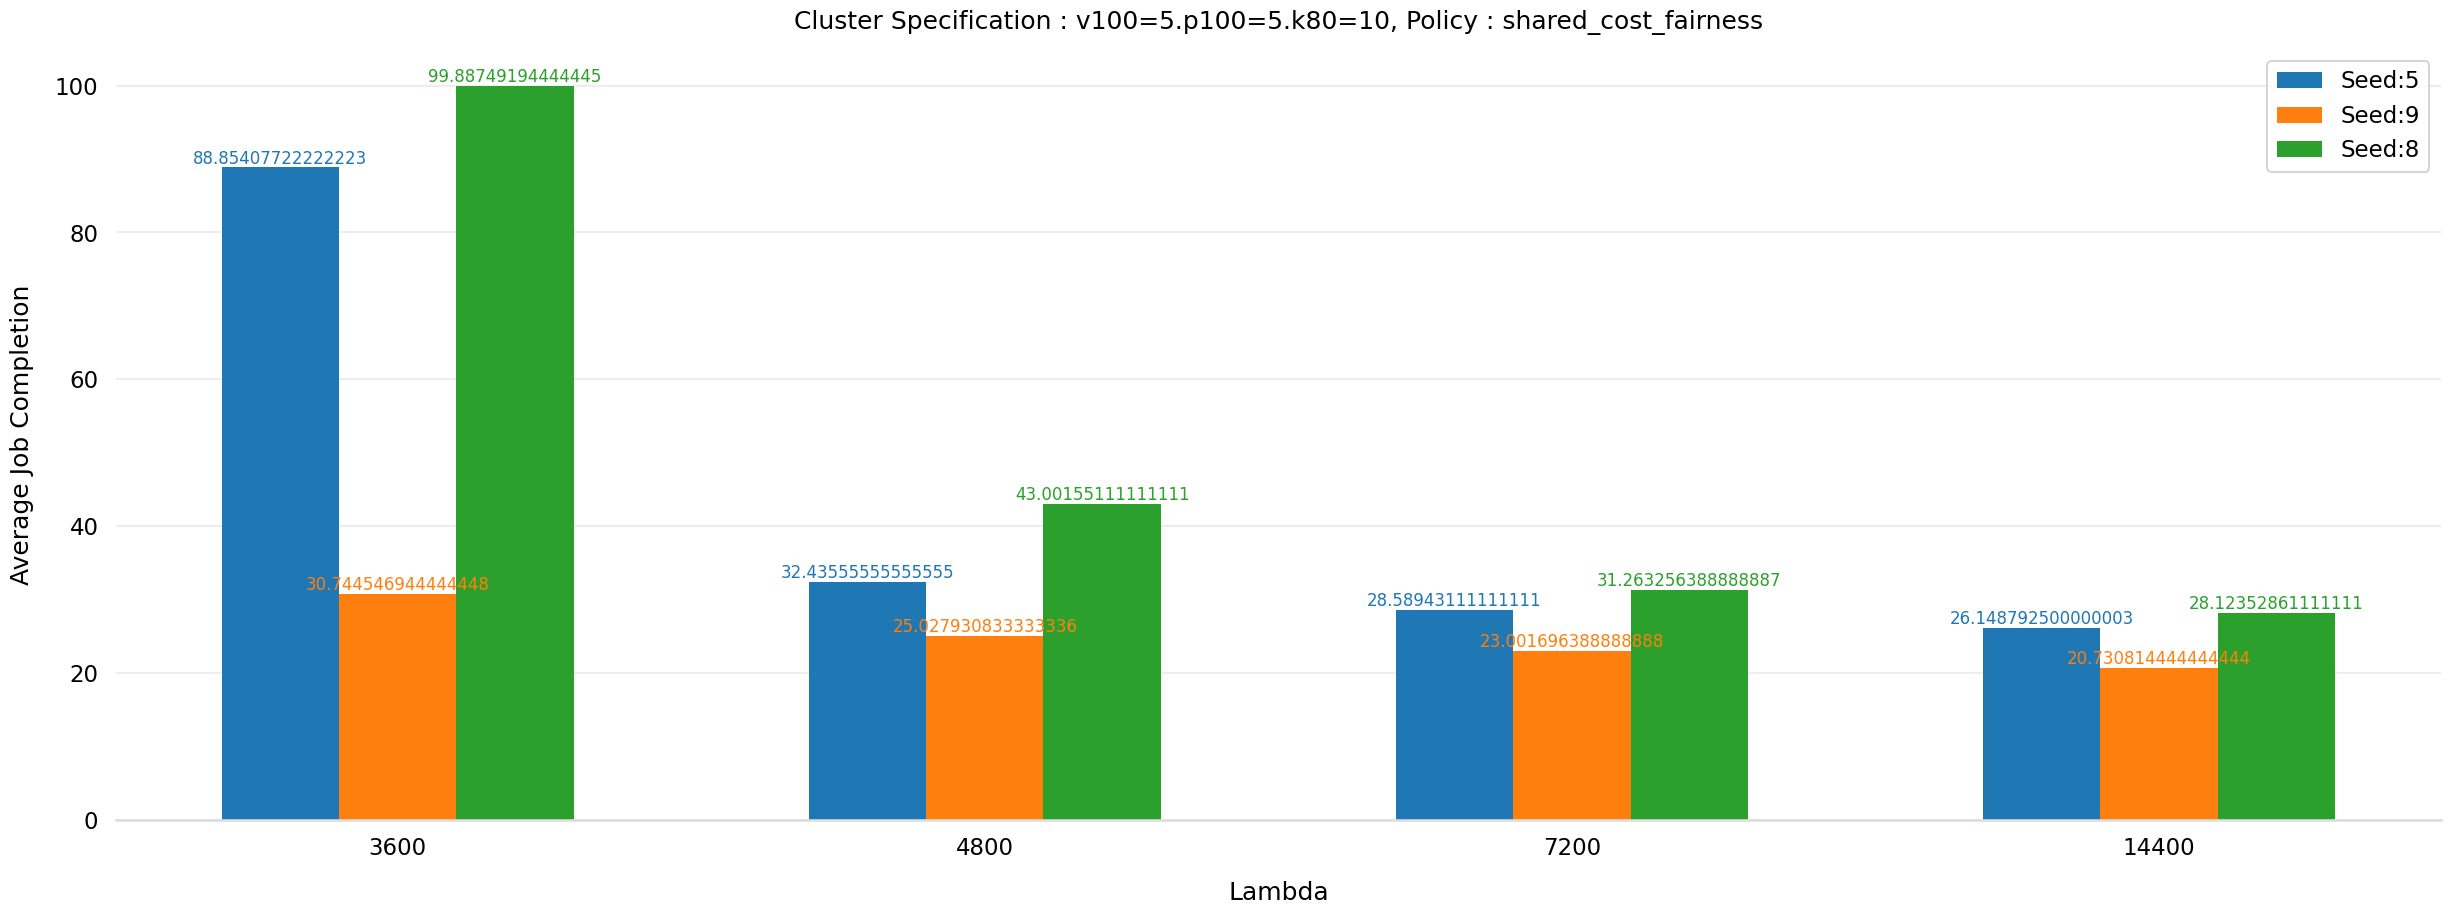

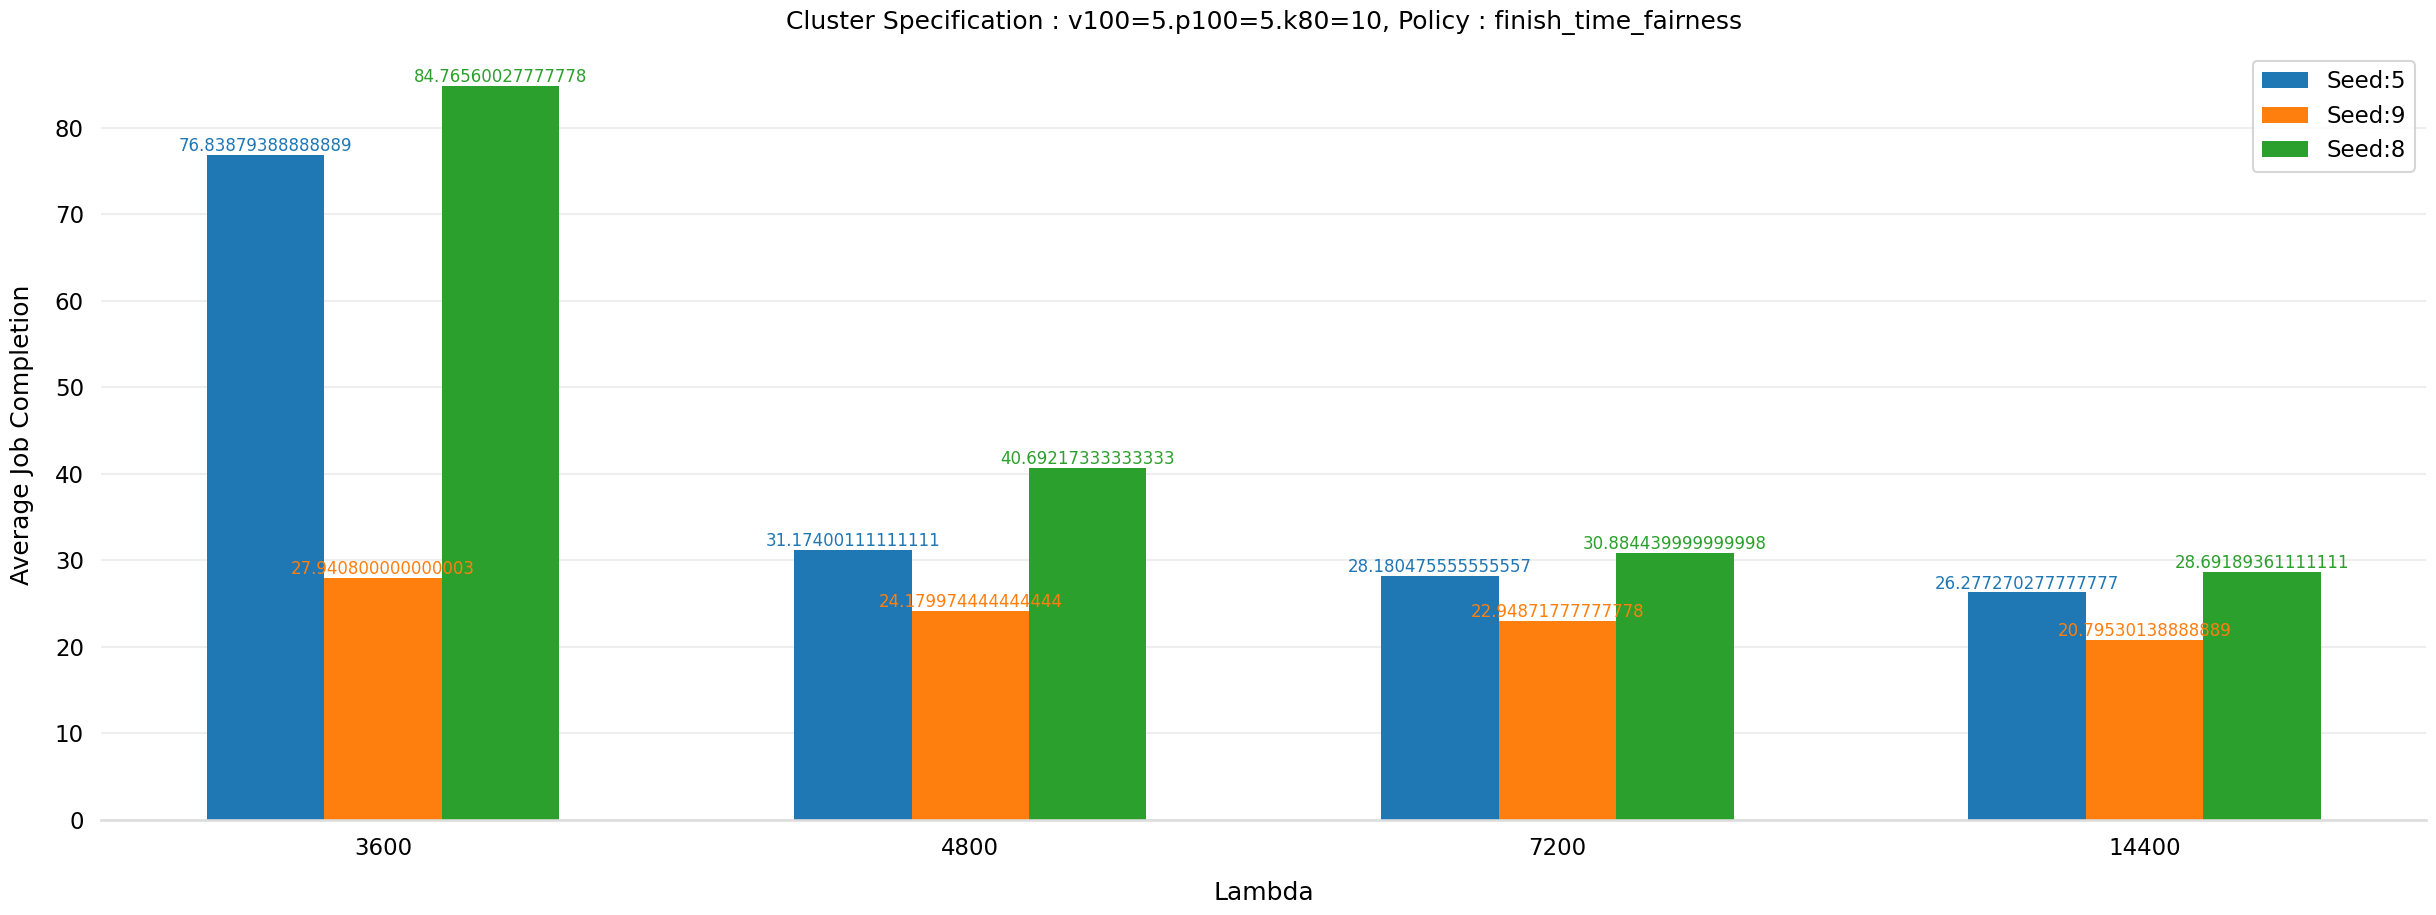

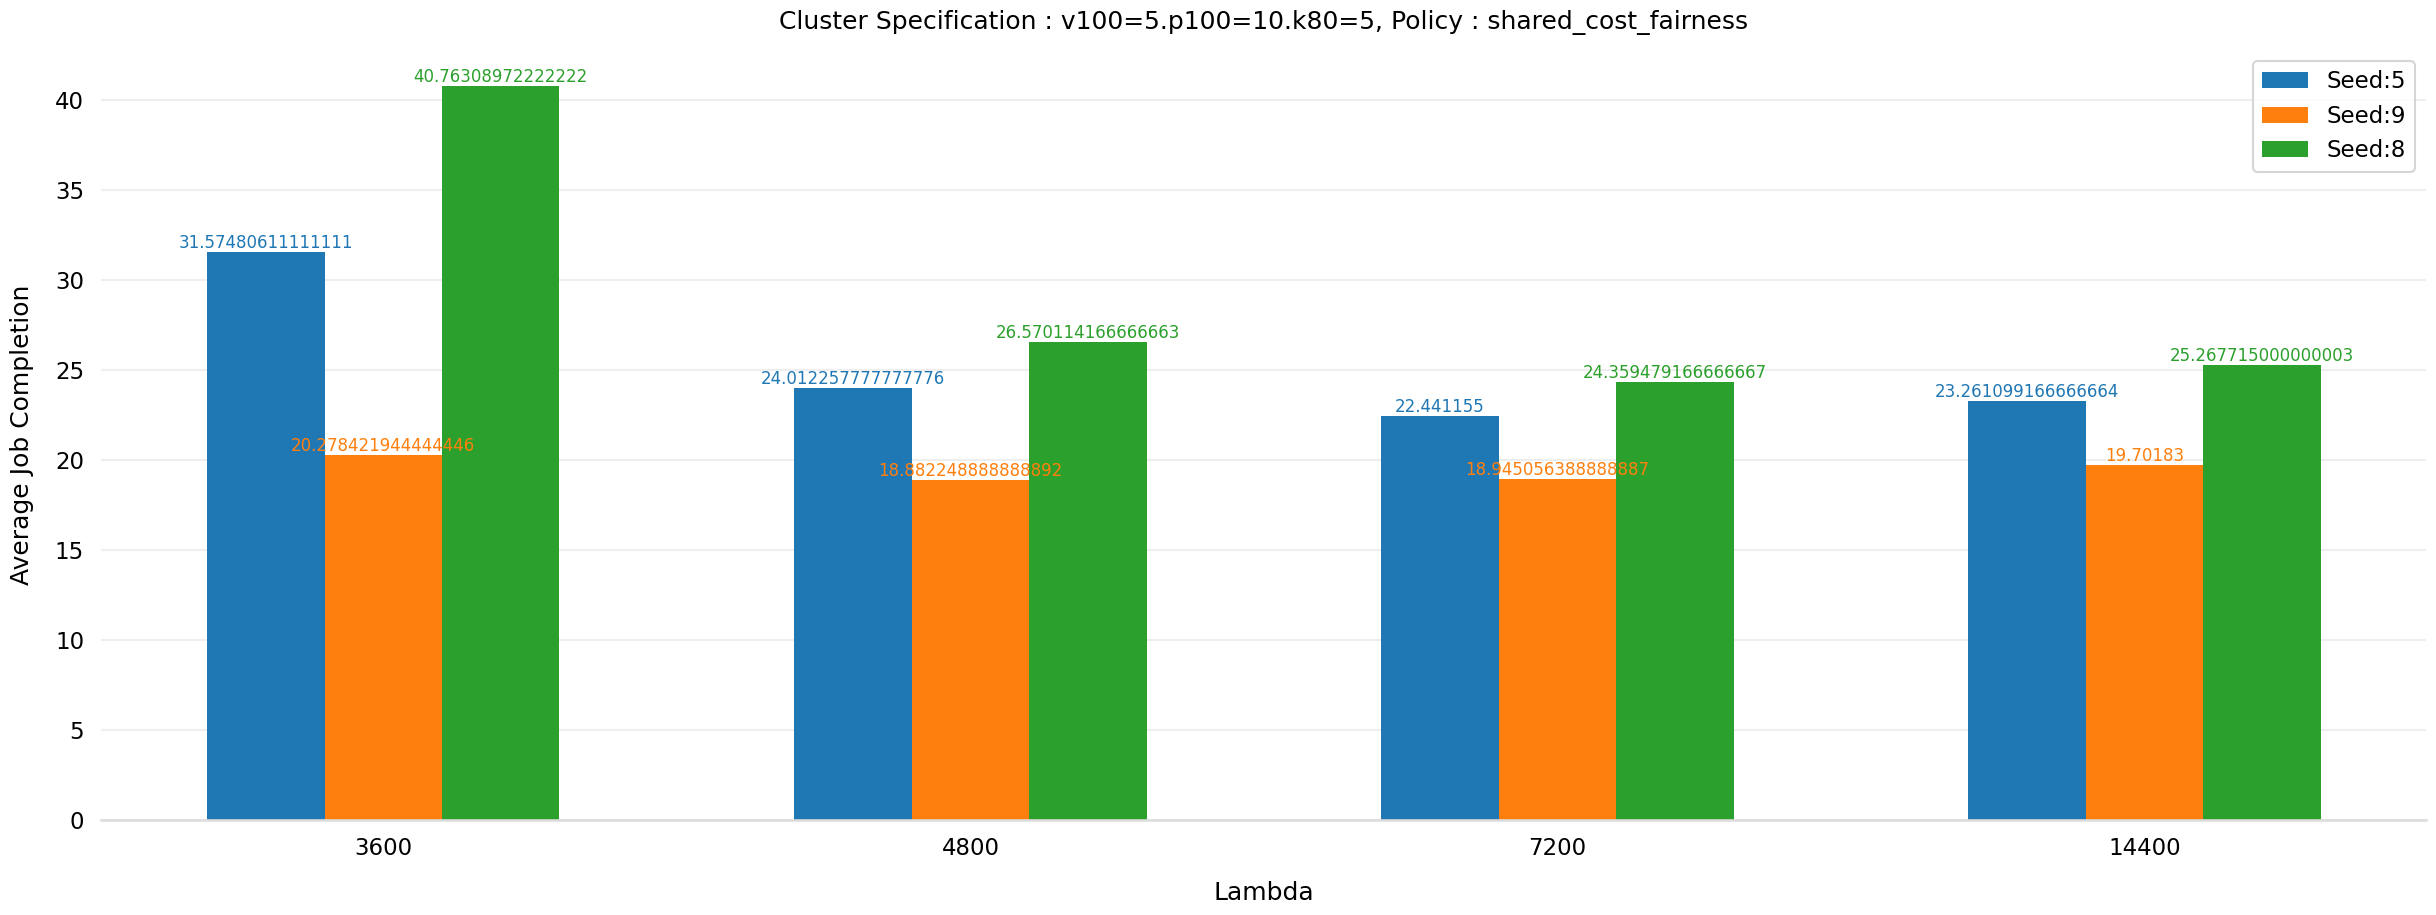

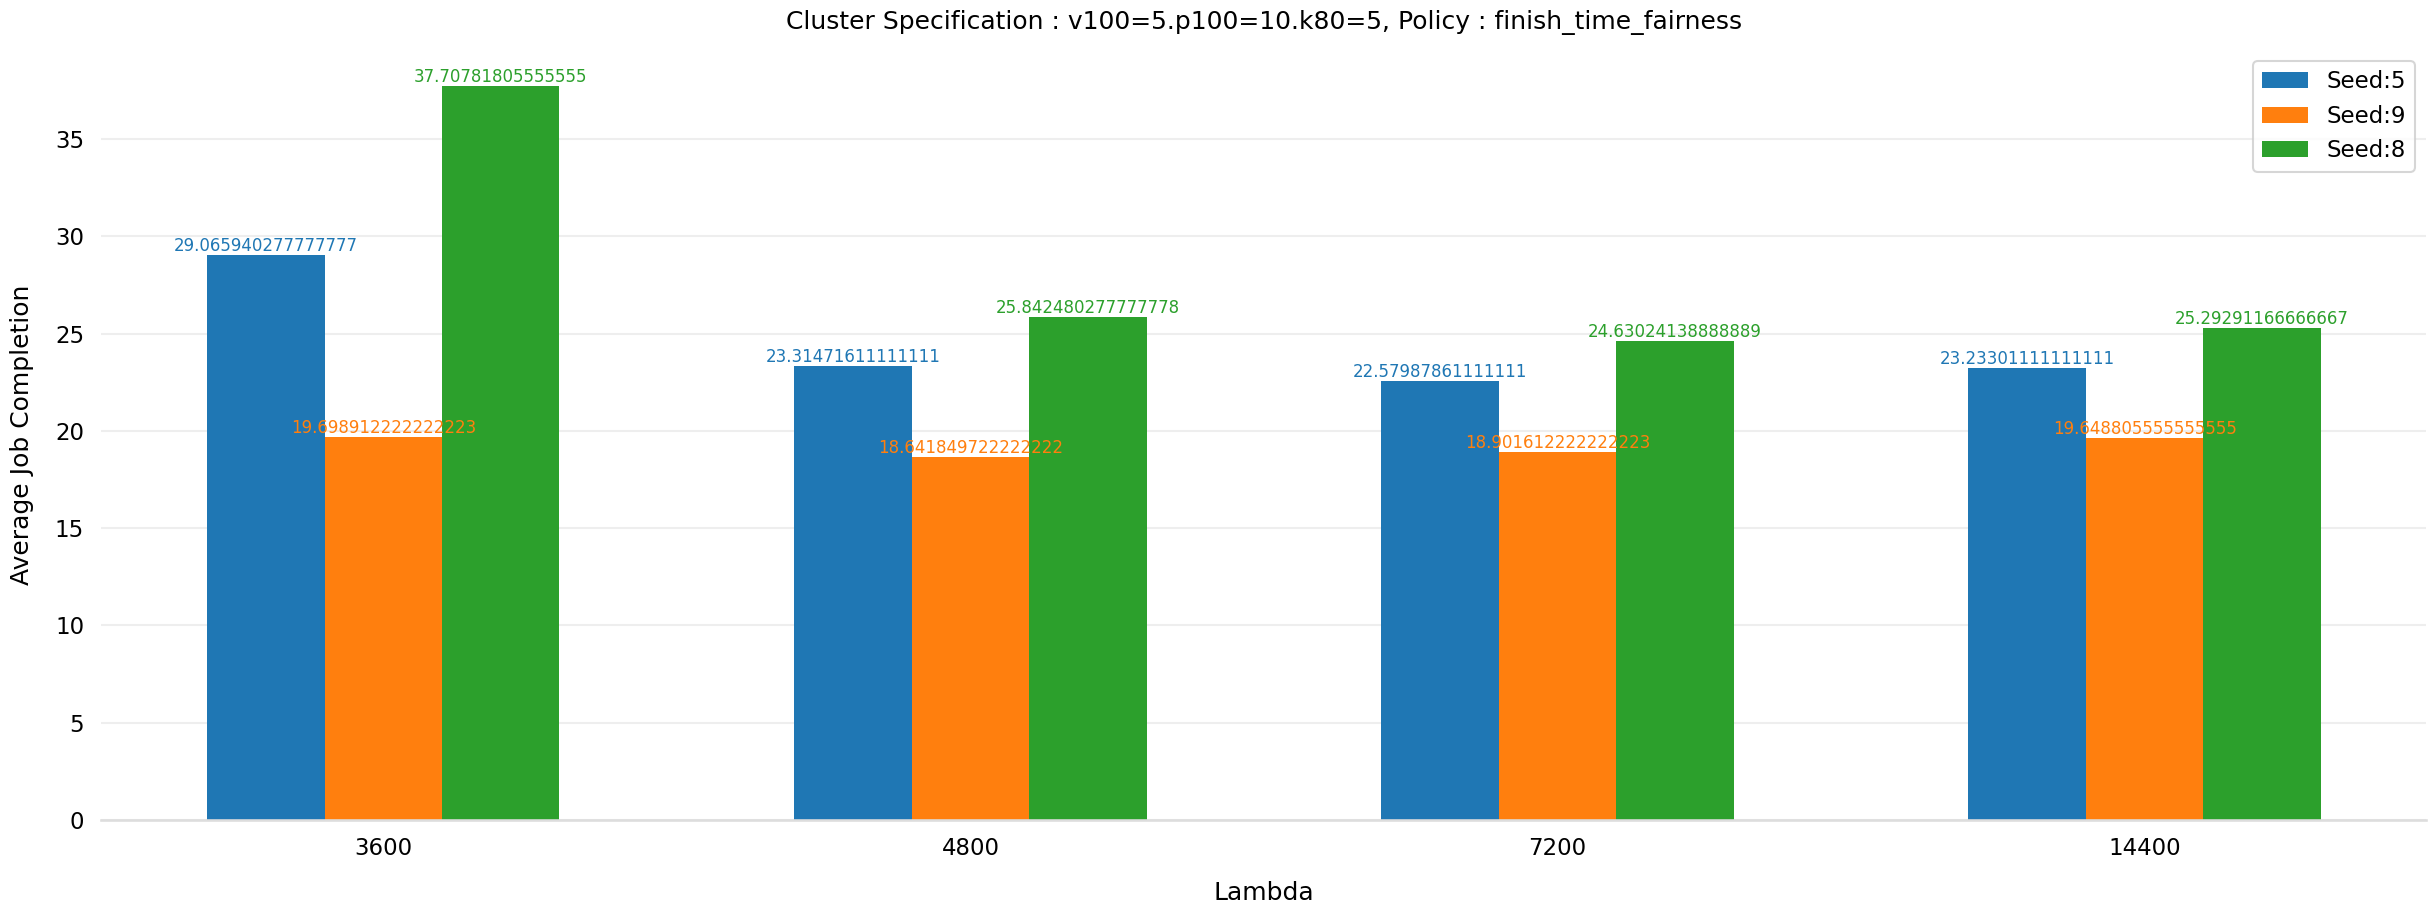

In [17]:
for cluster_spec in df_continuous["cluster_spec"].unique():
    for policy in df_continuous["policy"].unique():
        result_int = df_continuous.query(f'cluster_spec == "{cluster_spec}" & policy == "{policy}"')
        
        no_graphs = len(result_int["seed"].unique())
        
        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.2
        
        for idx, seed in enumerate(result_int["seed"].unique()):
            result = result_int.query(f'seed == {seed}')
            result = result.sort_values("lambda")            

            x = np.arange(len(result["lambda"].unique()))
            y = [(float(r.strip().split(" ")[0])/3600.0) for r in result["average_completion_time"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'Seed:{seed}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["lambda"].unique())

        ax.legend(loc ="upper right")

        ax.set_xlabel('Lambda', labelpad=15)
        ax.set_ylabel('Average Job Completion', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Policy : {policy}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)

how does utilization vary with total jobs for different policies for each seed

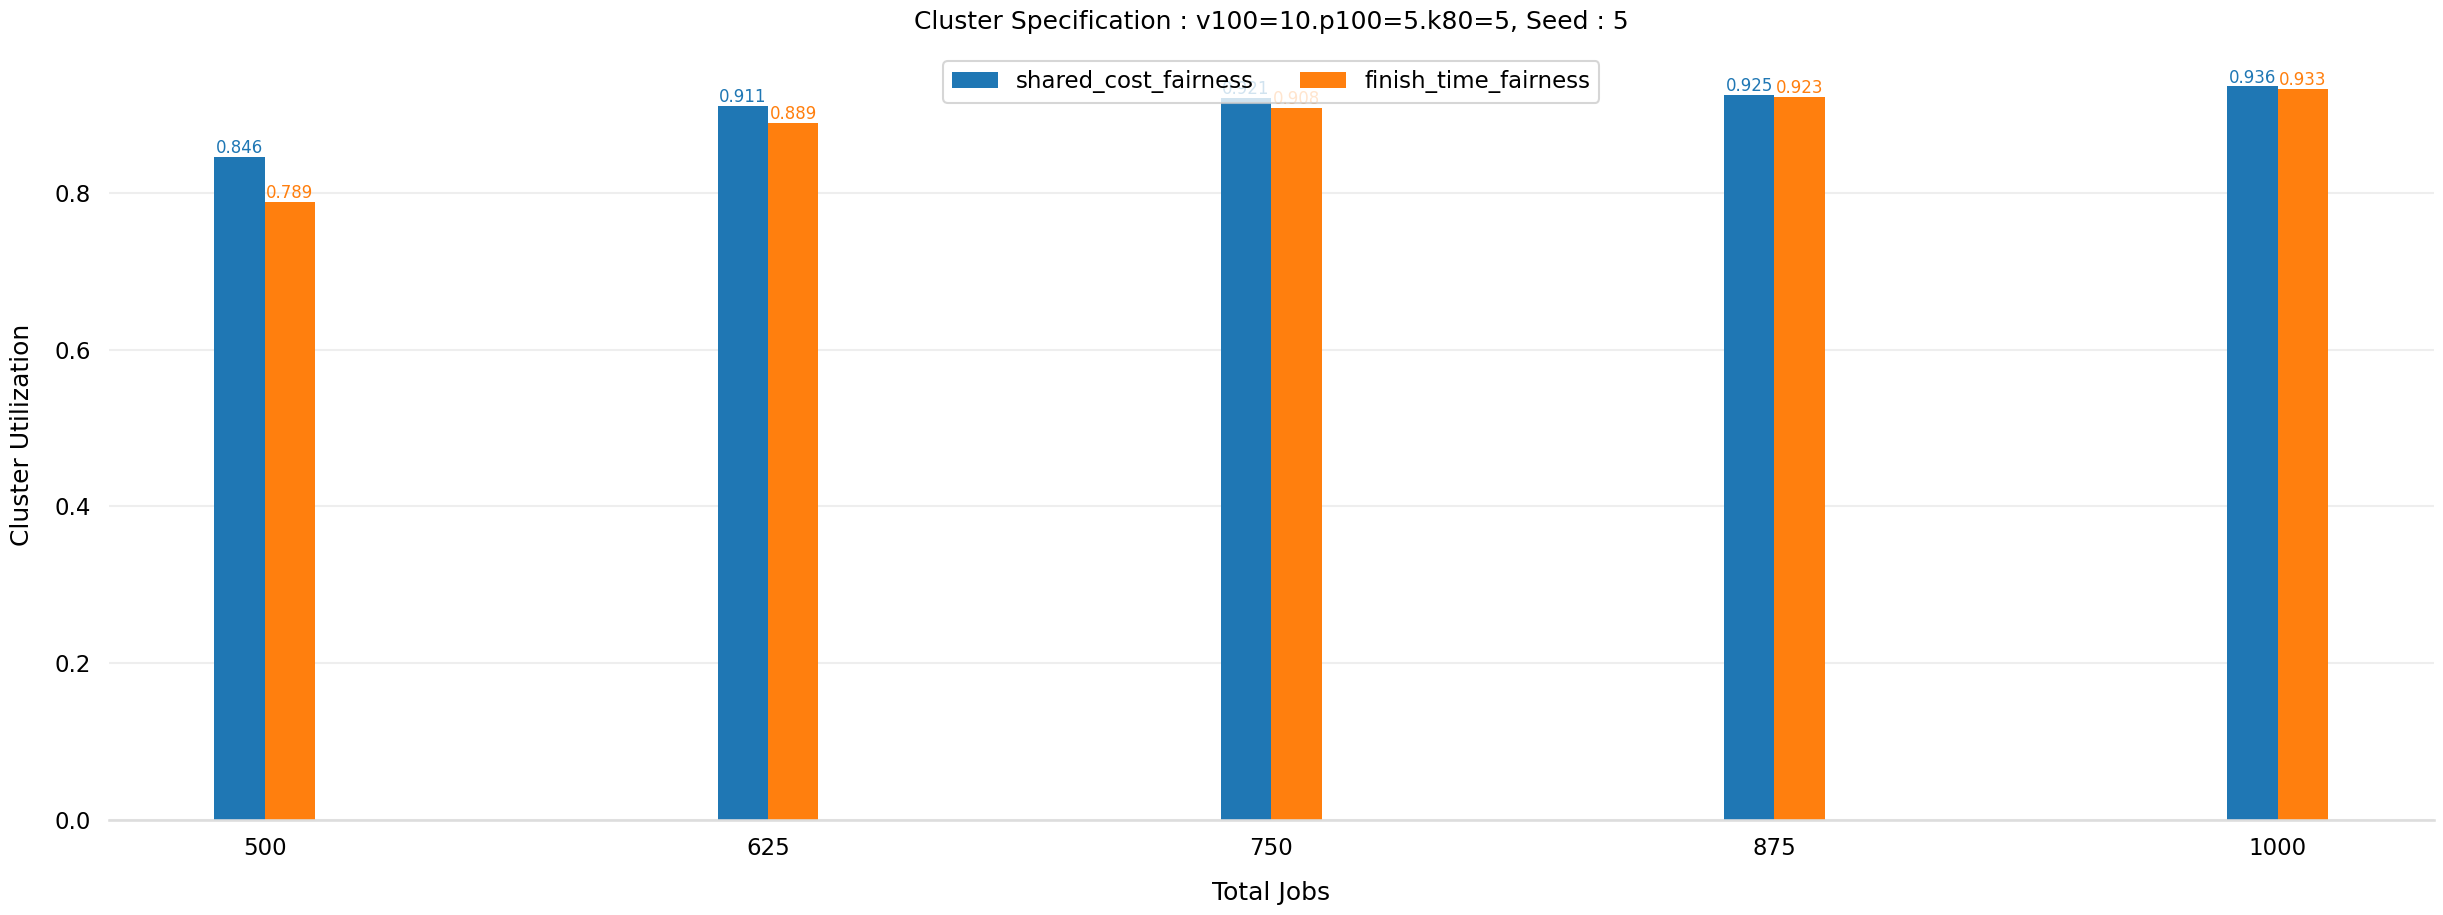

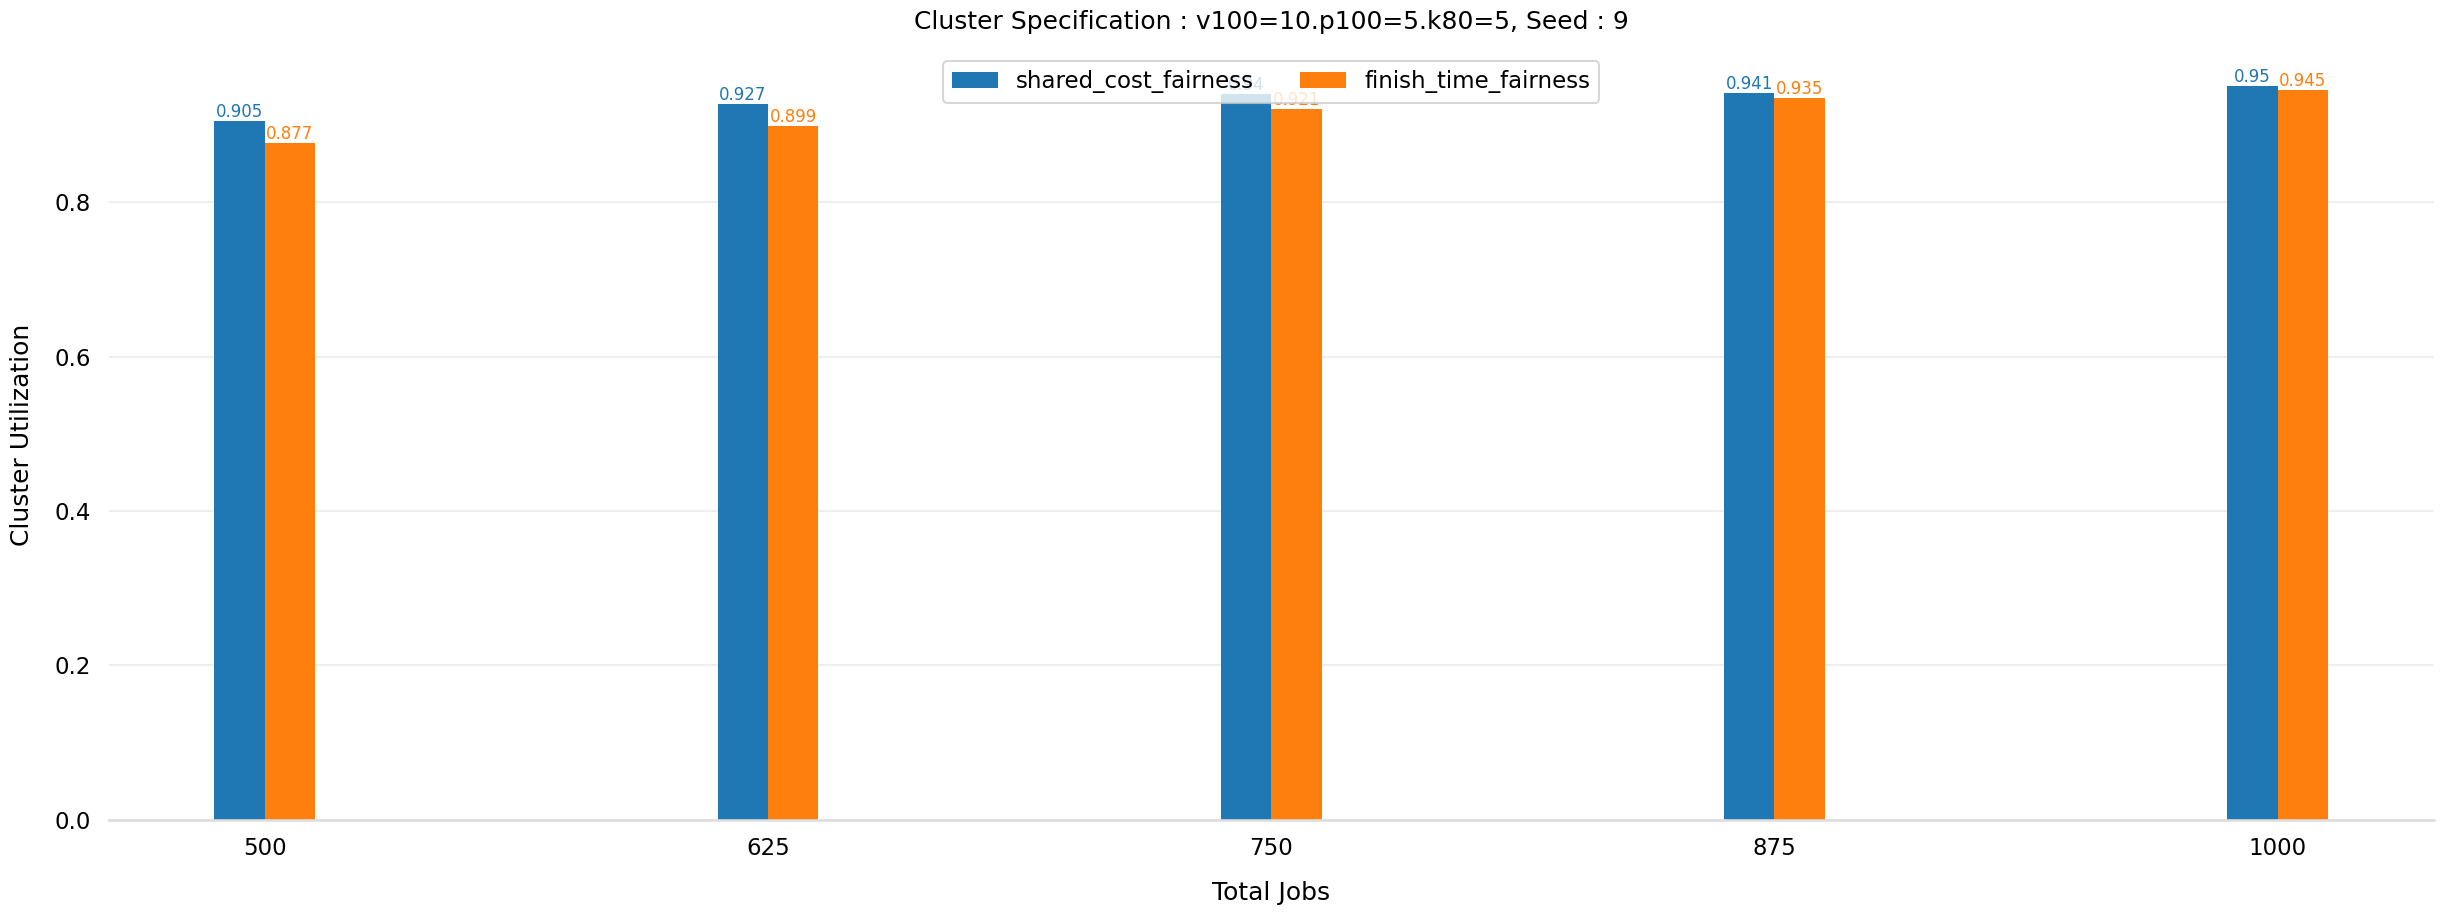

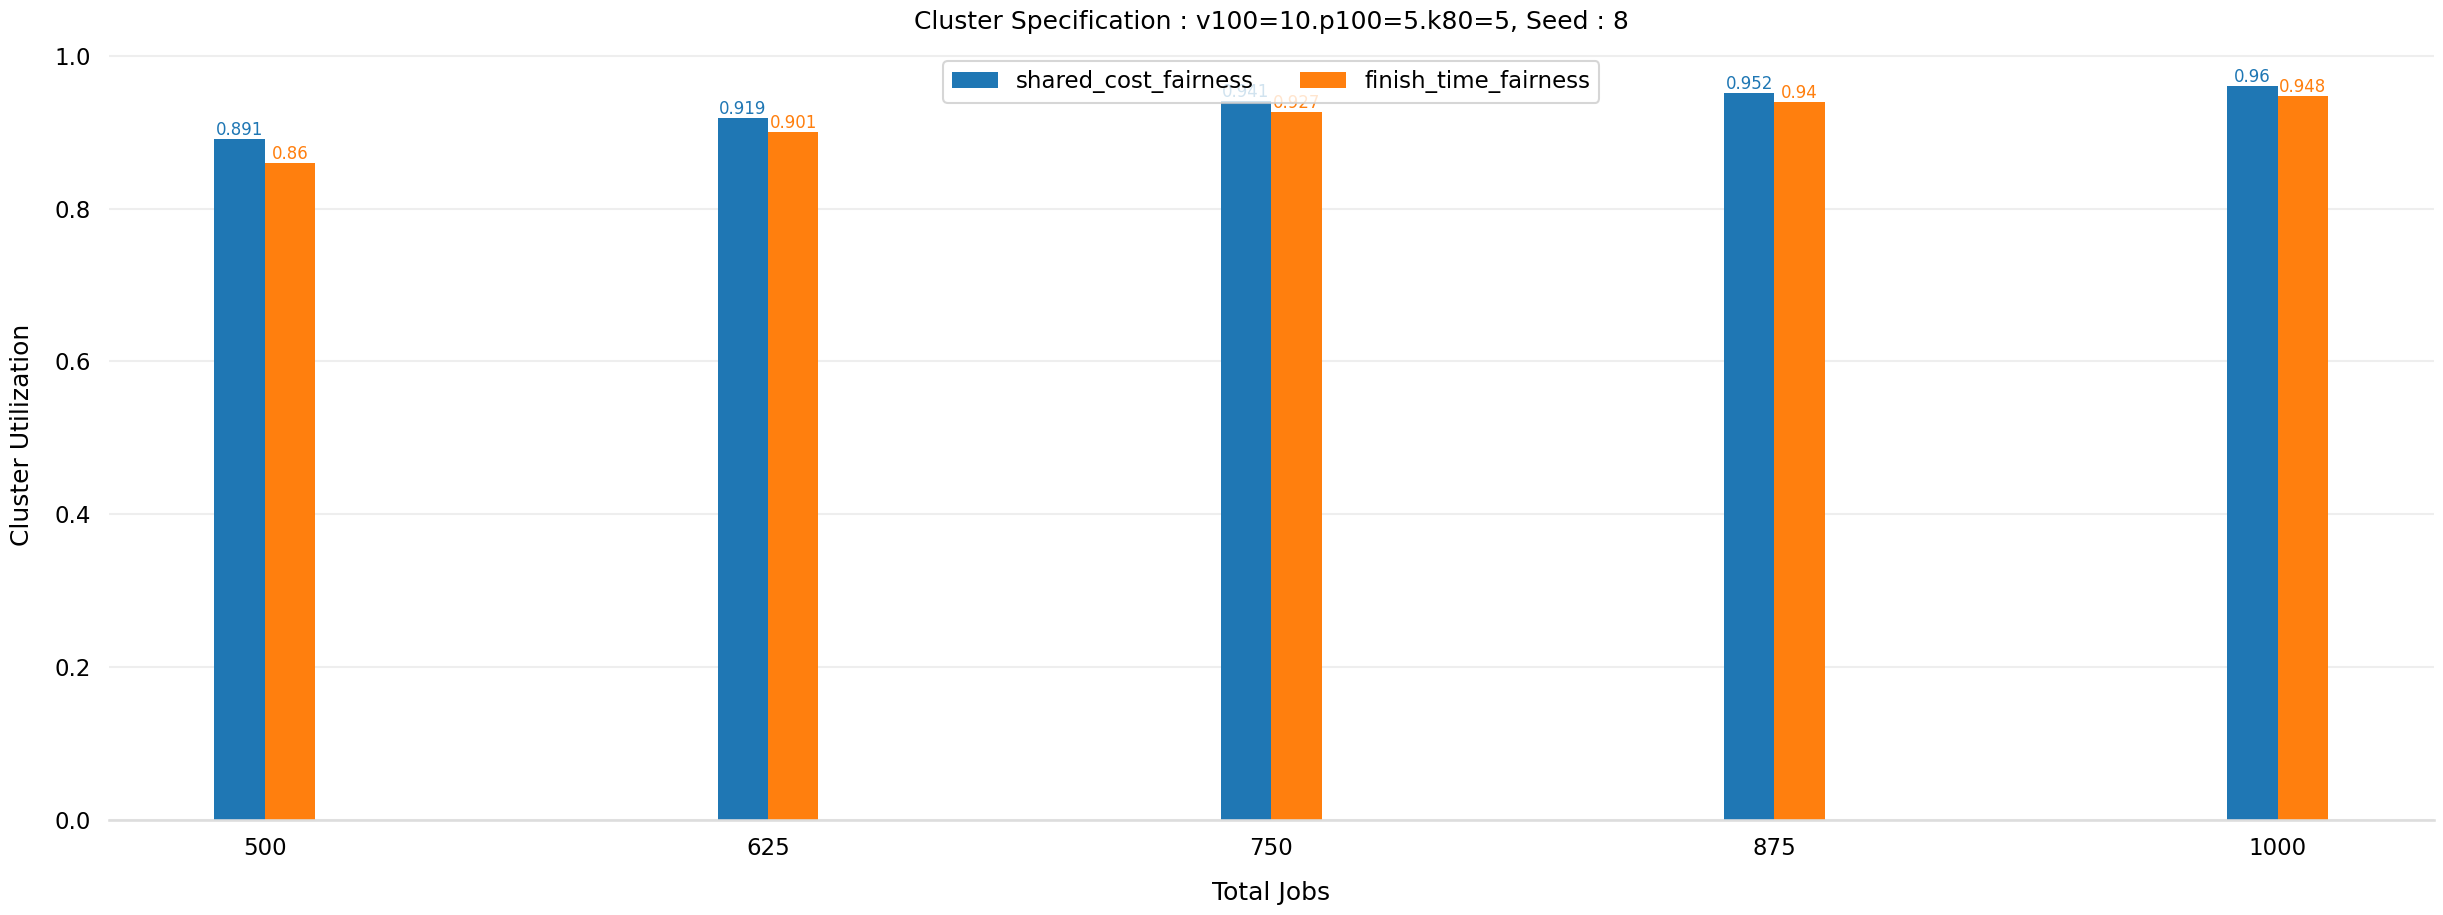

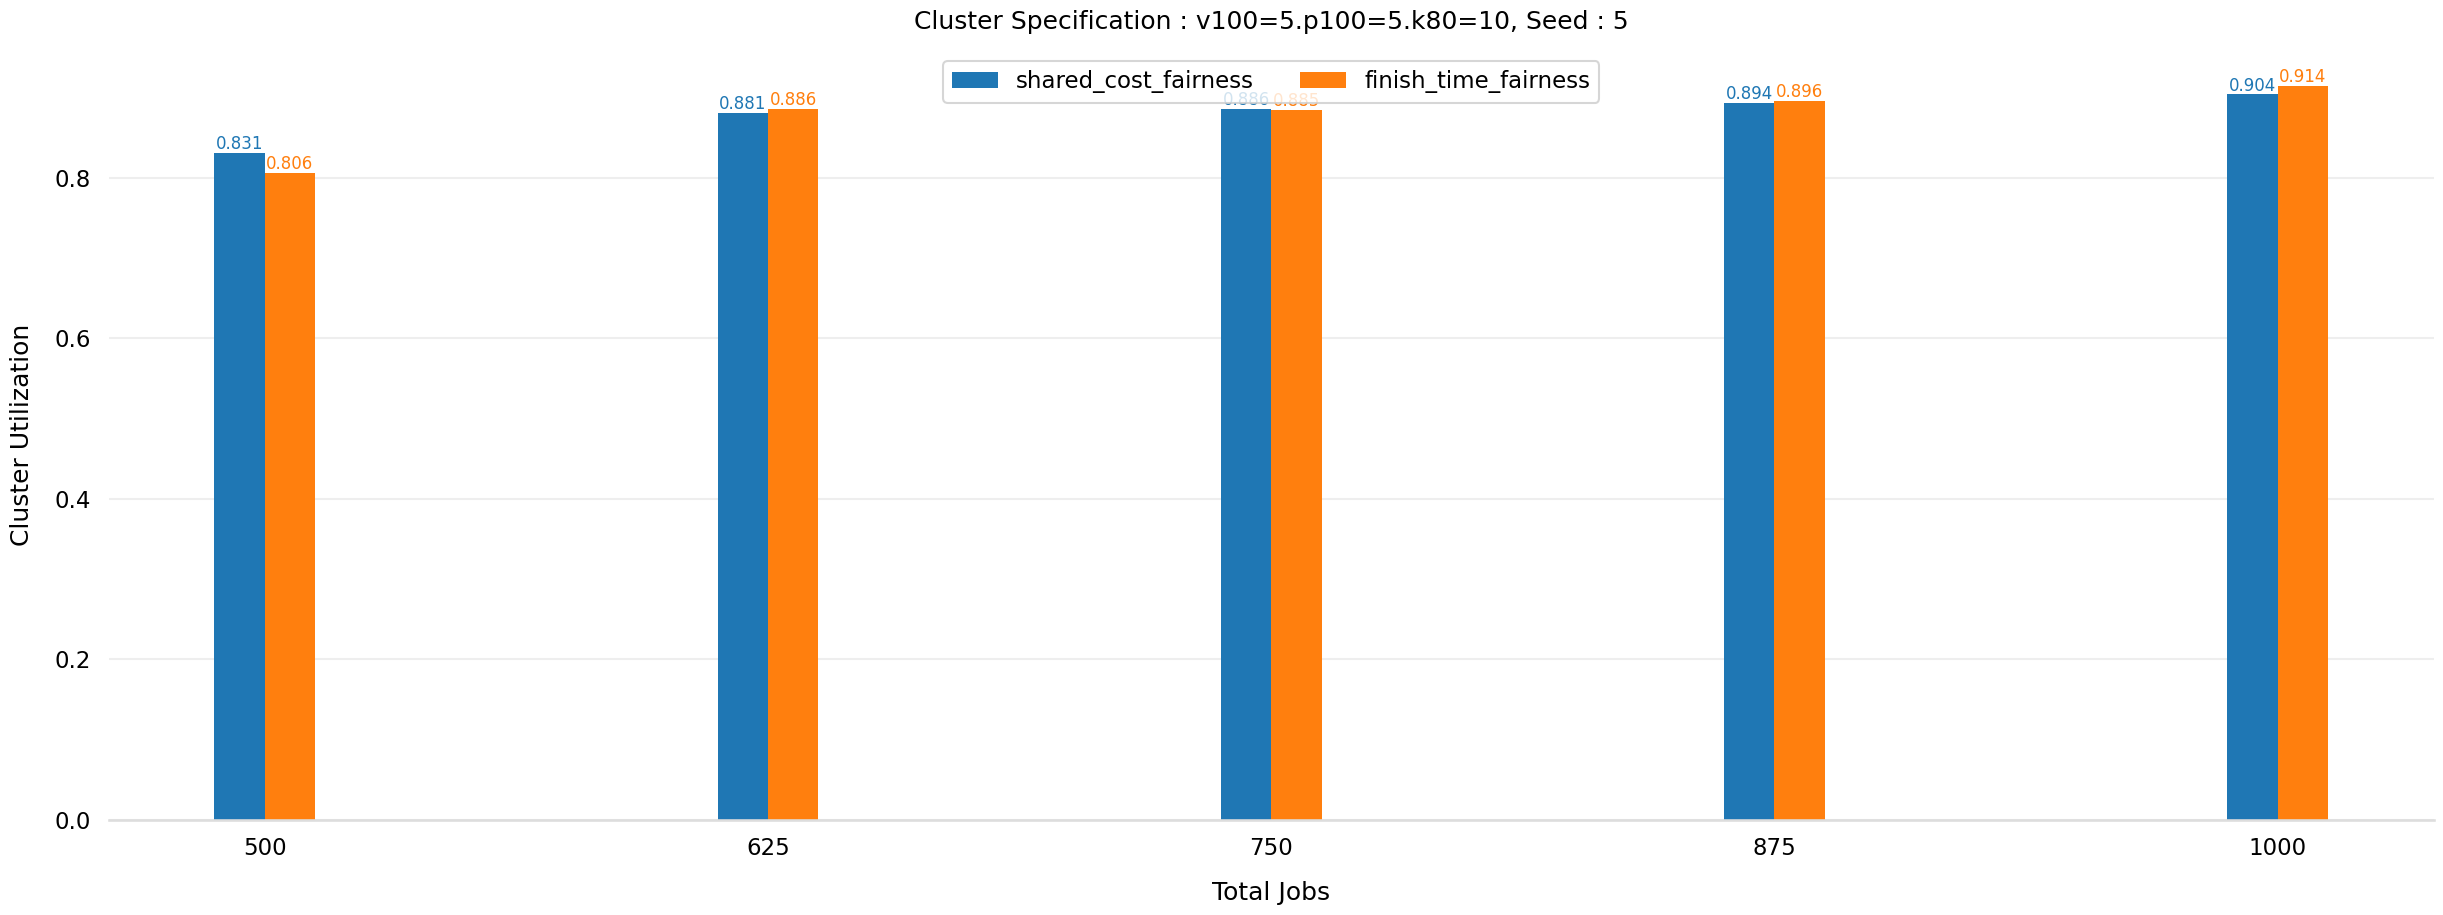

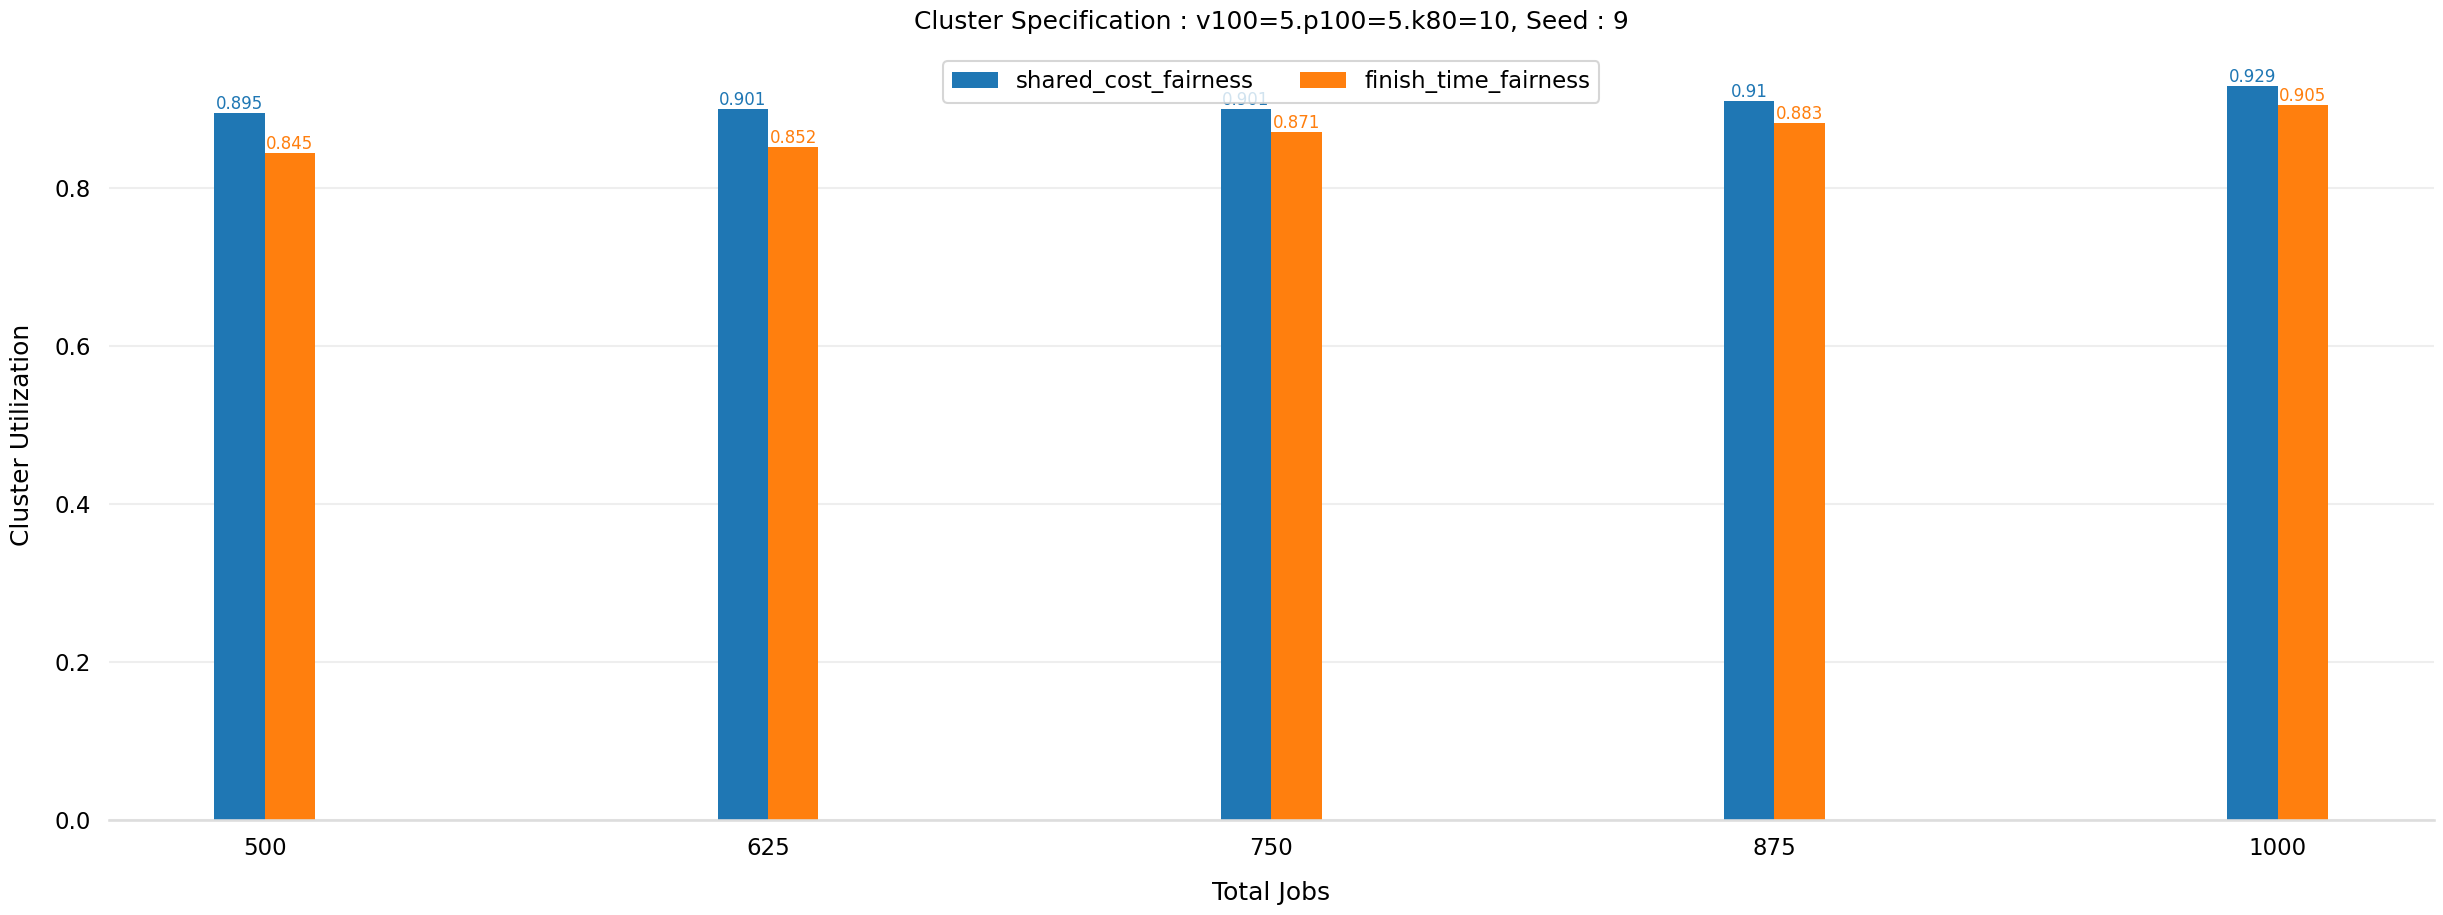

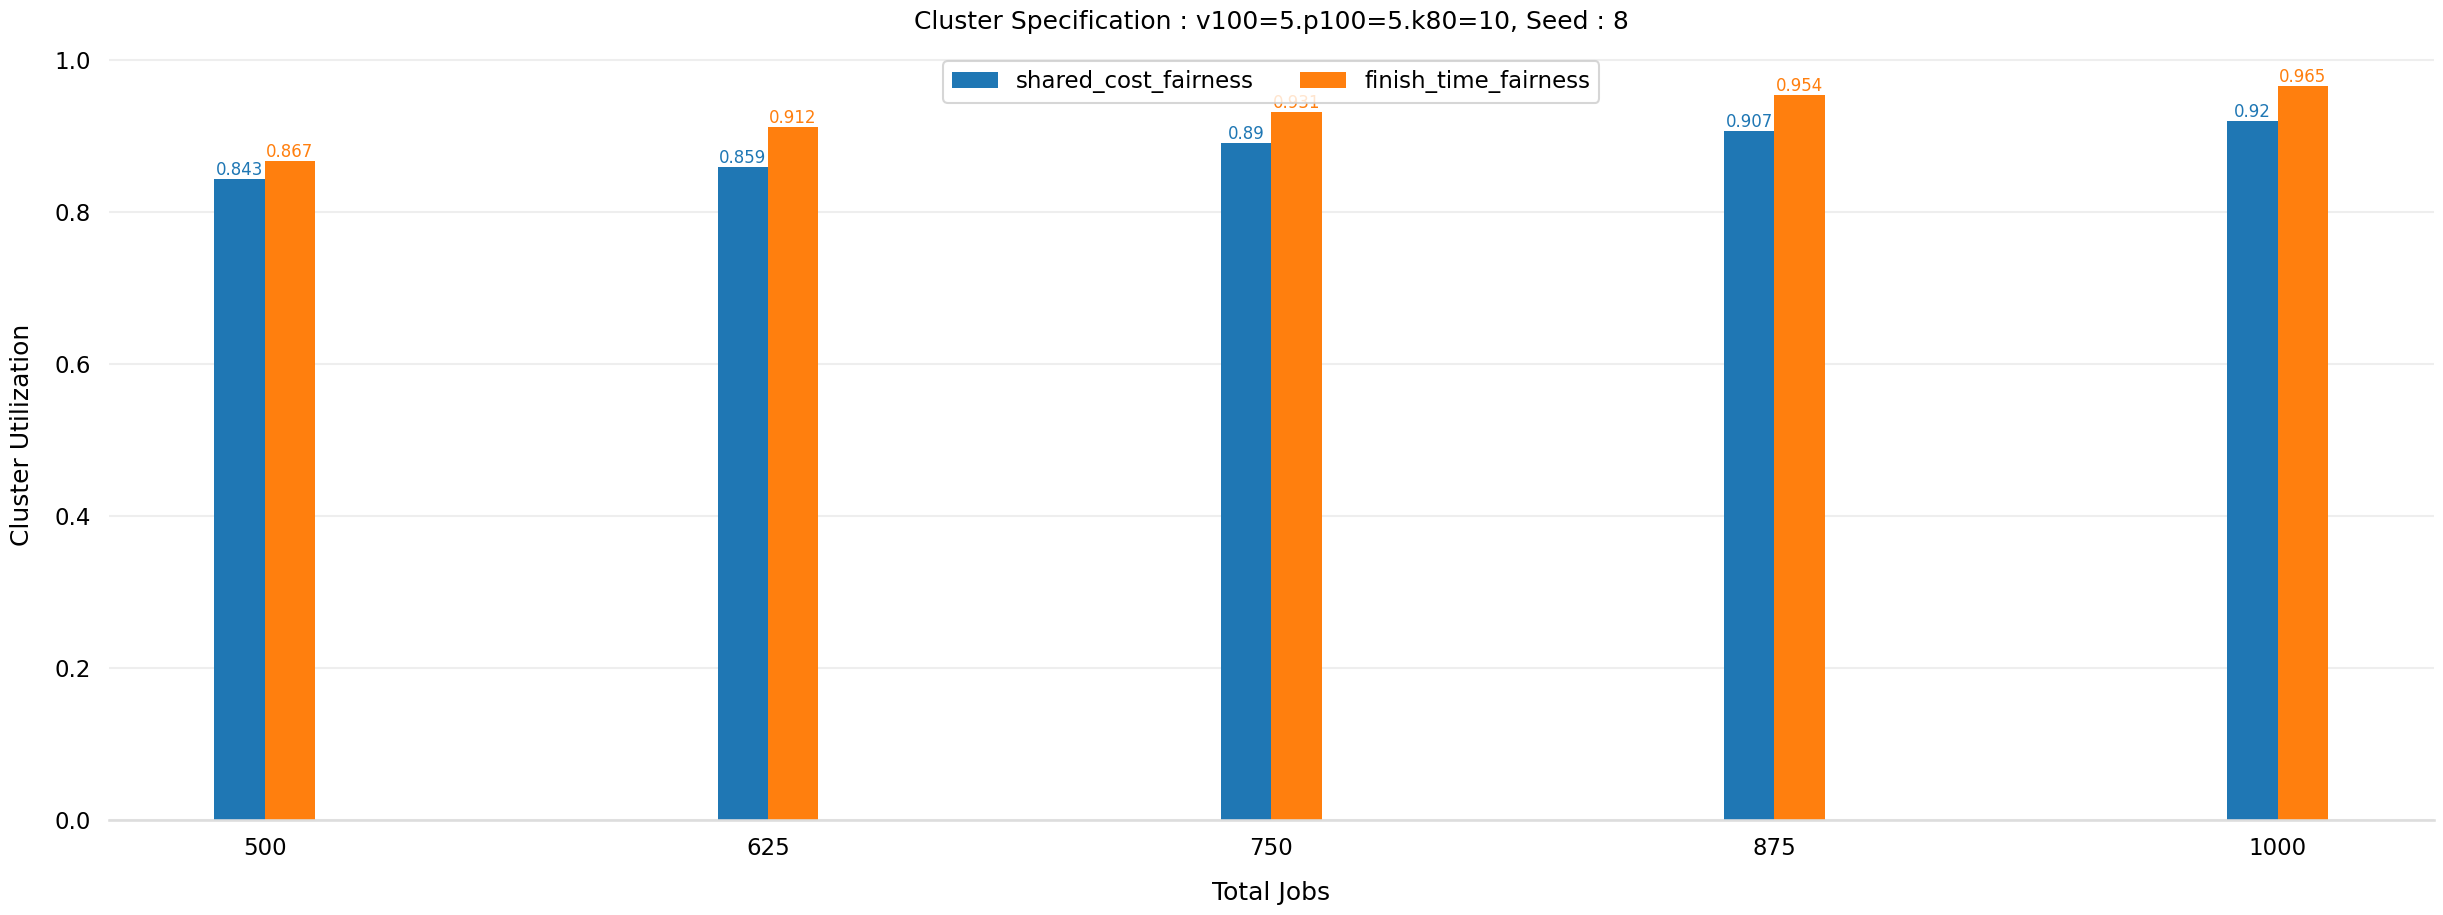

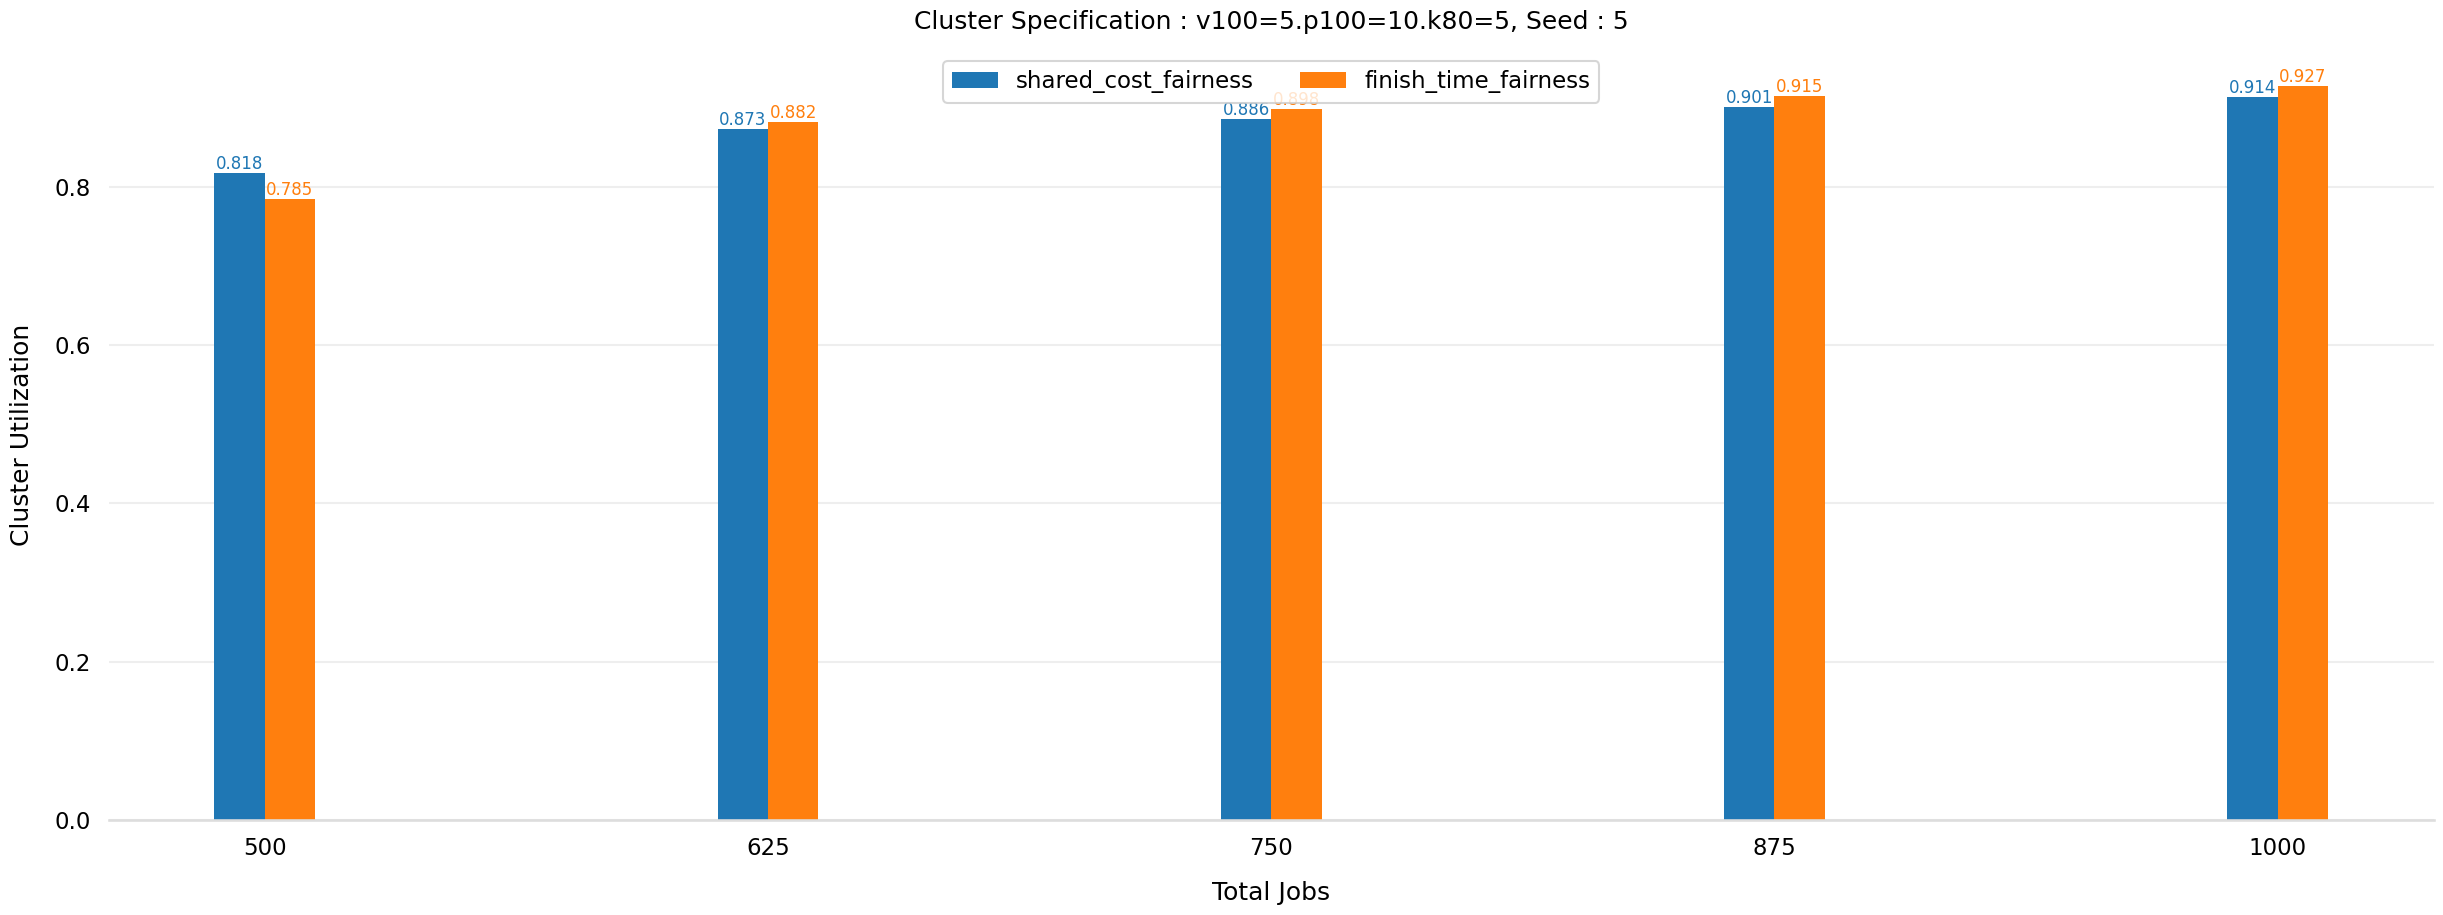

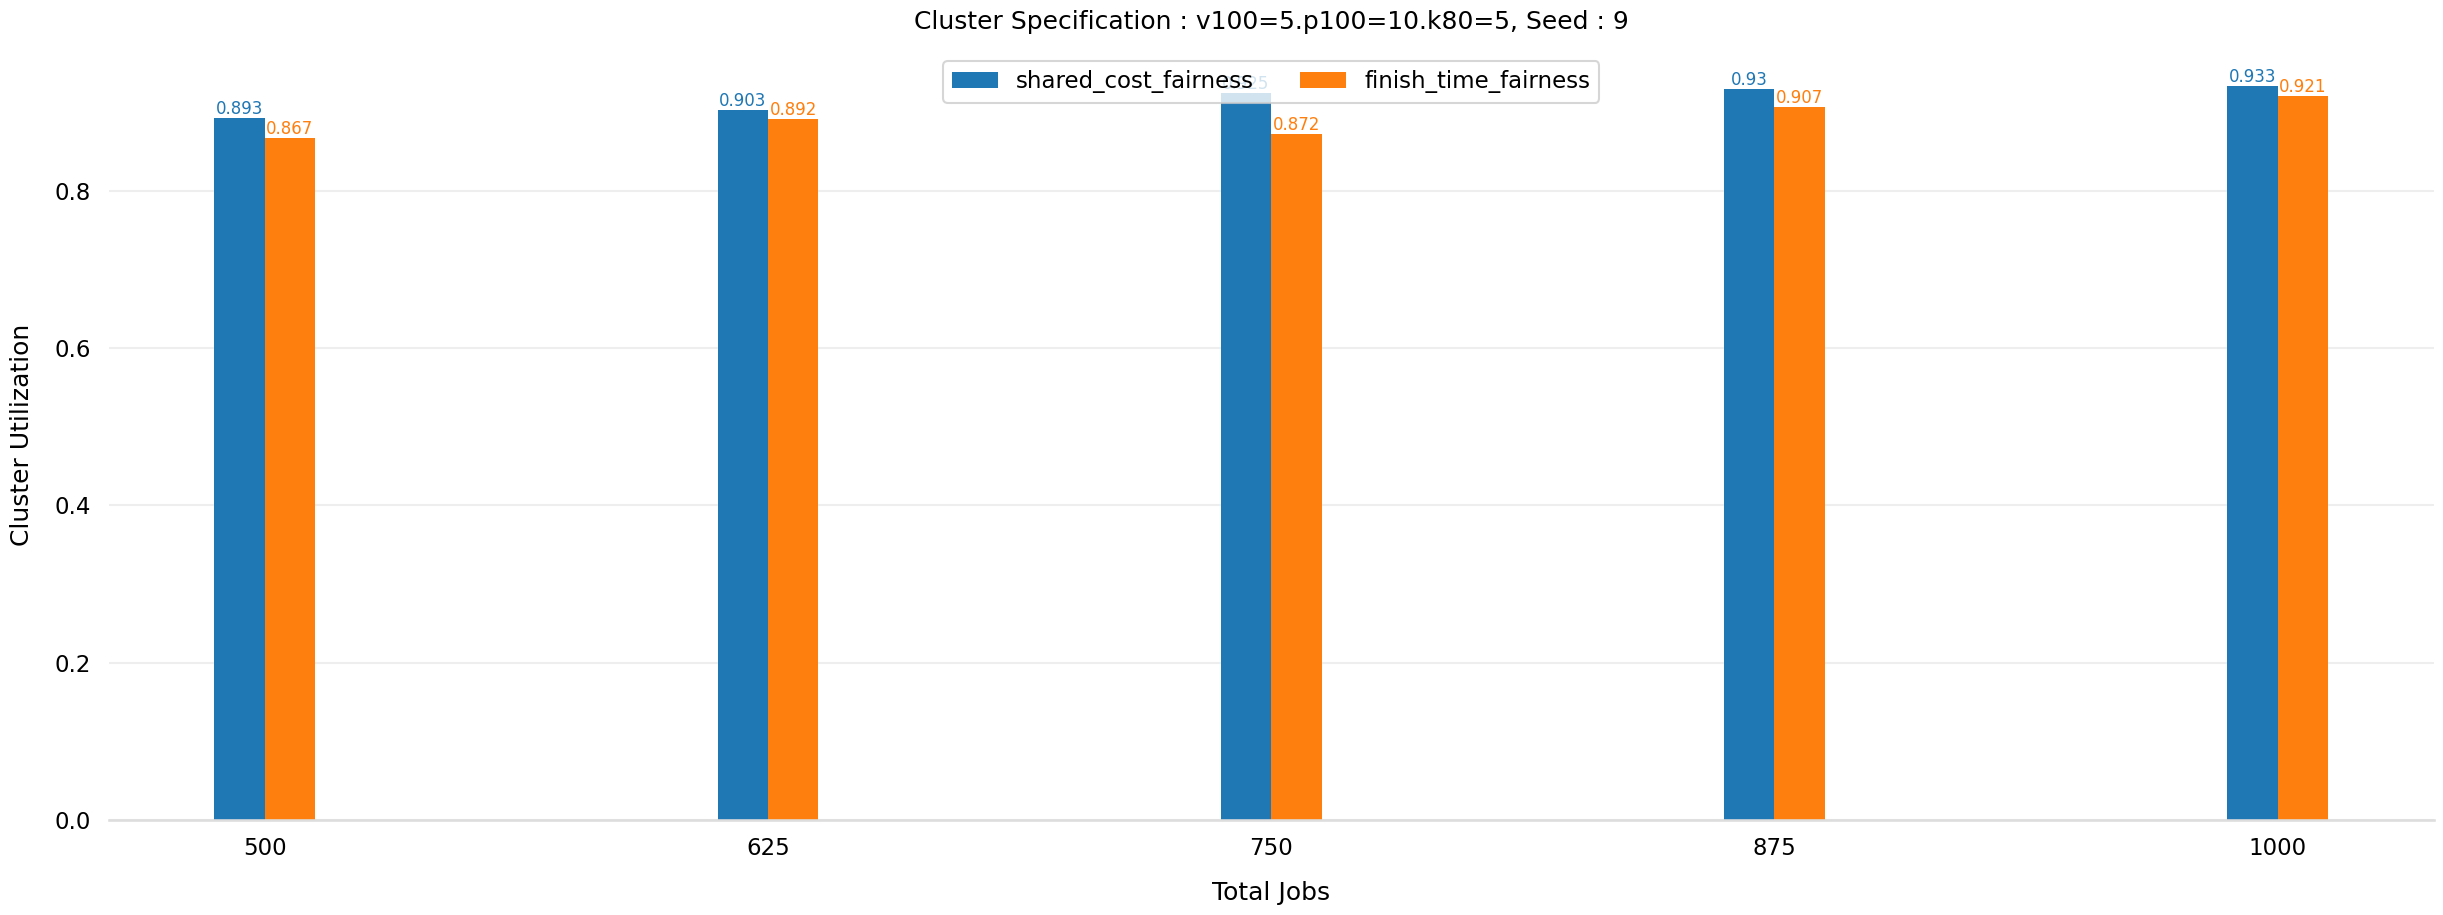

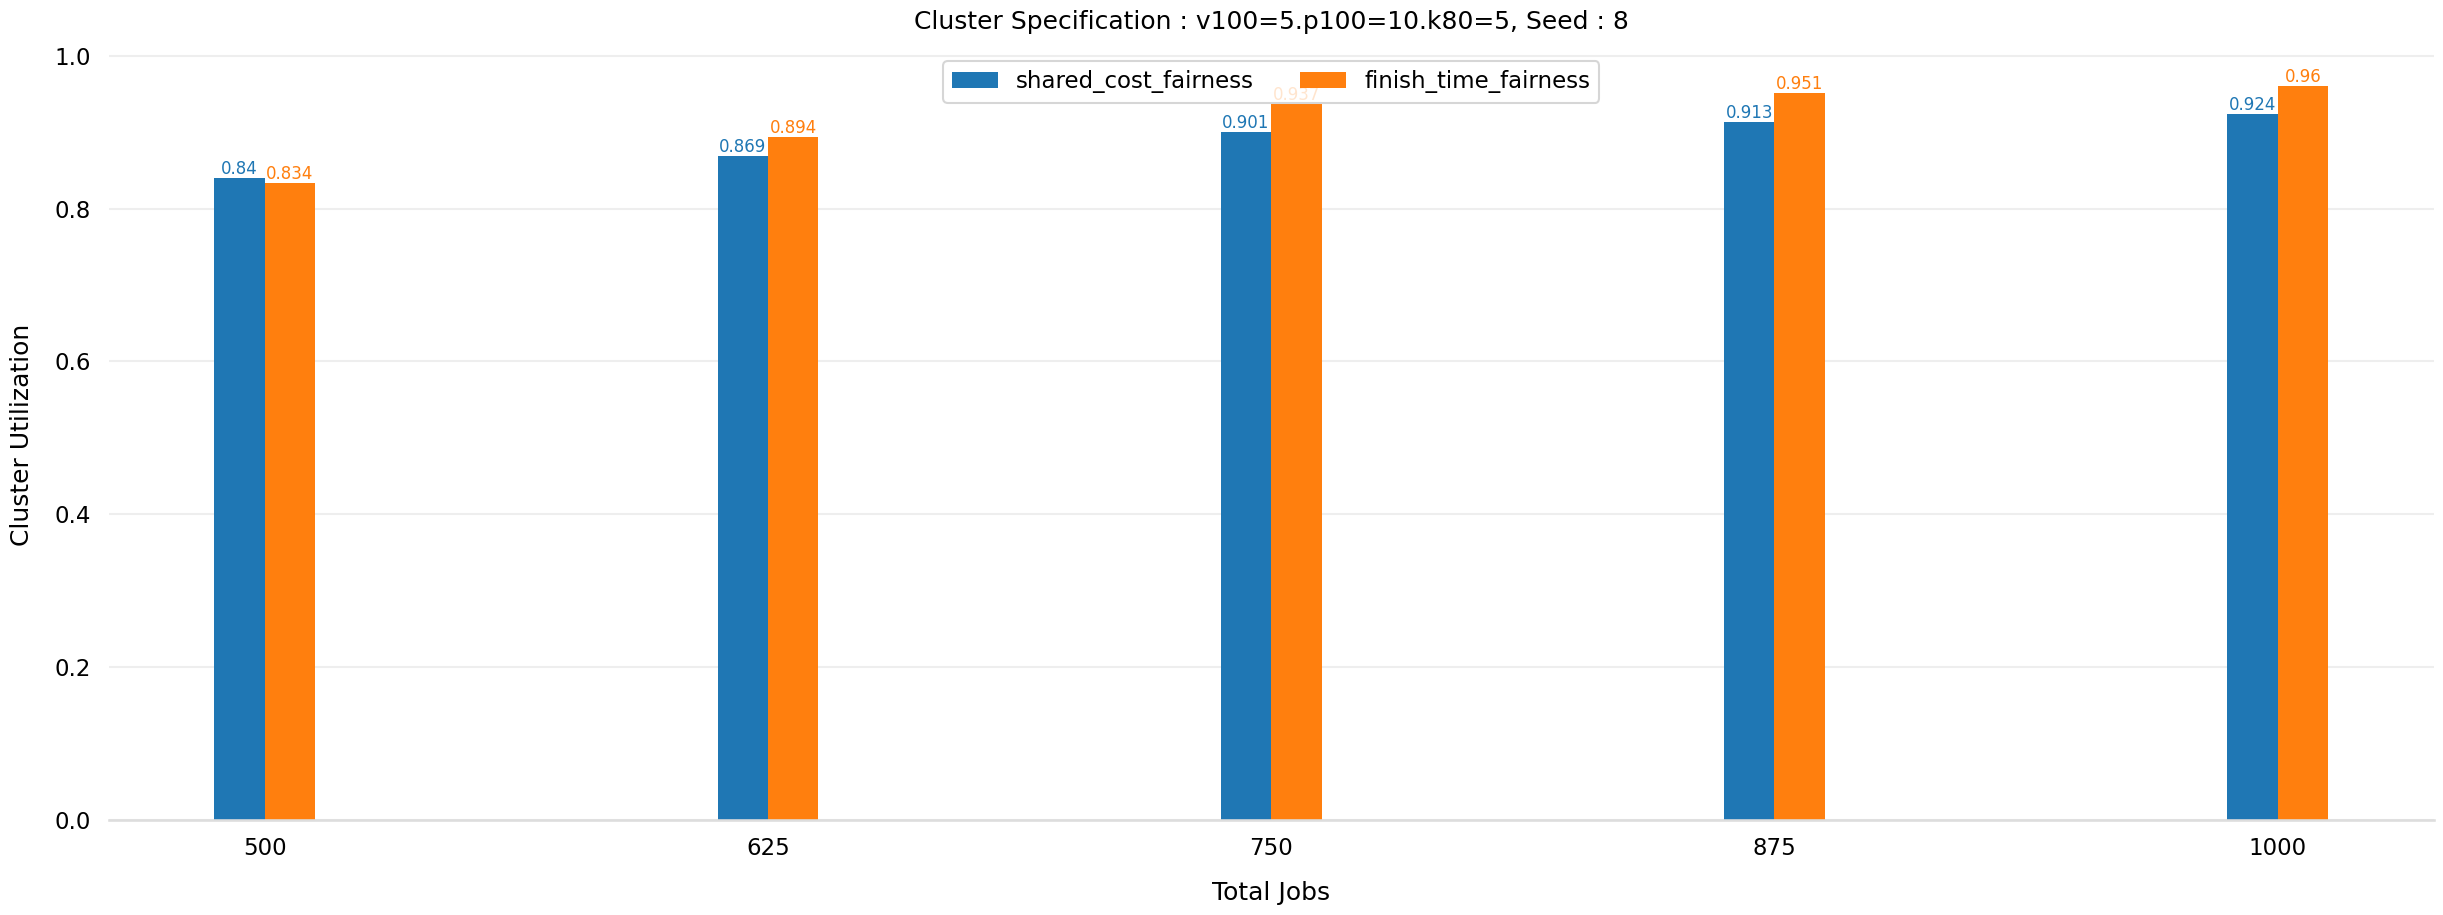

In [18]:
for cluster_spec in df_static["cluster_spec"].unique():
    for seed in df_static["seed"].unique():
        result_int = df_static.query(f'cluster_spec == "{cluster_spec}" & seed == {seed}')
        
        no_graphs = len(result_int["policy"].unique())

        fig, ax = plt.subplots(figsize=(30,10))
        bar_width = 0.1
        
        for idx, policy in enumerate(result_int["policy"].unique()):
            result = result_int.query(f'policy == "{policy}"')
            result = result.sort_values("total_jobs")

            x = np.arange(len(result["total_jobs"].unique()))
            y = [float(r) for r in result["utilization"]]

            ax.bar(x + (bar_width * idx), y, width=bar_width,label=f'{policy}')
            ax.set_xticks(x + (no_graphs - 1) * (bar_width / 2))
            ax.set_xticklabels(result["total_jobs"].unique())

        ax.legend(loc ="upper center", ncols=5)

        ax.set_xlabel('Total Jobs', labelpad=15)
        ax.set_ylabel('Cluster Utilization', labelpad=15)
        ax.set_title(f'Cluster Specification : {cluster_spec}, Seed : {seed}', pad=15)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#DDDDDD')
        ax.tick_params(bottom=False, left=False)
        ax.set_axisbelow(True)
        
        ax.yaxis.grid(True, color='#EEEEEE')
        ax.xaxis.grid(False)

        # For each bar in the chart, add a text label.
        for bar in ax.patches:
        # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            text = f'{bar_value:,}'
            # This will give the middle of each bar on the x-axis.
            text_x = bar.get_x() + bar.get_width() / 2
            # get_y() is where the bar starts so we add the height to it.
            text_y = bar.get_y() + bar_value
            # If we want the text to be the same color as the bar, we can
            # get the color like so:
            bar_color = bar.get_facecolor()
            # If you want a consistent color, you can just set it as a constant, e.g. #222222
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                    size=12)
            